**Table of contents**<a id='toc0_'></a>    
- 1. [概述](#toc1_)    
- 2. [环境配置](#toc2_)    
- 3. [utils](#toc3_)    
  - 3.1. [实验可重复性](#toc3_1_)    
  - 3.2. [计时器](#toc3_2_)    
    - 3.2.1. [cpu计时器](#toc3_2_1_)    
    - 3.2.2. [gpu计时器](#toc3_2_2_)    
  - 3.3. [numpy和pytorch计算速度比较](#toc3_3_)    
- 4. [安装GPU驱动](#toc4_)    
  - 4.1. [安装策略](#toc4_1_)    
  - 4.2. [首先确认内核版本和发行版本，再确认显卡型号](#toc4_2_)    
  - 4.3. [安装驱动-CUDA Driver](#toc4_3_)    
    - 4.3.1. [下载CUDA Driver](#toc4_3_1_)    
    - 4.3.2. [禁用nouveau](#toc4_3_2_)    
    - 4.3.3. [安装CUDA Driver](#toc4_3_3_)    
    - 4.3.4. [查看显卡是否安装成功](#toc4_3_4_)    
    - 4.3.5. [查看nvcc](#toc4_3_5_)    
  - 4.4. [CUDA Toolkit和CuDNN](#toc4_4_)    
    - 4.4.1. [下载对应的CUDA Toolkit版本](#toc4_4_1_)    
    - 4.4.2. [安装CUDA Toolkit](#toc4_4_2_)    
    - 4.4.3. [下载对应的CuDNN](#toc4_4_3_)    
    - 4.4.4. [安装CuDNN](#toc4_4_4_)    
  - 4.5. [安装对应版本的Pytorch](#toc4_5_)    
  - 4.6. [推荐A100](#toc4_6_)    
  - 4.7. [GPU测试程序](#toc4_7_)    
    - 4.7.1. [测试单机单卡GPU性能](#toc4_7_1_)    
    - 4.7.2. [测试单机多卡GPU性能](#toc4_7_2_)    
    - 4.7.3. [GPU burn压力测试](#toc4_7_3_)    
- 5. [Pytorch模块介绍](#toc5_)    
  - 5.1. [导入模块](#toc5_1_)    
- 6. [数据封装和加载](#toc6_)    
  - 6.1. [torchvison.datasets获得Dataset](#toc6_1_)    
  - 6.2. [自定义数据集获得Dataset](#toc6_2_)    
    - 6.2.1. [利用TensorDataset()封装成Dataset](#toc6_2_1_)    
    - 6.2.2. [重载Dataset类](#toc6_2_2_)    
    - 6.2.3. [Pytoch.utils.data.Dataset类分析和总结](#toc6_2_3_)    
  - 6.3. [数据加载-DataLoader()](#toc6_3_)    
    - 6.3.1. [估计数据加载时间](#toc6_3_1_)    
- 7. [张量(Tensors)](#toc7_)    
  - 7.1. [Tensors定义](#toc7_1_)    
  - 7.2. [Tensors属性](#toc7_2_)    
  - 7.3. [Tensors操作](#toc7_3_)    
    - 7.3.1. [索引和切片](#toc7_3_1_)    
    - 7.3.2. [修改维度](#toc7_3_2_)    
      - 7.3.2.1. [reshape函数](#toc7_3_2_1_)    
      - 7.3.2.2. [view函数](#toc7_3_2_2_)    
      - 7.3.2.3. [transpose函数](#toc7_3_2_3_)    
      - 7.3.2.4. [permute函数](#toc7_3_2_4_)    
  - 7.4. [线性代数运算](#toc7_4_)    
    - 7.4.1. [数值运算](#toc7_4_1_)    
    - 7.4.2. [数值运算-乘法](#toc7_4_2_)    
      - 7.4.2.1. [哈达玛积](#toc7_4_2_1_)    
      - 7.4.2.2. [点积（Dot Product）](#toc7_4_2_2_)    
      - 7.4.2.3. [矩阵-向量积](#toc7_4_2_3_)    
      - 7.4.2.4. [矩阵-矩阵积](#toc7_4_2_4_)    
      - 7.4.2.5. [批量矩阵乘法](#toc7_4_2_5_)    
      - 7.4.2.6. [乘总结](#toc7_4_2_6_)    
    - 7.4.3. [统计运算](#toc7_4_3_)    
  - 7.5. [Pytorch的计算图 和 自动微分 (autograd)](#toc7_5_)    
    - 7.5.1. [反向传播 (backward)-批量求梯度，但未进行参数更新](#toc7_5_1_)    
    - 7.5.2. [仅计算梯度 (求导计算)](#toc7_5_2_)    
  - 7.6. [自动微积-autograd](#toc7_6_)    
    - 7.6.1. [自己探索](#toc7_6_1_)    
      - 7.6.1.1. [标量-一阶导数（得标量）](#toc7_6_1_1_)    
      - 7.6.1.2. [标量/向量-一阶导数（得向量）](#toc7_6_1_2_)    
      - 7.6.1.3. [向量/向量-一阶导数（得矩阵）](#toc7_6_1_3_)    
      - 7.6.1.4. [求高阶导数](#toc7_6_1_4_)    
    - 7.6.2. [一个简单的例子](#toc7_6_2_)    
    - 7.6.3. [计算另一个](#toc7_6_3_)    
    - 7.6.4. [非标量变量的反向传播](#toc7_6_4_)    
    - 7.6.5. [分离计算](#toc7_6_5_)    
    - 7.6.6. [Python控制流的梯度计算](#toc7_6_6_)    
  - 7.7. [概率论](#toc7_7_)    
- 8. [神经网络-训练八股](#toc8_)    
  - 8.1. [现线性回归模型于训练过程-从零开始](#toc8_1_)    
    - 8.1.1. [虚拟出数据](#toc8_1_1_)    
    - 8.1.2. [读取数据](#toc8_1_2_)    
    - 8.1.3. [初始化模型参数](#toc8_1_3_)    
    - 8.1.4. [定义模型](#toc8_1_4_)    
    - 8.1.5. [定义损失函数](#toc8_1_5_)    
    - 8.1.6. [定义优化算法](#toc8_1_6_)    
    - 8.1.7. [训练](#toc8_1_7_)    
  - 8.2. [现线性回归模型于训练过程-简洁实现](#toc8_2_)    
    - 8.2.1. [虚拟数据](#toc8_2_1_)    
    - 8.2.2. [读取数据](#toc8_2_2_)    
    - 8.2.3. [定义模型](#toc8_2_3_)    
    - 8.2.4. [初始化模型参数](#toc8_2_4_)    
    - 8.2.5. [定义损失函数](#toc8_2_5_)    
    - 8.2.6. [定义优化算法](#toc8_2_6_)    
    - 8.2.7. [训练](#toc8_2_7_)    
    - 8.2.8. [参数保存](#toc8_2_8_)    
    - 8.2.9. [重载](#toc8_2_9_)    
  - 8.3. [专题-模型定义（计算预测值y_hat）](#toc8_3_)    
    - 8.3.1. [块：torch.nn模块](#toc8_3_1_)    
    - 8.3.2. [块：自定义](#toc8_3_2_)    
      - 8.3.2.1. [自定义块](#toc8_3_2_1_)    
      - 8.3.2.2. [顺序块](#toc8_3_2_2_)    
      - 8.3.2.3. [效率](#toc8_3_2_3_)    
    - 8.3.3. [模型结构/组成](#toc8_3_3_)    
      - 8.3.3.1. [.children()](#toc8_3_3_1_)    
      - 8.3.3.2. [.named_children()](#toc8_3_3_2_)    
      - 8.3.3.3. [.modules()](#toc8_3_3_3_)    
      - 8.3.3.4. [.named_modules()](#toc8_3_3_4_)    
      - 8.3.3.5. [删除和添加](#toc8_3_3_5_)    
      - 8.3.3.6. [替换](#toc8_3_3_6_)    
      - 8.3.3.7. [add_module()](#toc8_3_3_7_)    
    - 8.3.4. [模型：参数管理](#toc8_3_4_)    
      - 8.3.4.1. [参数访问](#toc8_3_4_1_)    
        - 8.3.4.1.1. [state_dict](#toc8_3_4_1_1_)    
        - 8.3.4.1.2. [parameters](#toc8_3_4_1_2_)    
        - 8.3.4.1.3. [named_parameters](#toc8_3_4_1_3_)    
      - 8.3.4.2. [参数初始化](#toc8_3_4_2_)    
        - 8.3.4.2.1. [内置初始化](#toc8_3_4_2_1_)    
        - 8.3.4.2.2. [自定义初始化](#toc8_3_4_2_2_)    
        - 8.3.4.2.3. [参数绑定](#toc8_3_4_2_3_)    
    - 8.3.5. [层：自定义](#toc8_3_5_)    
      - 8.3.5.1. [不带参数的层](#toc8_3_5_1_)    
      - 8.3.5.2. [带参数的层](#toc8_3_5_2_)    
  - 8.4. [专题-损失函数 (loss_fn)](#toc8_4_)    
    - 8.4.1. [均方误差](#toc8_4_1_)    
    - 8.4.2. [交叉熵](#toc8_4_2_)    
    - 8.4.3. [自定义](#toc8_4_3_)    
  - 8.5. [专题-反向传播（求梯度）](#toc8_5_)    
  - 8.6. [专题-更新权重（优化算法）](#toc8_6_)    
    - 8.6.1. [随机梯度下降（SGD）](#toc8_6_1_)    
    - 8.6.2. [adam](#toc8_6_2_)    
    - 8.6.3. [RMSprop](#toc8_6_3_)    
    - 8.6.4. [学习率调度器](#toc8_6_4_)    
      - 8.6.4.1. [StepLR： 按照固定的步长调整学习率](#toc8_6_4_1_)    
      - 8.6.4.2. [MultiStepLR： 在指定的里程碑（milestones）上调整学习率](#toc8_6_4_2_)    
      - 8.6.4.3. [ExponentialLR： 以指数衰减的方式调整学习率](#toc8_6_4_3_)    
      - 8.6.4.4. [CosineAnnealingLR： 余弦退火调整学习率](#toc8_6_4_4_)    
      - 8.6.4.5. [ReduceLROnPlateau： 当指标停止改善时，降低学习率](#toc8_6_4_5_)    
      - 8.6.4.6. [LambdaLR： 使用自定义的函数来调整学习率](#toc8_6_4_6_)    
      - 8.6.4.7. [自定义](#toc8_6_4_7_)    
  - 8.7. [专题-训练](#toc8_7_)    
    - 8.7.1. [开始训练](#toc8_7_1_)    
    - 8.7.2. [自己探索](#toc8_7_2_)    
      - 8.7.2.1. [lr的影响](#toc8_7_2_1_)    
      - 8.7.2.2. [不同模型的效率](#toc8_7_2_2_)    
    - 8.7.3. [K折交叉验证](#toc8_7_3_)    
  - 8.8. [可视化训练过程](#toc8_8_)    
- 9. [在 GPU 上训练](#toc9_)    
  - 9.1. [查看GPU配置](#toc9_1_)    
  - 9.2. [单机单卡（GPU）](#toc9_2_)    
  - 9.3. [单机多卡（GPU）](#toc9_3_)    
    - 9.3.1. [DP](#toc9_3_1_)    
    - 9.3.2. [DDP](#toc9_3_2_)    
      - 9.3.2.1. [在colab上测试可用](#toc9_3_2_1_)    
  - 9.4. [多机多卡（GPU）- 分布式训练](#toc9_4_)    
- 10. [模型和参数的保存与加载](#toc10_)    
  - 10.1. [加载和保存-张量](#toc10_1_)    
  - 10.2. [加载和保存-模型参数](#toc10_2_)    
- 11. [神经网络类型](#toc11_)    
  - 11.1. [CNN](#toc11_1_)    
    - 11.1.1. [概述](#toc11_1_1_)    
    - 11.1.2. [简单CNN](#toc11_1_2_)    
      - 11.1.2.1. [从头实现](#toc11_1_2_1_)    
        - 11.1.2.1.1. [卷积计算过程](#toc11_1_2_1_1_)    
        - 11.1.2.1.2. [从头卷积层](#toc11_1_2_1_2_)    
      - 11.1.2.2. [简洁实现](#toc11_1_2_2_)    
      - 11.1.2.3. [填充和步幅](#toc11_1_2_3_)    
      - 11.1.2.4. [多输入和多输出通道](#toc11_1_2_4_)    
      - 11.1.2.5. [Pooling (汇聚层)](#toc11_1_2_5_)    
        - 11.1.2.5.1. [平均Pooling](#toc11_1_2_5_1_)    
        - 11.1.2.5.2. [最大Pooling](#toc11_1_2_5_2_)    
    - 11.1.3. [LeNet](#toc11_1_3_)    
    - 11.1.4. [AlexNet](#toc11_1_4_)    
    - 11.1.5. [VGG](#toc11_1_5_)    
    - 11.1.6. [NiN](#toc11_1_6_)    
    - 11.1.7. [GoogLeNet](#toc11_1_7_)    
    - 11.1.8. [批量规范化](#toc11_1_8_)    
    - 11.1.9. [ResNet](#toc11_1_9_)    
      - 11.1.9.1. [从头实现](#toc11_1_9_1_)    
  - 11.2. [序列数据](#toc11_2_)    
    - 11.2.1. [什么是序列](#toc11_2_1_)    
    - 11.2.2. [语言模型](#toc11_2_2_)    
    - 11.2.3. [文本预处理](#toc11_2_3_)    
      - 11.2.3.1. [下载《Time machine》并读取数据](#toc11_2_3_1_)    
      - 11.2.3.2. [词元化（Token）](#toc11_2_3_2_)    
      - 11.2.3.3. [词表（vocab）](#toc11_2_3_3_)    
      - 11.2.3.4. [整合所有功能](#toc11_2_3_4_)    
    - 11.2.4. [语言模型数据集](#toc11_2_4_)    
      - 11.2.4.1. [顺序采样](#toc11_2_4_1_)    
      - 11.2.4.2. [随机采样](#toc11_2_4_2_)    
      - 11.2.4.3. [包装](#toc11_2_4_3_)    
  - 11.3. [RNN](#toc11_3_)    
    - 11.3.1. [RNN-循环神经网络原理](#toc11_3_1_)    
      - 11.3.1.1. [从头实现网络](#toc11_3_1_1_)    
      - 11.3.1.2. [简洁实现](#toc11_3_1_2_)    
      - 11.3.1.3. [训练和预测](#toc11_3_1_3_)    
      - 11.3.1.4. [深层RNN](#toc11_3_1_4_)    
      - 11.3.1.5. [双向RNN](#toc11_3_1_5_)    
    - 11.3.2. [GRU](#toc11_3_2_)    
      - 11.3.2.1. [从头实现](#toc11_3_2_1_)    
      - 11.3.2.2. [简洁实现](#toc11_3_2_2_)    
    - 11.3.3. [LSTM](#toc11_3_3_)    
      - 11.3.3.1. [从头实现](#toc11_3_3_1_)    
      - 11.3.3.2. [简洁实现](#toc11_3_3_2_)    
    - 11.3.4. [Encoder-Decoder框架](#toc11_3_4_)    
      - 11.3.4.1. [Encoder部分](#toc11_3_4_1_)    
      - 11.3.4.2. [Decoder部分](#toc11_3_4_2_)    
      - 11.3.4.3. [Encoder-Decoder（合并编码器和解码器）](#toc11_3_4_3_)    
    - 11.3.5. [seq2seq (Sequence to sequence learning)](#toc11_3_5_)    
      - 11.3.5.1. [简洁实现](#toc11_3_5_1_)    
  - 11.4. [Attention](#toc11_4_)    
    - 11.4.1. [非参数注意力汇聚（Attention Pooling）-计算q和k相似度](#toc11_4_1_)    
    - 11.4.2. [参数注意力汇聚（Attention Pooling）-计算q和k相似度](#toc11_4_2_)    
    - 11.4.3. [注意力分数函数-计算q和k相似度](#toc11_4_3_)    
      - 11.4.3.1. [加性注意力](#toc11_4_3_1_)    
      - 11.4.3.2. [缩放点积注意力](#toc11_4_3_2_)    
    - 11.4.4. [自注意力机制](#toc11_4_4_)    
    - 11.4.5. [多头注意力机制](#toc11_4_5_)    
    - 11.4.6. [attention-seq2seq](#toc11_4_6_)    
  - 11.5. [Transformer](#toc11_5_)    
    - 11.5.1. [位置编码](#toc11_5_1_)    
    - 11.5.2. [基于位置的前馈网络](#toc11_5_2_)    
    - 11.5.3. [残差连接和层规范化](#toc11_5_3_)    
    - 11.5.4. [编码器](#toc11_5_4_)    
    - 11.5.5. [解码器](#toc11_5_5_)    
    - 11.5.6. [基于Attention的Seq2Seq网络](#toc11_5_6_)    
    - 11.5.7. [BERT](#toc11_5_7_)    
    - 11.5.8. [GPT](#toc11_5_8_)    
- 12. [炼丹心得](#toc12_)    
  - 12.1. [关于改变形状](#toc12_1_)    
  - 12.2. [关于调参](#toc12_2_)    
  - 12.3. [模型选择](#toc12_3_)    
  - 12.4. [one-hot](#toc12_4_)    
  - 12.5. [embedding](#toc12_5_)    
  - 12.6. [BN和LN](#toc12_6_)    
  - 12.7. [MLP、FC、FNN、CNN、RNN](#toc12_7_)    
  - 12.8. [机器学习](#toc12_8_)    
- 13. [PyTorch做迁移学习](#toc13_)    
  - 13.1. [Fine-tuning](#toc13_1_)    
    - 13.1.1. [小的lr](#toc13_1_1_)    
    - 13.1.2. [停止计算梯度](#toc13_1_2_)    
  - 13.2. [torchvision的应用案例](#toc13_2_)    
  - 13.3. [迁移学习案例](#toc13_3_)    
- 14. [PyTorch lightning训练框架](#toc14_)    
  - 14.1. [训练逻辑](#toc14_1_)    
  - 14.2. [Data.py](#toc14_2_)    
  - 14.3. [Model.py](#toc14_3_)    
  - 14.4. [ModelWrapper.py](#toc14_4_)    
    - 14.4.1. [Training and vlidation](#toc14_4_1_)    
    - 14.4.2. [Validation](#toc14_4_2_)    
    - 14.4.3. [Test](#toc14_4_3_)    
    - 14.4.4. [Prediction](#toc14_4_4_)    
      - 14.4.4.1. [PyTorch lightning自身Trainer直接predict](#toc14_4_4_1_)    
      - 14.4.4.2. [PyTorch lightning加载权重后预测](#toc14_4_4_2_)    
      - 14.4.4.3. [提取权重后加载至纯PyTorch模型](#toc14_4_4_3_)    
- 15. [L做迁移学习](#toc15_)    
  - 15.1. [项目一：](#toc15_1_)    
- 16. [Torchvision教程](#toc16_)    
  - 16.1. [Models](#toc16_1_)    
    - 16.1.1. [可用模型](#toc16_1_1_)    
    - 16.1.2. [下载模型和权重](#toc16_1_2_)    
    - 16.1.3. [模型加载权重](#toc16_1_3_)    
    - 16.1.4. [总结](#toc16_1_4_)    
  - 16.2. [Dataset](#toc16_2_)    
- 17. [Degub pdb](#toc17_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[概述](#toc0_)
写这这个笔记的主要目的是作为学些过程中知识的总结、归纳和反思。作为一个非科班出生的生物人，仅凭着热爱开始了自学深度学习这条路，前路漫漫不敢想，也不曾觉着以后能端这碗饭。只是，羡慕网上像智慧君、李沐这样的人，能够从事如此炫酷的工作，能把自己的热爱开发成一生从事的职业。仔细想想如果自己不做点什么或是不为此努力点什么，就觉得坐立不、安难以入眠。同时深知，这个过程会是无比艰辛，在百无聊赖之际，记录学习的过程或许会是一种苦中作乐的方式。

- d2l EN (及时更新): [https://d2l.ai/index.html](https://d2l.ai/index.html)
- d2l ZH: [https://zh-v2.d2l.ai/](https://zh-v2.d2l.ai/)

# 2. <a id='toc2_'></a>[环境配置](#toc0_)

- PyTorch官方教程 [https://pytorch.org/](https://pytorch.org/)

- PyTorch lightning官方教程 [https://lightning.ai/docs/pytorch/stable/](https://lightning.ai/docs/pytorch/stable/)

- 尽量用conda配置环境，不要conda和pip混搭。

In [ ]:
# Create environment 
# and entry the environment
conda create -n pytorch -y && conda activate pytorch

# Install ipykernel and related packages via conda
conda install ipykernel matplotlib pandas seaborn -y

# Install PyTorch
conda install pytorch torchvision torchaudio pytorch-cuda=12.4 -c pytorch -c nvidia

# Instll PyTorch lightning
conda install lightning -c conda-forge -y

# 3. <a id='toc3_'></a>[utils](#toc0_)


## 3.1. <a id='toc3_1_'></a>[实验可重复性](#toc0_)
整个代码框架中很多地方使用到随机数的，为了实验的可重复性需要固定随机种子；  
另外，有研究表明GPU中的CUDA变成也有很多地方对实验结果的稳定性很重要。

In [235]:
import numpy as np 

import torch

# Function for setting the seed
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():  # GPU operation have separate seed
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

set_seed(42)

# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Fetching the device that will be used throughout this notebook
device = torch.device("cpu") if not torch.cuda.is_available() else torch.device("cuda:0")
print("Using device", device)

Using device cuda:0


## 3.2. <a id='toc3_2_'></a>[计时器](#toc0_)

### 3.2.1. <a id='toc3_2_1_'></a>[cpu计时器](#toc0_)

* 自定义的一些使用的脚本。
```sehll
    __init__(self) # 初始化实例时就会执行
    __call__(self) # 再次调用时，自动执行
```

In [1]:
import time
import torch

class cpuTimer():
    '''一个计时器'''
    def __init__(self):
        '''初始化时候自动执行'''
        self.start = time.time()

    def __call__(self):
        '''再次调用该对象时，会自动执行'''
        self.stop = time.time()
        seconds = self.stop - self.start
        days = seconds // (24 * 3600)
        hours = (seconds % (24 * 3600)) // 3600
        minutes = (seconds % 3600) // 60
        remaining_seconds = seconds % 60
        print('='*20, '\n', f"Total：\n {days} d \n {hours} h \n {minutes} m \n {remaining_seconds} s")
        
# Tiemr使用
timer_on_cpu = cpuTimer()
for i in range(3):
    time.sleep(0.01)
timer_on_cpu()

 Total：
 0.0 d 
 0.0 h 
 0.0 m 
 0.0302579402923584 s


### 3.2.2. <a id='toc3_2_2_'></a>[gpu计时器](#toc0_)

In [2]:
class gpuTimer():
    def __init__(self):
        # CUDA is asynchronous, so we need to use different timing functions
        self.start = torch.cuda.Event(enable_timing=True)
        self.end = torch.cuda.Event(enable_timing=True)
        self.start.record()

    def __call__(self):
        self.end.record()
        torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
        print("⚡"*20, f"\nGPU time: {0.001 * self.start.elapsed_time(self.end):6.5f}s")  # Milliseconds to seconds

# Demo for Timer on GPU devices
timer_on_gpu = gpuTimer()
a = torch.arange(45).reshape(3, 3, 5)
b = torch.arange(45).reshape(3, 5, 3)
c = torch.bmm(a, b)
timer_on_gpu()

⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡ 
GPU time: 0.00252s


## 3.3. <a id='toc3_3_'></a>[numpy和pytorch计算速度比较](#toc0_)

In [40]:
import numpy as np
import torch

# Datas on cpu with arrary
a = np.random.rand(1000, 1000)
b = np.random.rand(1000, 1000)

# Datas on cpu with tensor
at = torch.Tensor(a).to('cpu')
bt = torch.Tensor(b).to('cpu')

# Datas on gpu with tensor
at_gpu = torch.Tensor(a).to('cuda:0')
bt_gpu = torch.Tensor(b).to('cuda:0')

In [41]:
%timeit a + b   # On cpu via numpy

1.28 ms ± 12.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [42]:
%timeit at + bt # On cpu via PyTorch

22 μs ± 1.81 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [43]:
start = torch.cuda.Event(enable_timing=True)
stop = torch.cuda.Event(enable_timing=True)

start.record()
at_gpu + bt_gpu
stop.record()

# Waits for everything to finish running
torch.cuda.synchronize()
print(f'Time: {0.001 * start.elapsed_time(stop)} s')

Time: 0.00024454399943351745 s


# 4. <a id='toc4_'></a>[安装GPU驱动](#toc0_)

- 以CentOS8安装NVIDIA Tesla A100为例，下载CUDA Toolkit和CuDNN，需要注意cudnn的版本必须与cuda的版本相匹配：

    - 1.NVIDIA Driver：  
    `NVIDIA驱动是NVIDIA显卡的驱动程序，它是CUDA和CuDNN的前提条件。显卡驱动下载地址：https://www.nvidia.com/Download/index.aspx。`

    - 2.CUDA Toolkit：  
    `CUDA Toolkit是一个开发工具包，其中包含了CUDA编译器、IDE、调试器等工具，以及CUDA程序所需的各种库文件和头文件，每个版本的CUDA Toolkit 都对应一个最低版本的显卡驱动版本（CUDA Driver）。`

    - 3.NVCC：  
    `其实就是CUDA的编译器,可以从CUDA Toolkit的/bin目录中获取,类似于gcc就是c语言的编译器。`

    - 4.CUDA Deep Neural Network (cuDNN)：  
    `CuDNN是NVIDIA提供的一个深度神经网络加速库，它包含了一系列高性能的基本函数和算法，用于加速深度学习任务的计算；CuDNN需要与CUDA Toolkit一起使用，以优化深度学习任务。`

## 4.1. <a id='toc4_1_'></a>[安装策略](#toc0_)

- 方式一 `全局驱动，各自cuda`：
    - `只安装NVIDIA Tesla A100的driver，每个用户自己利用conda安装CUDA Toolkit、cuDNN和对应的Pytorch版本（推荐），但是得注意选择兼容型号。（推荐）`

- 方式二 `全局驱动，全局cuda`：
    - `安装Driver、CUDA Toolkit (全局安装)`
    
- 方式三 `docker`：
    - `安装Driver、NVIDIA docker (docker虚拟容器)`

## 4.2. <a id='toc4_2_'></a>[首先确认内核版本和发行版本，再确认显卡型号](#toc0_)

In [36]:
%%bash 
echo 查看linux内核版本、架构
uname -a
# Linux 135.91.205.202.cau.edu.cn 4.18.0-147.el8.x86_64 #1 SMP Wed Dec 4 21:51:45 UTC 2019 x86_64 x86_64 x86_64 GNU/Linux
# x86_64

echo 发行版本
cat /etc/redhat-release
# CentOS Linux release 8.1.1911 (Core)
# CentOS

echo 显卡型号 （硬件层面）
lspci | grep -i nvidia
# 04:00.0 3D controller: NVIDIA Corporation GK208M [GeForce GT 730M] (rev a1)

echo 验证系统是否安装gcc编译器
gcc --version

# sudo yum install kernel-devel-$(uname -r) kernel-headers-$(uname -r)

查看linux内核版本、架构
Linux 135.91.205.202.cau.edu.cn 4.18.0-348.7.1.el8_5.x86_64 #1 SMP Wed Dec 22 13:25:12 UTC 2021 x86_64 x86_64 x86_64 GNU/Linux
发行版本
CentOS Linux release 8.1.1911 (Core) 
显卡型号 （硬件层面）
2f:00.0 3D controller: NVIDIA Corporation Device 20b0 (rev a1)
86:00.0 3D controller: NVIDIA Corporation Device 20b0 (rev a1)
验证系统是否安装gcc编译器
gcc (GCC) 8.5.0 20210514 (Red Hat 8.5.0-4)
Copyright (C) 2018 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



## 4.3. <a id='toc4_3_'></a>[安装驱动-CUDA Driver](#toc0_)

### 4.3.1. <a id='toc4_3_1_'></a>[下载CUDA Driver](#toc0_)

![image.png](attachment:image.png) 

![image-2.png](attachment:image-2.png)

In [17]:
# 1. 从NVIDIA官网下辖
# https://www.nvidia.cn/Download/index.aspx?lang=cn

# 2. 通过dnf search nvidia*

### 4.3.2. <a id='toc4_3_2_'></a>[禁用nouveau](#toc0_)

In [18]:
# 貌似在centos8上默认就禁用了，我没改，直接查看了lsmod | grep nouveau命令，发现没有输出。

### 4.3.3. <a id='toc4_3_3_'></a>[安装CUDA Driver](#toc0_)

In [19]:
# !chmod a+x *.run
# !sudo ./*.run

'chmod' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���
'sudo' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


### 4.3.4. <a id='toc4_3_4_'></a>[查看显卡是否安装成功](#toc0_)

In [30]:
!nvidia-smi

Sat Aug 24 18:54:22 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:2F:00.0 Off |                    0 |
| N/A   38C    P0             35W /  400W |   30737MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

### 4.3.5. <a id='toc4_3_5_'></a>[查看nvcc](#toc0_)
```shell
nvcc只是CUDA Toolkit中的一个软件。此时，只是安装了驱动程序，没有安装CUDA Toolkit，所以无法查看nvcc。
```

In [34]:
!source /bmp/backup/zhaosy/miniconda3/etc/profile.d/conda.sh
!conda activate pytorch
!nvcc --version 


CondaError: Run 'conda init' before 'conda activate'

/bin/bash: nvcc: command not found


## 4.4. <a id='toc4_4_'></a>[CUDA Toolkit和CuDNN](#toc0_)
```shell
不推荐一开始作为root为Linux全局配置CUDA Toolkit，每个用户和软件使用的CUDA Toolkit版本可能不一样。
```

### 4.4.1. <a id='toc4_4_1_'></a>[下载对应的CUDA Toolkit版本](#toc0_)

In [22]:
%%bash
nvcc -V # 查看是否安装好CUDA Toolkit

wget https://us.download.nvidia.cn/tesla/535.129.03/NVIDIA-Linux-x86_64-535.129.03.run

Couldn't find program: 'bash'


### 4.4.2. <a id='toc4_4_2_'></a>[安装CUDA Toolkit](#toc0_)

In [23]:
%%bash
# 卸载之前安装的cuda
sudo dnf remove nvidia*

Couldn't find program: 'bash'


In [24]:
%%bash 
chmod +x NVIDIA-Linux-x86_64-535.129.03.run
sudo sh NVIDIA-Linux-x86_64-535.129.03.run

Couldn't find program: 'bash'


### 4.4.3. <a id='toc4_4_3_'></a>[下载对应的CuDNN](#toc0_)

In [25]:
# https://link.zhihu.com/?target=https%3A//developer.nvidia.com/rdp/cudnn-download

### 4.4.4. <a id='toc4_4_4_'></a>[安装CuDNN](#toc0_)

In [37]:
# %%bash 


## 4.5. <a id='toc4_5_'></a>[安装对应版本的Pytorch](#toc0_)
```shell
在Pytorch的官网进行查询，按照条件检索符合要求的软件版本，最主要的是对应的cuda版本号。
```
[https://pytorch.org/](https://pytorch.org/)

![PyTorch](./Pytorch_Pictures/Install_PyTorch/PyTorch_website.jpg)

In [27]:
# %%bash
# https://pytorch.org/
# CUDA 12.1
conda create -n pytorch-gpu -y && conda activate pytorch-gpu 
conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia # CUDA 12.1

Couldn't find program: 'bash'


## 4.6. <a id='toc4_6_'></a>[推荐A100](#toc0_)

- 全局A100驱动

- conda下cuda toolkit、pytorch



In [ ]:
# enviroment and actiate environment
conda create -n pytorch-gpu && conda activate pytorch-gpu 

# Install cudatoolkit via conda
conda install nvidia/label/cuda-12.6.0::cuda

## 4.7. <a id='toc4_7_'></a>[GPU测试程序](#toc0_)
### 4.7.1. <a id='toc4_7_1_'></a>[测试单机单卡GPU性能](#toc0_)
```shell
net.to('cuda:0')
x_gpu = x.to('cuda:0')
```

In [7]:
import torch 
import torch.nn as nn 
import torch.utils.data as data
import torchvision
import time 

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 数据准备
dbs = './Pytorch_datasets/'
train_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=True, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [torchvision.transforms.ToTensor(), 
        #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

test_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=False, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(), 
        #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)
# 迭代型数据方式
train_iter = data.DataLoader(
    dataset=train_dataset, 
    batch_size=128, 
    shuffle=True
)
# test_iter = data.DataLoader(dataset=test_dataset) # test不需要batch训练

# 网络结构
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 1024), nn.ReLU(),
            nn.Linear(1024, 10), nn.Softmax()
        )

    def forward(self, X):
        return self.network(X)
    
# 训练过程封装
def train_steps(epochs, train_dataset, train_iter, test_dataset, net, loss_fn, opt, device):
    '''
    参数记录
    epochs = epochs                         # epoch
    train_dataset = train_dataset           # 全部train数据集
    train_iter = train_iter                 # batch之后的train数据集
    test_dataset = test_dataset             # 全部test数据集
    net = net                               # 网络模型
    loss_fn = loss_fn                       # 损失函数
    opt = opt                               # 优化器
    device = device                         # device GPU/CPU
    '''

    print('='*100)
    print(f"Runing on {device}")
    print('='*100)
    train_all_data_gpu = train_dataset.data.to(device)
    train_all_targets_gpu = train_dataset.targets.to(device)
    test_all_data_gpu = test_dataset.data.to(device)
    test_all_targets_gpu = test_dataset.targets.to(device)
    net.to(device)

    # 开始迭代
    start = time.time()
    for epoch in range(epochs):
        for batch_record in train_iter:
            X, y = batch_record                 # 分配X, y
            X, y = X.to(device), y.to(device)   # 复制到device（GPU/CPU）上
            # print(X[0])
            # print(X[0].dtype)
            # break
            opt.zero_grad()                         # 默认是累加，此处从新求导
            y_hat = net(X)                          # 计算y_hat
            loss = loss_fn(y_hat, y)                # 计算loss
            loss.backward()                         # 计算梯度
            opt.step()                              # 更新网络参数

        net.eval()  # 切换至评估模式
                    # 模型默认是net.train()
                    # 但是net中含有BN、Dropout等，在test时必须固定train时学好的参数，不能被test又改变了
                    # 但net中没有BN、Dropout等时，加不加net.eval()都无所谓

        with torch.no_grad(): # with下内容不进行grad计算，可以节省运算和内存
            train_loss = loss_fn(net(train_all_data_gpu/256), train_all_targets_gpu)
            # print(train_loss)
            train_acc_cmp = net(train_all_data_gpu/256).argmax(axis=1) == train_all_targets_gpu
            train_acc = (train_acc_cmp.sum() / len(train_acc_cmp)) * 100
            # print(train_acc)
            test_acc_cmp = net(test_all_data_gpu/256).argmax(axis=1) == test_all_targets_gpu
            test_acc = (test_acc_cmp.sum() / len(test_acc_cmp)) * 100
            # print(test_acc)
            print(f"epoch {epoch+1}/{epochs}: train_loss={train_loss}, train_acc={train_acc}, test_acc={test_acc}")

    stop = time.time()
    seconds = stop - start
    def convert_seconds(seconds):
        days = seconds // (24 * 3600)
        hours = (seconds % (24 * 3600)) // 3600
        minutes = (seconds % 3600) // 60
        remaining_seconds = seconds % 60
        return days, hours, minutes, remaining_seconds
    days, hours, minutes, remaining_seconds = convert_seconds(seconds)
    print('='*100, '\n', f"Total：{days} d/ {hours} h/ {minutes} m/ {remaining_seconds} s")
    # return (train_loss, train_acc, test_acc)
    return None

# lr 0.01 -> 0.5
# 结果表明还是会快一点收敛
net = Net()  
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.5)   
train_steps(
    epochs=10, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device 
) 

Runing on cpu
epoch 1/10: train_loss=1.5761462450027466, train_acc=90.3499984741211, test_acc=90.58000183105469
epoch 2/10: train_loss=1.5509774684906006, train_acc=92.18000030517578, test_acc=92.25
epoch 3/10: train_loss=1.531611442565918, train_acc=93.84666442871094, test_acc=93.66000366210938
epoch 4/10: train_loss=1.5226444005966187, train_acc=94.68167114257812, test_acc=94.41000366210938
epoch 5/10: train_loss=1.5157856941223145, train_acc=95.25333404541016, test_acc=94.91000366210938
epoch 6/10: train_loss=1.5095164775848389, train_acc=95.75333404541016, test_acc=95.3800048828125
epoch 7/10: train_loss=1.5046296119689941, train_acc=96.23666381835938, test_acc=95.6500015258789
epoch 8/10: train_loss=1.501118540763855, train_acc=96.57499694824219, test_acc=96.0300064086914
epoch 9/10: train_loss=1.4973342418670654, train_acc=96.92333221435547, test_acc=96.4000015258789
epoch 10/10: train_loss=1.4947611093521118, train_acc=97.15833282470703, test_acc=96.4800033569336
 Total：0.0 d/ 0

### 4.7.2. <a id='toc4_7_2_'></a>[测试单机多卡GPU性能](#toc0_)
```shell
torch.nn.DataParallel()
```

In [8]:
import torch 
import torch.nn as nn 
import torch.utils.data as data
import torchvision
import time 

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 数据准备
dbs = './Pytorch_datasets/'
train_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=True, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(), 
            #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

test_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=False, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(), 
            #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

# 迭代型数据方式
train_iter = data.DataLoader(
    dataset=train_dataset, 
    batch_size=128, 
    shuffle=True
)
# test_iter = data.DataLoader(dataset=test_dataset) # test不需要batch训练

# 网络结构
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 1024), nn.ReLU(),
            nn.Linear(1024, 10), nn.Softmax()
        )

    def forward(self, X):
        return self.network(X)
    
# 训练过程封装
def train_steps(epochs, train_dataset, train_iter, test_dataset, net, loss_fn, opt, device):
    '''
    参数记录
    epochs = epochs                         # epoch
    train_dataset = train_dataset           # 全部train数据集
    train_iter = train_iter                 # batch之后的train数据集
    test_dataset = test_dataset             # 全部test数据集
    net = net                               # 网络模型
    loss_fn = loss_fn                       # 损失函数
    opt = opt                               # 优化器
    device = device                         # device GPU/CPU
    '''

    print('='*100)
    print(f"Runing on {device}")
    print('='*100)
    train_all_data_gpu = train_dataset.data.to(device)
    train_all_targets_gpu = train_dataset.targets.to(device)
    test_all_data_gpu = test_dataset.data.to(device)
    test_all_targets_gpu = test_dataset.targets.to(device)
    net = nn.DataParallel(module=net)
    net = net.to(device)

    # 开始迭代
    start = time.time()
    for epoch in range(epochs):
        for batch_record in train_iter:
            X, y = batch_record                 # 分配X, y
            X, y = X.to(device), y.to(device)   # 复制到device（GPU/CPU）上
            # print(X[0])
            # print(X[0].dtype)
            # break
            opt.zero_grad()                     # 默认是累加，此处从新求导
            y_hat = net(X)          # 计算y_hat
            loss = loss_fn(y_hat, y)# 计算loss
            loss.backward()         # 计算梯度
            opt.step()              # 更新网络参数

        net.eval()  # 切换至评估模式
                    # 模型默认是net.train()
                    # 但是net中含有BN、Dropout等，在test时必须固定train时学好的参数，不能被test又改变了
                    # 但net中没有BN、Dropout等时，加不加net.eval()都无所谓

        with torch.no_grad(): # with下内容不进行grad计算，可以节省运算和内存
            train_loss = loss_fn(net(train_all_data_gpu/256), train_all_targets_gpu)
            # print(train_loss)
            train_acc_cmp = net(train_all_data_gpu/256).argmax(axis=1) == train_all_targets_gpu
            train_acc = (train_acc_cmp.sum() / len(train_acc_cmp)) * 100
            # print(train_acc)
            test_acc_cmp = net(test_all_data_gpu/256).argmax(axis=1) == test_all_targets_gpu
            test_acc = (test_acc_cmp.sum() / len(test_acc_cmp)) * 100
            # print(test_acc)
            print(f"epoch {epoch+1}/{epochs}: train_loss={train_loss}, train_acc={train_acc}, test_acc={test_acc}")

    stop = time.time()
    seconds = stop - start
    def convert_seconds(seconds):
        days = seconds // (24 * 3600)
        hours = (seconds % (24 * 3600)) // 3600
        minutes = (seconds % 3600) // 60
        remaining_seconds = seconds % 60
        return days, hours, minutes, remaining_seconds
    days, hours, minutes, remaining_seconds = convert_seconds(seconds)
    print('='*100, '\n', f"Total：{days} d/ {hours} h/ {minutes} m/ {remaining_seconds} s")
    # return (train_loss, train_acc, test_acc)
    return None

# lr 0.01 -> 0.5
# 结果表明还是会快一点收敛
net = Net()  
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.5)   
train_steps(
    epochs=10, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device 
)

Runing on cpu
epoch 1/10: train_loss=1.629683494567871, train_acc=84.03166198730469, test_acc=84.69000244140625
epoch 2/10: train_loss=1.5497328042984009, train_acc=92.23500061035156, test_acc=92.5199966430664
epoch 3/10: train_loss=1.5344191789627075, train_acc=93.5566635131836, test_acc=93.31999969482422
epoch 4/10: train_loss=1.523071050643921, train_acc=94.54167175292969, test_acc=94.29000091552734
epoch 5/10: train_loss=1.5164700746536255, train_acc=95.11666870117188, test_acc=94.76000213623047
epoch 6/10: train_loss=1.5110586881637573, train_acc=95.63500213623047, test_acc=95.20000457763672
epoch 7/10: train_loss=1.505732774734497, train_acc=96.13500213623047, test_acc=95.62000274658203
epoch 8/10: train_loss=1.5016632080078125, train_acc=96.53666687011719, test_acc=95.84000396728516
epoch 9/10: train_loss=1.5003046989440918, train_acc=96.70500183105469, test_acc=95.97000122070312
epoch 10/10: train_loss=1.494889736175537, train_acc=97.18833923339844, test_acc=96.36000061035156
 

In [ ]:
# device = [ 'cpu' if not torch.cuda.is_available() else ]
device = [f'cuda:{i}' for i in range(torch.cuda.device_count())] if torch.cuda.is_available() else ['cpu']
device

### 4.7.3. <a id='toc4_7_3_'></a>[GPU burn压力测试](#toc0_)
```shell
李沐在装机配置后，进行GPU压力测试所用的程序为GPU_burn（可从github上下载）
```

- gpu_burn: 
  - github地址：`git clone https://github.com/wilicc/gpu-burn.git`

In [ ]:
%%bash 
# git clone:
git clone https://github.com/wilicc/gpu-burn.git

cd gpu-burn

# make 
make

# 或
# make CUDAPATH=~/minicnoda3/pytorch-gpu/

# help
gpu_burn --help

In [ ]:
%%bash 
# 2h * 60min * 60s = 7200s with tensor core (avaliable)
gpu_burn -tc $(( 3 * 24 * 60 * 60))

# 5. <a id='toc5_'></a>[Pytorch模块介绍](#toc0_)
## 5.1. <a id='toc5_1_'></a>[导入模块](#toc0_)

* torchvision
  * models
  * datasets
  * transforms
  * utils
* torch
  * utils
    * data            # 数据加载相关
      * TensorDataset
      * Dataset
      * DataLoader
  * nn
    * functional
    * Sequential
    * DataParallel
    * Linear
    * Softmax
  * optim
    * SGD
    * Adam

In [44]:
# 现成的数据库
import torchvision
import torchvision.transforms

import torch

# 数据加载
import torch.utils.data 
from torch.utils.data import Dataset, TensorDataset, DataLoader

# 神经网络结构
import torch.nn 
import torch.nn.functional as F

# import torch.nn.DataParallel
from torch.nn import DataParallel
import torch.distributed as dist

# 优化器
import torch.optim 

print('pytorch version: ', torch.__version__)
print(f"torchvision version: {torchvision.__version__}")

pytorch version:  2.4.0
torchvision version: 0.19.0


# 6. <a id='toc6_'></a>[数据封装和加载](#toc0_)

PyTorch为我们提供的`Dataset`和`DataLoader`类分别负责可被Pytorhc使用的数据集的`创建`以及向训练`传递数据`的任务。  

## 6.1. <a id='toc6_1_'></a>[torchvison.datasets获得Dataset](#toc0_)

* `tochvision`主要处理图像数据，包含一些常用的数据集、模型、转换函数等。  
* torchvision独立于PyTorch，需要专门安装。

  * torchvision.`models`: 提供深度学习中各种经典的网络结构、预训练好的模型，如：Alex-Net、VGG、ResNet、Inception等。

  * torchvision.`datasets`：提供常用的数据集，设计上继承 torch.utils.data.Dataset，主要包括：MNIST、CIFAR10/100、ImageNet、COCO等。

  * torchvision.`transforms`：提供常用的数据预处理操作，主要包括对Tensor及PIL Image对象的操作。
  
  * torchvision.`utils`：工具类，如保存张量作为图像到磁盘，给一个小批量创建一个图像网格。

In [38]:
import torchvision

dbs = './Pytorch_datasets/'

trans = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),                  # PIL转换为tensor格式
        torchvision.transforms.Normalize((0.5,), (1.0,))    # 标准化
    ]
)

train_dataset = torchvision.datasets.FashionMNIST(
    root=dbs, 
    train=True, 
    download=True,
    transform=trans, 
#   target_transform=False
)

test_dataset = torchvision.datasets.FashionMNIST(
    root=dbs, 
    train=False, 
    download=True, 
    transform=trans, 
#   target_transform=False
)
type(train_dataset), type(test_dataset)

(torchvision.datasets.mnist.FashionMNIST,
 torchvision.datasets.mnist.FashionMNIST)

In [39]:
# 封装成torch使用的dataset格式数据
train_dataset, test_dataset

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: ./Pytorch_datasets/
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.5,), std=(1.0,))
            ),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: ./Pytorch_datasets/
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.5,), std=(1.0,))
            ))

## 6.2. <a id='toc6_2_'></a>[自定义数据集获得Dataset](#toc0_)
### 6.2.1. <a id='toc6_2_1_'></a>[利用TensorDataset()封装成Dataset](#toc0_)

- `TensorDataset`是一个现成的类，用于将数据表示为张量列表。

- 如果你只是想创建一个包含输入特征和标签的数据集，可以直接使用 TensorDataset：

  - `dataset = torch.utils.data.TensorDataset( input_features, labels )` # 按照下标顺序将input_features和labels值对应起来

In [48]:
from torch.utils.data import TensorDataset

# 1. 自建数据集 (Tensor格式的数据)
features = torch.tensor([i for i in range(1000)])
labels = features * 2                               # labels = torch.mul(features, 2)

# 2. 构建dataset数据集
datasets = TensorDataset(features, labels) 
type(datasets), datasets

(torch.utils.data.dataset.TensorDataset,
 <torch.utils.data.dataset.TensorDataset at 0x7f9030b56ab0>)

In [50]:
features0, labels0 = datasets[0] # 取第一个数据对
features0, labels0

(tensor(0), tensor(0))

In [47]:
datasets.__getitem__(0) # 同上

(tensor(0), tensor(0))

In [45]:
datasets[1] # 取第二个数据对

(tensor(1), tensor(2))

In [46]:
datasets.__getitem__(1) # 同上

(tensor(1), tensor(2))

In [49]:
datasets.__len__()  # 数据对的个数

1000

In [51]:
my_datasets = datasets

# 3. 加载成batch数据
data_iter = DataLoader(dataset=datasets, batch_size=256, shuffle=True, num_workers=3)
type(data_iter), data_iter

(torch.utils.data.dataloader.DataLoader,
 <torch.utils.data.dataloader.DataLoader at 0x7f9030d214c0>)

### 6.2.2. <a id='toc6_2_2_'></a>[重载Dataset类](#toc0_)

- `torch.utils.data.Dataset`是一个抽象类，用于定义新类型的自定义数据集。如果你想创建自己的数据集，可以继承这个类并实现以下方法：

  - 重载`__init__(self, *args, **kwargs)`: 初始化方法，可以在其中加载你的数据；

  - 重载`__len(self)__`: 返回数据集的长度；

  - 重载`__getitem__(self, index)`: 根据索引返回数据集中的一个样本。

In [52]:
from torch.utils.data import Dataset

# 1. 重载Dataset类
class MyData(Dataset):
    def __init__(self, nums:int=15):
        self.nums = nums

    def __len__(self):
        return self.nums
    
    def __getitem__(self, index):
        features = torch.arange(self.nums)
        labels = torch.arange(self.nums)
        return features[index], labels[index]

# 2. 利用重载的Dataset创建数据集
datasets = MyData()
datasets, datasets[0], datasets[1], datasets.__getitem__(1), datasets[2], datasets.__getitem__(2), datasets.__len__()

# 3. 利用DataLoader加载数据
# data_iter = DataLoader(dataset=datasets, batch_size=256, shuffle=True, num_workers=3)
# data_iter

(<__main__.MyData at 0x7f90308f7bc0>,
 (tensor(0), tensor(0)),
 (tensor(1), tensor(1)),
 (tensor(1), tensor(1)),
 (tensor(2), tensor(2)),
 (tensor(2), tensor(2)),
 15)

### 6.2.3. <a id='toc6_2_3_'></a>[Pytoch.utils.data.Dataset类分析和总结](#toc0_)

- 在PyTorch中数据的封装格式为torch.utils.data.Dataset类；

- 第一种方式：直接加载`torchvision.datasets`中对应的数据库生成Dataset格式

- 第二种方式：自定义
  - 利用`Tensordataset(features, labels)`函数将features和labels配对并生成Dataset格式 (推荐，我觉得更加方便)
  
  - 重载`Dataset`类

## 6.3. <a id='toc6_3_'></a>[数据加载-DataLoader()](#toc0_)
- 1. 先将自制的数据集利用data.TensorDataset生成`dataset`；

- 2. 再用data.DataLoader加载到dataset成最终可用的带有batch_size的格式`DataLoader`，方便后续的训练

- 3. 先测试以下数据加载的速度，必须比训练计算所耗的时间小，否则将降低训练效率；

- 4. 当数据加载时间很长时可以预加载，缩短时间

In [53]:
from torch.utils.data import DataLoader

# 加载torchvison数据集（格式化好的torch.utils.data.Dataset）
train_iter = DataLoader(
    dataset = my_datasets, 
    batch_size = 5, 
    shuffle = True,                # 打乱顺序
    num_workers = 3                # 线程数
    drop_last = False,             # 是否删除最后一个不是整数的batch
)

In [54]:
type(train_iter), train_iter # 直接答应看不到内容

(torch.utils.data.dataloader.DataLoader,
 <torch.utils.data.dataloader.DataLoader at 0x7f90308f7770>)

In [56]:
for batch_idx, batch in enumerate(train_iter): # 小批量的batch_size数据
    if batch_idx == 10:
        break
    print('随机抽取:', batch_idx+1, batch)

随机抽取: 1 [tensor([666, 761, 701, 637, 154]), tensor([1332, 1522, 1402, 1274,  308])]
随机抽取: 2 [tensor([212,  58, 496, 383, 731]), tensor([ 424,  116,  992,  766, 1462])]
随机抽取: 3 [tensor([641, 116, 414, 257, 748]), tensor([1282,  232,  828,  514, 1496])]
随机抽取: 4 [tensor([507, 849, 451, 523, 613]), tensor([1014, 1698,  902, 1046, 1226])]
随机抽取: 5 [tensor([422, 488, 671, 974, 195]), tensor([ 844,  976, 1342, 1948,  390])]
随机抽取: 6 [tensor([258, 848, 583, 454, 328]), tensor([ 516, 1696, 1166,  908,  656])]
随机抽取: 7 [tensor([ 73, 920, 288, 245, 486]), tensor([ 146, 1840,  576,  490,  972])]
随机抽取: 8 [tensor([792, 152, 462,  71, 190]), tensor([1584,  304,  924,  142,  380])]
随机抽取: 9 [tensor([599, 133,  26, 979, 789]), tensor([1198,  266,   52, 1958, 1578])]
随机抽取: 10 [tensor([983, 301, 228, 236, 447]), tensor([1966,  602,  456,  472,  894])]


### 6.3.1. <a id='toc6_3_1_'></a>[估计数据加载时间](#toc0_)

估计加载数据所需时间

In [57]:
# 读完一个epoch的一个batch，耗时
timer = cpuTimer()
for X, y in train_iter:
    break 
timer()

 Total：
 0.0 d 
 0.0 h 
 0.0 m 
 0.08644580841064453 s


In [58]:
# 读完一个epoch的所有batch，耗时
timer = cpuTimer()
for X, y in train_iter:
    continue 
timer()

 Total：
 0.0 d 
 0.0 h 
 0.0 m 
 0.2713015079498291 s


# 7. <a id='toc7_'></a>[张量(Tensors)](#toc0_)
## 7.1. <a id='toc7_1_'></a>[Tensors定义](#toc0_)

* Pytorch 的一大作用就是可以代替 Numpy 库，所以首先介绍 Tensors ，也就是张量，它相当于 Numpy 的多维数组(ndarrays)。

* 两者的区别就是：
    * `数学或物理`概念：张量`Tensors`
    
    * `编程`概念：数组`Array`
    
* 总结

|函数名称|注释|
|:-|:-|
|torch.tensor()|tensor|
|torch.asarray()||
|torch.from_numpy()|numpy2tensor|
|torch.empty(size)|垃圾数|
|torch.zeros(size)|0|
|torch.ones(size)|1|
|torch.rand(size)|随机数|
|torch.randn(size)|标准正态分布|
|torch.normal(mean,std,size)|正态分布|
|torch.arange(start,end,step,size)|数组|
|.reshape(size)|重塑|
|.numpy()|转为numpy的ndarray|


- torch.tensor()

In [59]:
# tensor()

x = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)
x

tensor([1., 2., 3.])

- torch.asarray()

In [60]:
# asarray()

x = torch.asarray([1.0, 2.0, 3.0], dtype=torch.float32)
x

tensor([1., 2., 3.])

- torch.from_numpy()

In [61]:
# numpy转tensor, from_numpy()

import numpy as np

x = np.arange(0, 15).reshape(5, 3)

x, torch.from_numpy(x)

(array([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]]),
 tensor([[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11],
         [12, 13, 14]]))

- torch.empty()

In [62]:
# empty()

torch.empty((5, 3), dtype=torch.float32)

tensor([[0.0000e+00, 0.0000e+00, 2.0114e-25],
        [3.0742e-41, 1.3127e-29, 3.0742e-41],
        [9.2368e-10, 4.5761e-41, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

- torch.zeros()

In [63]:
# zeros()

torch.zeros(5, 3) # 0

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

- torch.ones()

In [64]:
# ones()

torch.ones((5, 3), dtype=torch.float32) # 1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

- torch.rand()，产生随机数

In [69]:
# rand()

torch.rand((5, 3), dtype=torch.float32) # 随机数

tensor([[0.8833, 0.0454, 0.5669],
        [0.2422, 0.8501, 0.7177],
        [0.5687, 0.7171, 0.8636],
        [0.3550, 0.5657, 0.5965],
        [0.4050, 0.6776, 0.9841]])

- torch.randn()，标准正态分布随机数，产生正态分布随机数

In [70]:
# randn()

torch.randn((3, 5), dtype=torch.float32) # 标准正态分布随机数

tensor([[ 0.7855, -0.0245, -0.9618, -1.4634, -0.2726],
        [ 1.1404, -0.9721,  0.4194,  0.1732, -1.2649],
        [ 0.0139,  1.0817, -2.1748,  0.5782, -1.0274]])

- torch.normal()，正态分布随机数，产生mean和std的size个数

In [72]:
torch.normal(mean=0, std=1, size=(3, 5))

tensor([[ 0.4510,  0.2798, -0.8032, -0.5851,  0.7675],
        [ 2.0413,  1.1163, -0.1891,  0.9543,  0.6753],
        [ 1.4002,  0.8864,  0.6356, -1.2399,  1.1891]])

- torch.arange()

In [73]:
# arange()

torch.arange(3) # 0, 1, 2

tensor([0, 1, 2])

- .reshape()

In [74]:
# reshape()

torch.arange(start=0, end=15, step=1).reshape(5, 3) # reshape

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]])

- .numpy()，将tensor转化为numpy的ndarray格式

In [75]:
# tensor转化为numpy

x = torch.arange(start=0, end=15, step=1).reshape(5, 3)
x, x.numpy()

(tensor([[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11],
         [12, 13, 14]]),
 array([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]], dtype=int64))

## 7.2. <a id='toc7_2_'></a>[Tensors属性](#toc0_)

|函数名称|注释|
|:-|:-|
|x.size()||
|x.shape()||

In [76]:
x = torch.normal(mean=0, std=1, size=(3, 5))
x

tensor([[-0.0123, -1.3446,  0.6211, -0.9366, -0.1685],
        [-0.1473,  0.0577, -0.5306, -1.7354, -0.6717],
        [-2.4554, -0.3991, -0.5653, -0.6845,  0.2150]])

In [77]:
x.size() # shape

torch.Size([3, 5])

In [78]:
x.shape

torch.Size([3, 5])

## 7.3. <a id='toc7_3_'></a>[Tensors操作](#toc0_)
### 7.3.1. <a id='toc7_3_1_'></a>[索引和切片](#toc0_)

In [65]:
x = torch.arange(15).reshape(5, 3)
x

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]])

In [66]:
x[0] # 1行

tensor([0, 1, 2])

In [67]:
x[1] # 2行

tensor([3, 4, 5])

In [68]:
x[:, 0] # 1列

tensor([ 0,  3,  6,  9, 12])

In [84]:
x[:, 1] # 2列

tensor([ 1,  4,  7, 10, 13])

### 7.3.2. <a id='toc7_3_2_'></a>[修改维度](#toc0_)

* 形状/维度：其实整个张量运算就是线性代数中的矩阵运算，所以最重要是明白`矩阵运算前后`的`形状/维度`。  

* 高阶张量由若干低阶张量构成，如
    * 结构为 (n, c, h, w)的 4 阶张量由 n 个结构为 (c, h, w) 的 3 阶张量构成，
    * 结构为 (c, h, w)的 3 阶张量由 c 个结构为 (h, w) 的 2 阶张量构成，
    * 结构为 (h, w)的 2 阶张量又由 h 个长度为 w 的 1 阶张量构成，h 为行数，w 为列数。

* 修改形状/维度：reshape和view都是用来重塑tensor的shape的。view只适合对满足连续性条件（contiguous）的tensor进行操作，而reshape同时还可以对不满足连续性条件的tensor进行操作，具有更好的鲁棒性。view能干的reshape都能干，如果view不能干就可以用reshape来处理。

- 维度`重组`：

    - `.reshape()`

    - `.view()`

- 维度重排或转换或`挪动`：

    - `permute()`

    - `transpose()`

#### 7.3.2.1. <a id='toc7_3_2_1_'></a>[reshape函数](#toc0_)

In [79]:
X = torch.arange(15)
X, X.shape

(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 torch.Size([15]))

In [80]:
# reshape

X.reshape(3, 5), X.reshape(3, 5).shape

(tensor([[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]]),
 torch.Size([3, 5]))

#### 7.3.2.2. <a id='toc7_3_2_2_'></a>[view函数](#toc0_)

In [81]:
# view

X.view(3, 5), X.view(3, 5).shape

(tensor([[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]]),
 torch.Size([3, 5]))

#### 7.3.2.3. <a id='toc7_3_2_3_'></a>[transpose函数](#toc0_)

`transpose()`函数一次进行两个维度的交换，参数是 0, 1, 2, 3, … ，随着待转换张量的阶数上升参数越来越多。

In [85]:
# 2 阶张量，结构为 (h, w)，
# 对应 transpose() 函数中的参数是 (0, 1) 两个索引，
# 进行 transpose(0, 1) 操作就是在交换 h, w 两个维度，
# 得到的结果与常见的矩阵转置相同。
X = torch.arange(15).reshape(3, 5)
X, X.transpose(0, 1), X.T

(tensor([[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]]),
 tensor([[ 0,  5, 10],
         [ 1,  6, 11],
         [ 2,  7, 12],
         [ 3,  8, 13],
         [ 4,  9, 14]]),
 tensor([[ 0,  5, 10],
         [ 1,  6, 11],
         [ 2,  7, 12],
         [ 3,  8, 13],
         [ 4,  9, 14]]))

#### 7.3.2.4. <a id='toc7_3_2_4_'></a>[permute函数](#toc0_)

`permute()`函数一次可以进行多个维度的交换或者可以成为维度重新排列，参数是 0, 1, 2, 3, … ，随着待转换张量的阶数上升参数越来越多，本质上可以理解为多个 transpose() 操作的叠加，因此理解 permute() 函数的关键在于理解 transpose() 函数

In [90]:
X = torch.arange(15).reshape(3, 5)
X, X.permute(1, 0), X.T

(tensor([[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14]]),
 tensor([[ 0,  5, 10],
         [ 1,  6, 11],
         [ 2,  7, 12],
         [ 3,  8, 13],
         [ 4,  9, 14]]),
 tensor([[ 0,  5, 10],
         [ 1,  6, 11],
         [ 2,  7, 12],
         [ 3,  8, 13],
         [ 4,  9, 14]]))

## 7.4. <a id='toc7_4_'></a>[线性代数运算](#toc0_)
PyTorch的运算很大一块是`线性代数运算-矩阵运算`，所以需要搞清楚每一步计算前后矩阵的`形状/维度`。

### 7.4.1. <a id='toc7_4_1_'></a>[数值运算](#toc0_)

- 自动做广播：
    - x, y的size维度对应的维度数值必须为`无 (不是0)`或`1`，才能被广播。

|操作|函数|
|:-|:-|
|+|torch.add(X, Y)|
|-|torch.sub(X, Y)|
|*|torch.mul(X, Y|

In [69]:
x = torch.ones(5, 3, dtype=torch.float32)
y = torch.arange(0, 15, 1, dtype=torch.float32).reshape(5, 3)
z = torch.arange(0, 15, 1, dtype=torch.float32).reshape(3, 5)
x, y, z

(tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[ 0.,  1.,  2.],
         [ 3.,  4.,  5.],
         [ 6.,  7.,  8.],
         [ 9., 10., 11.],
         [12., 13., 14.]]),
 tensor([[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.],
         [10., 11., 12., 13., 14.]]))

In [59]:
x + y, torch.add(x, y)

(tensor([[ 1.,  2.,  3.],
         [ 4.,  5.,  6.],
         [ 7.,  8.,  9.],
         [10., 11., 12.],
         [13., 14., 15.]]),
 tensor([[ 1.,  2.,  3.],
         [ 4.,  5.,  6.],
         [ 7.,  8.,  9.],
         [10., 11., 12.],
         [13., 14., 15.]]))

In [87]:
# 自动做广播 (很重要)
# 两个tensor的维度数完全相同，但对应为维度数值不同时：
# x或y中的一个必须是1，才能被自动做广播。
x = torch.randn(size=(10, 2, 1, 1, 9, 9))   # 被自动广播成 (10, 2, 9, 9, 9, 9)
y = torch.randn(size=(10, 1, 9, 9, 1, 1))   # 被自动广播成 (10, 2, 9, 9, 9, 9)
x.size(), y.size(), (x+y).size()

(torch.Size([10, 2, 1, 1, 9, 9]),
 torch.Size([10, 1, 9, 9, 1, 1]),
 torch.Size([10, 2, 9, 9, 9, 9]))

In [88]:
# 自动做广播 (很重要)
# 两个tensor的维度数不同，且对应为维度数值不同时：
# x或y中的一个必须是1，才能被自动做广播，且
# 短的维度会被自动广播成长的一样。
x = torch.randn(size=(10, 2, 1, 1, 9, 9))   # 被自动广播成 (10, 2, 1, 9, 9, 9)
y = torch.randn(size=(9, 1, 1))             # 被自动广播成 (10, 2, 1, 9, 9, 9)
x.size(), y.size(), (x+y).size()

(torch.Size([10, 2, 1, 1, 9, 9]),
 torch.Size([9, 1, 1]),
 torch.Size([10, 2, 1, 9, 9, 9]))

In [60]:
x - y, torch.sub(x, y)

(tensor([[  1.,   0.,  -1.],
         [ -2.,  -3.,  -4.],
         [ -5.,  -6.,  -7.],
         [ -8.,  -9., -10.],
         [-11., -12., -13.]]),
 tensor([[  1.,   0.,  -1.],
         [ -2.,  -3.,  -4.],
         [ -5.,  -6.,  -7.],
         [ -8.,  -9., -10.],
         [-11., -12., -13.]]))

In [61]:
x * 3 # 数乘

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

In [88]:
torch.mul(x, 3) # 同上

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])

In [62]:
torch.matmul(x, z) # 矩阵相乘

tensor([[15., 18., 21., 24., 27.],
        [15., 18., 21., 24., 27.],
        [15., 18., 21., 24., 27.],
        [15., 18., 21., 24., 27.],
        [15., 18., 21., 24., 27.]])

### 7.4.2. <a id='toc7_4_2_'></a>[数值运算-乘法](#toc0_)

#### 7.4.2.1. <a id='toc7_4_2_1_'></a>[哈达玛积](#toc0_)
* 按照`元素`进行乘法
* 乘前形状必须相同，乘后不改变形状
* x * x

In [63]:
import torch 

x = torch.arange(6).reshape(2, 3)
x, x * x

(tensor([[0, 1, 2],
         [3, 4, 5]]),
 tensor([[ 0,  1,  4],
         [ 9, 16, 25]]))

#### 7.4.2.2. <a id='toc7_4_2_2_'></a>[点积（Dot Product）](#toc0_)
* 按照元素进行乘法后相加
* 乘前形状一样，乘后`标量`
* `torch.dot(x, x)` # dot

In [89]:
import torch
x = torch.arange(3)
x, x * x, torch.dot(x, x) # 打印， 哈德玛积， 点积

(tensor([0, 1, 2]), tensor([0, 1, 4]), tensor(5))

#### 7.4.2.3. <a id='toc7_4_2_3_'></a>[矩阵-向量积](#toc0_)
* 矩阵乘法的特殊
* 乘后`向量`
* `torch.mv(A, x)` # matrix-vector

In [65]:
A = torch.arange(12, dtype=torch.float32).reshape(3, 4)
x = torch.ones(4, dtype=torch.float32)
A.shape, x.shape, torch.mv(A, x).shape

(torch.Size([3, 4]), torch.Size([4]), torch.Size([3]))

In [66]:
(A * x).shape,

(torch.Size([3, 4]),)

#### 7.4.2.4. <a id='toc7_4_2_4_'></a>[矩阵-矩阵积](#toc0_)
* 乘后**矩阵**
* `torch.matmul(X, Y)`  # 矩阵乘法，`支持广播`
* `X @ Y`               # 同上
* `torch.mm(X, Y)`      # 矩阵乘法，`不支持广播`

In [67]:
X = torch.arange(15).reshape(3, 5)
Y = torch.arange(15).reshape(5, 3)
X.shape, Y.shape, (X @ Y).shape, torch.mm(X, Y).shape, torch.matmul(X, Y).shape

(torch.Size([3, 5]),
 torch.Size([5, 3]),
 torch.Size([3, 3]),
 torch.Size([3, 3]),
 torch.Size([3, 3]))

#### 7.4.2.5. <a id='toc7_4_2_5_'></a>[批量矩阵乘法](#toc0_)

* A: (b x n x m) 
* B: (b x m x p)
* `torch.bmm(A, B)`   # b x n x p

In [28]:
X = torch.arange(45).reshape(3, 3, 5)
Y = torch.arange(45).reshape(3, 5, 3)
X.shape, Y.shape, torch.bmm(X, Y).shape

(torch.Size([3, 3, 5]), torch.Size([3, 5, 3]), torch.Size([3, 3, 3]))

#### 7.4.2.6. <a id='toc7_4_2_6_'></a>[乘总结](#toc0_)

参考PyTorch lightning 总结：[https://lightning.ai/docs/pytorch/stable/notebooks/course_UvA-DL/01-introduction-to-pytorch.html](https://lightning.ai/docs/pytorch/stable/notebooks/course_UvA-DL/01-introduction-to-pytorch.html)

|乘法|函数|
|:-|:-|
|哈德玛积|A * B|
|点积|dot(A, B)|
|矩阵-向量|mv(A, x)|
|矩阵-矩阵|matmul(A, B) 或  A @ B，同时mm(A, B)不支持广播|
|批量矩阵乘法|`bmm(A, B)`|

### 7.4.3. <a id='toc7_4_3_'></a>[统计运算](#toc0_)

|操作|注释|
|:-|:-|
|torch.mean()|取平均|
|torch.median()||
|torch.mode()||
|torch.min()||
|torch.max()||
|torch.std()||
|torch.var()||
|torch.squar()||

In [92]:
x = torch.arange(15, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14.])

In [95]:
torch.mean(x), x.mean() # 平均数

(tensor(7.), tensor(7.))

In [101]:
torch.median(x), x.median() # 中位数

(tensor(7.), tensor(7.))

In [103]:
torch.min(x), x.min()   # 最小值

(tensor(0.), tensor(0.))

In [104]:
torch.max(x), x.max()   # 最大值

(tensor(14.), tensor(14.))

In [108]:
torch.mode(x), x.mode() # 众数

(torch.return_types.mode(
 values=tensor(0.),
 indices=tensor(0)),
 torch.return_types.mode(
 values=tensor(0.),
 indices=tensor(0)))

In [97]:
torch.std(x), x.std()   # 标准差

(tensor(4.4721), tensor(4.4721))

In [99]:
torch.var(x), x.var()   # 方差

(tensor(20.), tensor(20.))

## 7.5. <a id='toc7_5_'></a>[Pytorch的计算图 和 自动微分 (autograd)](#toc0_)

- PyTorch是动态图，即计算图的搭建和运算是同时的，随时可以输出结果；而TensorFlow是静态图。

- 在pytorch的计算图里只有两种元素：`数据（tensor）`和 `运算（operation）`

  - 运算包括了：加减乘除、开方、幂指对、三角函数等可求导运算

  - 数据可分为：`叶子节点（leaf node`）和`非叶子节点`；
    - 叶子节点：
    - 非叶子节点：
    - 叶子节点是用户创建的节点，不依赖其它节点；它们表现出来的区别在于`用y.backward()进行反向传播`结束之后，`非叶子节点的梯度会被释放掉`，只保留叶子节点的梯度，这样就节省了内存。如果想要保留非叶子节点的梯度，可以使用`retain_grad()`方法。

- torch.tensor节点 具有如下属性：
  - 查看 是否可以求导 `requires_grad`
  - 查看 运算名称 `grad_fn`
  - 查看 是否为叶子节点 `is_leaf`
  - 查看 导数值 `grad`

- 针对requires_grad属性，自己定义的叶子节点默认为False，而非叶子节点默认为True，神经网络中的权重默认为True。判断哪些节点是True/False的一个原则就是从你需要求导的叶子节点到loss节点之间是一条可求导的通路。

---

- PyTorch提供两种求梯度的方法：`backward()` 和 `torch.autograd.grad()` ，他们的区别在于前者是给叶子节点填充.grad字段，而后者是直接返回梯度给你，我会在后面举例说明。还需要知道y.backward()其实等同于`torch.autograd.backward(y)`。


![PyTorch的计算图](./Pytorch_Pictures/PyTorch_graphacial_demo/graph.jpg)

### 7.5.1. <a id='toc7_5_1_'></a>[反向传播 (backward)-批量求梯度，但未进行参数更新](#toc0_)

计算`所有节点 (Tensor)` 的梯度并存储在节点的`grad属性中`，但未进行节点参数更新 (是优化函数干的事)。

- `y.backward()` 或 `torch.autograd.backward(y)`

In [42]:
x1 = torch.ones(size=(3, 5), dtype=torch.float32, requires_grad=True)       # 自定义需要存储梯度
x2 = torch.randn(size=(3, 5), dtype=torch.float32, requires_grad=True)      # 默认是不存储梯度

y = torch.add(x1**2, x2**3).sum()   # 应变量必须是标量

x1, x2, y   

(tensor([[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]], requires_grad=True),
 tensor([[ 1.1690,  1.1080, -1.3046, -0.0044, -1.4428],
         [ 0.9029, -1.0754,  0.1783, -0.5008, -0.0571],
         [ 1.5950, -0.4997, -0.5458,  0.8798, -0.9804]], requires_grad=True),
 tensor(15.6153, grad_fn=<SumBackward0>))

In [236]:
# 1. 查看is_leaf属性
x1.is_leaf, x2.is_leaf, y.is_leaf   
# x1, x2是叶子节点，y不是叶子节点

(True, True, False)

In [44]:
# 2. 查看requires_grad属性
x1.requires_grad, x2.requires_grad, y.requires_grad 

(True, True, True)

In [45]:
# 3. 查看grad_fn属性
x1.grad_fn, x2.grad_fn, y.grad_fn   

(None, None, <SumBackward0 at 0x7fce06bff0d0>)

In [46]:
# 4. 查看grad属性
x1.grad, x2.grad, y.grad

/tmp/ipykernel_32820/1085795512.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /opt/conda/conda-bld/pytorch_1720538439675/work/build/aten/src/ATen/core/TensorBody.h:489.)
  x1.grad, x2.grad, y.grad


(None, None, None)

In [47]:
y.backward()
# torch.autograd.backward(y)  # 同上

In [48]:
# 4. 查看grad属性
x1.grad, x2.grad, y.grad

/tmp/ipykernel_32820/1085795512.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /opt/conda/conda-bld/pytorch_1720538439675/work/build/aten/src/ATen/core/TensorBody.h:489.)
  x1.grad, x2.grad, y.grad


(tensor([[2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2.],
         [2., 2., 2., 2., 2.]]),
 tensor([[4.0998e+00, 3.6832e+00, 5.1059e+00, 5.9216e-05, 6.2451e+00],
         [2.4456e+00, 3.4693e+00, 9.5398e-02, 7.5255e-01, 9.7835e-03],
         [7.6321e+00, 7.4899e-01, 8.9373e-01, 2.3219e+00, 2.8837e+00]]),
 None)

### 7.5.2. <a id='toc7_5_2_'></a>[仅计算梯度 (求导计算)](#toc0_)

和backward不同，torch.autograd.grad只是计算`应变量 (output)` 对`自变量 (input)`的`导数 (梯度)`；`应变量必须是标量`。

- `torch.autograd.grad(output=y, input=x, retain_grad=False/True)`

In [54]:
x = torch.ones(size=(3, 3, 5), dtype=torch.float32, requires_grad=True) # 必须是float类型
y = (x**3).sum()
torch.autograd.grad(outputs=y, inputs=x)

(tensor([[[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]],
 
         [[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]],
 
         [[3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.],
          [3., 3., 3., 3., 3.]]]),)

## 7.6. <a id='toc7_6_'></a>[自动微积-autograd](#toc0_)
```shell
深度学习框架可以自动计算导数：
```
|操作|函数|
|:-|:-|
|1. 我们首先将梯度附加到想要对其计算偏导数的变量上，|x.requires_grad_(True)|
|2. 然后记录目标值的计算，|y = x * x (grad_fn)|
|3. 执行它的反向传播函数(求梯度)，|y.backward()|
|4. 并访得到的梯度。|x.grad|

### 7.6.1. <a id='toc7_6_1_'></a>[自己探索](#toc0_)

#### 7.6.1.1. <a id='toc7_6_1_1_'></a>[标量-一阶导数（得标量）](#toc0_)

In [129]:
x = torch.tensor(2.0, dtype=torch.float32, requires_grad=True)  # 标量
y = x**2                                                        # 标量
x, y

(tensor(2., requires_grad=True), tensor(4., grad_fn=<PowBackward0>))

In [70]:
# 此时x的导数为None
x.grad, x.grad == None

(None, True)

In [71]:
# y对x进行求导
y.backward()

In [73]:
# 此时x的导数为2 * 2 = 4
x.grad                                                          # 标量

tensor(4.)

In [74]:
x.grad == 2*x # y关于x的一阶导函数就是2*x

tensor(True)

In [75]:
# 构造新的关于x的函数：z = x**3
z = x**2
z

tensor(4., grad_fn=<PowBackward0>)

In [76]:
# 此时x的导数为：
x.grad.zero_()
x.grad # 应该为0才对，需要手动清零# x.grad.zero_()

tensor(0.)

In [77]:
# z关于x求导
z.backward()

In [78]:
# 此时x的导数为：
x.grad # 应该为4，但是残留的4 + 本次的4 = 8

tensor(4.)

#### 7.6.1.2. <a id='toc7_6_1_2_'></a>[标量/向量-一阶导数（得向量）](#toc0_)

In [20]:
x = torch.arange(4.0, dtype=torch.float32, requires_grad=True)  # 向量
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [21]:
y = torch.dot(x, x)                                              # 标量
y

tensor(14., grad_fn=<DotBackward0>)

In [22]:
y.backward()
x.grad                                                          # 向量

tensor([0., 2., 4., 6.])

In [23]:
x.grad == 2*x

tensor([True, True, True, True])

#### 7.6.1.3. <a id='toc7_6_1_3_'></a>[向量/向量-一阶导数（得矩阵）](#toc0_)

- pytorch只能对标量/标量，标量/向量求导，`即x可以为标量也可以为向量，但是y必须为标量`

- `只需要先将y转变为标量，对分别求导没影响的就是求和`。

In [24]:
i = torch.arange(4, dtype=torch.float32, requires_grad=True)    # 向量
i

tensor([0., 1., 2., 3.], requires_grad=True)

In [25]:
h = i ** 2                                                      # 向量
h

tensor([0., 1., 4., 9.], grad_fn=<PowBackward0>)

In [27]:
# h.backward()      # 报错
h.sum().backward()  # 正常
x.grad

tensor([0., 2., 4., 6.])

#### 7.6.1.4. <a id='toc7_6_1_4_'></a>[求高阶导数](#toc0_)

- 利用`torch.autograd.grad(outputs=y, inputs=x, create_grad=True)`

- 保留计算图 (链表指针), `create_grad=True `

In [55]:
x = torch.tensor(2, dtype=torch.float32, requires_grad=True)
y = x**3
grad1 = torch.autograd.grad(outputs=y, inputs=x, create_graph=True) # create_graph=True, 必须保留计算图才能进行后续的高阶导数计算
grad1 # 3 * x**2

(tensor(12., grad_fn=<MulBackward0>),)

In [56]:
grad2 = torch.autograd.grad(outputs=grad1, inputs=x, create_graph=True)
grad2 # 6 * x

(tensor(12., grad_fn=<MulBackward0>),)

In [57]:
grad3 = torch.autograd.grad(outputs=grad2, inputs=x)
grad3 # 6

(tensor(6.),)

### 7.6.2. <a id='toc7_6_2_'></a>[一个简单的例子](#toc0_)

In [ ]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [ ]:
# 在我们计算关于的梯度之前，需要一个地方来存储梯度。
x.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)
x.grad                  # 默认值是None

In [ ]:
# 现在计算。
y = 2 * torch.dot(x, x)
y                       # x是一个长度为4的向量，计算x和x的点积，得到了我们赋值给y的标量输出。

tensor(28., grad_fn=<MulBackward0>)

In [ ]:
# 接下来，通过调用反向传播函数来自动计算y关于x每个分量的梯度，并打印这些梯度。
y.backward()            # [4x, 4x, 4x, 4x] 导函数
x.grad                  # [4*0, 4*1, 4*2, 4*3] 导数

tensor([ 0.,  4.,  8., 12.])

In [ ]:
x.grad == 4 * x         # [4x, 4x, 4x, 4x] 导函数

tensor([True, True, True, True])

### 7.6.3. <a id='toc7_6_3_'></a>[计算另一个](#toc0_)

In [ ]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()

tensor([0., 0., 0., 0.])

In [ ]:
y = x.sum()
x, y

(tensor([0., 1., 2., 3.], requires_grad=True),
 tensor(6., grad_fn=<SumBackward0>))

In [ ]:
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 7.6.4. <a id='toc7_6_4_'></a>[非标量变量的反向传播](#toc0_)

- 当y不是标量时，向量y关于向量x的导数的最自然解释是一个矩阵。 

- 对于高阶和高维的y和x，求导的结果可以是一个高阶张量。

- 然而，虽然这些更奇特的对象确实出现在高级机器学习中（包括深度学习中）， 但当调用向量的反向计算时，我们通常会试图计算一批训练样本中每个组成部分的损失函数的导数。 这里，我们的目的不是计算微分矩阵，而是单独计算批量中每个样本的**偏导数之和**。

In [ ]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [ ]:
y = x * x 
x, y

(tensor([0., 1., 2., 3.], requires_grad=True),
 tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>))

In [ ]:
x.grad, x.grad.zero_()

(tensor([0., 0., 0., 0.]), tensor([0., 0., 0., 0.]))

In [ ]:
y.sum().backward(), x.grad

(None, tensor([0., 2., 4., 6.]))

### 7.6.5. <a id='toc7_6_5_'></a>[分离计算](#toc0_)

- 有时，我们希望将某些计算移动到记录的计算图之外。 例如，假设y是作为x的函数计算的，而z则是作为y和x的函数计算的。 想象一下，我们想计算z关于x的梯度，但由于某种原因，希望将y视为一个常数， 并且只考虑到x在y被计算后发挥的作用。

- 这里可以分离y来返回一个新变量u，该变量与y具有相同的值， 但丢弃计算图中如何计算y的任何信息。 换句话说，梯度不会向后流经u到x。 因此，下面的反向传播函数计算z=u*x关于x的偏导数，同时将u作为常数处理， 而不是z=x*x*x关于x的偏导数。

In [ ]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [ ]:
# 由于记录了y的计算结果，我们可以随后在y上调用反向传播， 得到y=x*x关于的x的导数，即2*x。
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

### 7.6.6. <a id='toc7_6_6_'></a>[Python控制流的梯度计算](#toc0_)

- 使用自动微分的一个好处是： 即使构建函数的计算图需要通过Python控制流（例如，条件、循环或任意函数调用），我们仍然可以计算得到的变量的梯度。 在下面的代码中，while循环的迭代次数和if语句的结果都取决于输入a的值。

In [28]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [29]:
# 让我们计算梯度。
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [30]:
# 我们现在可以分析上面定义的f函数。 请注意，它在其输入a中是分段线性的。 换言之，对于任何a，存在某个常量标量k，使得f(a)=k*a，其中k的值取决于输入a，因此可以用d/a验证梯度是否正确。
a.grad == d / a

tensor(True)

## 7.7. <a id='toc7_7_'></a>[概率论](#toc0_)

- 正太函数分布

tensor([-0.7607, -0.3525, -0.6538,  0.3404, -1.0323, -0.4394,  0.0676,  0.7667,
         1.7211, -0.0475, -1.1181,  0.7353, -1.7605,  1.4901, -0.9803,  0.8902,
        -0.0931, -1.7484,  2.3997,  0.6524,  0.6782, -1.1440, -1.3923,  0.1212,
        -1.0076, -1.7668, -1.4322, -0.6901,  0.2830,  0.5470,  1.4634,  0.6256,
         1.2161, -1.3545, -1.2281, -0.6693,  0.2557,  0.2750, -0.1981,  0.4620,
         0.5137, -0.3635,  0.7580,  0.6187, -2.0609, -1.9659, -0.0752,  0.7554,
        -0.6792, -1.2573, -0.1298, -0.4564,  0.3095,  1.2856, -0.7012,  0.5607,
        -1.0115,  1.1368,  1.0839,  1.5874, -1.1725,  0.8335, -1.8986,  1.1627,
         1.5963, -1.7788,  1.4887,  2.6236,  0.0521, -0.5584, -1.2956, -1.0912,
         1.0101,  0.6228,  0.3619,  1.4112,  0.1833,  0.4523, -0.5056,  0.2020,
         1.4686,  1.8315, -0.8283,  0.6796, -0.1077,  0.0794, -0.2321,  1.2689,
        -0.5188,  0.6315,  1.2953, -0.0427,  0.0622, -0.6244, -0.6351, -1.3894,
         0.1629, -0.7895, -0.0437,  1.67

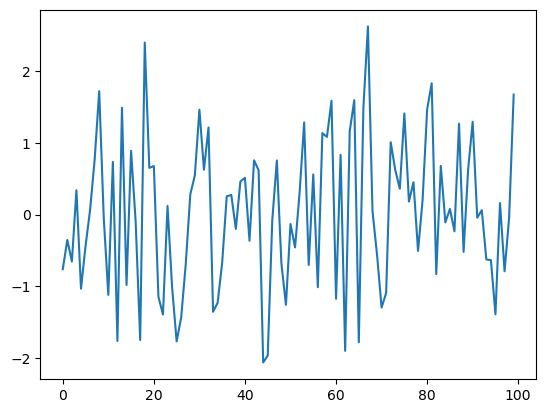

In [13]:
import torch 
import matplotlib.pyplot as plt

device = 'cpu'
data = torch.normal(mean=0, std=1, size=(100,), dtype=torch.float32, device=device)
print(data)
plt.figure()
plt.plot(data)

# 8. <a id='toc8_'></a>[神经网络-训练八股](#toc0_)

|步骤|计算|操作|
|:-|:-|:-|
|1|定义网络模型|->计算出`y_hat`|
|2|选择损失函数|->计算`loss值`、求梯度|
|3|选择优化器|->`更新`网络权重参数|
|4|训练|->实施1、2、3|

## 8.1. <a id='toc8_1_'></a>[现线性回归模型于训练过程-从零开始](#toc0_)

### 8.1.1. <a id='toc8_1_1_'></a>[虚拟出数据](#toc0_)

In [14]:
import torch 
import random

def synthetic_data(w, b, num_examples):  
    """生成y=Xw+b+噪声"""
    X = torch.normal(mean=0, std=1, size=(num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(mean=0, std=0.01, size=y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2

features, labels = synthetic_data(true_w, true_b, 1000)

print('features:', features[0])
print('label:', labels[0])

features: tensor([1.6710, 0.3170])
label: tensor([6.4774])


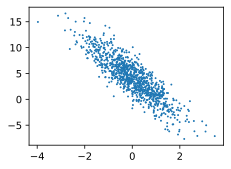

In [18]:
# 绘图，查看分布
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), 
                labels.detach().numpy(), 1);

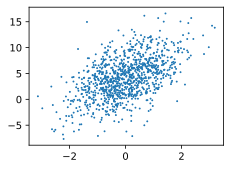

In [19]:
# 绘图，查看分布
d2l.set_figsize()
d2l.plt.scatter(features[:, (0)].detach().numpy(), 
                labels.detach().numpy(), 1);

### 8.1.2. <a id='toc8_1_2_'></a>[读取数据](#toc0_)

In [15]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)                                 # 把原来的indices顺序给打乱了
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.7269, -0.1631],
        [ 2.0933, -0.5410],
        [ 0.7562, -0.6686],
        [-0.4302,  0.3302],
        [-0.1591,  1.4465],
        [ 0.7235, -0.8781],
        [ 0.0123,  0.3597],
        [ 1.0409, -2.0936],
        [ 0.6744, -0.2588],
        [-0.2561, -0.4138]]) 
 tensor([[ 6.2141],
        [10.2228],
        [ 7.9691],
        [ 2.2033],
        [-1.0338],
        [ 8.6305],
        [ 2.9873],
        [13.3875],
        [ 6.4233],
        [ 5.0989]])


### 8.1.3. <a id='toc8_1_3_'></a>[初始化模型参数](#toc0_)

In [60]:
w = torch.normal(mean=0, std=0.01, size=(2,1), requires_grad=True)
b = torch.zeros(size=(1,), requires_grad=True)

### 8.1.4. <a id='toc8_1_4_'></a>[定义模型](#toc0_)

In [61]:
def linreg(X, w, b): 
    """线性回归模型"""
    return torch.matmul(X, w) + b

### 8.1.5. <a id='toc8_1_5_'></a>[定义损失函数](#toc0_)

In [62]:
def squared_loss(y_hat, y):  
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### 8.1.6. <a id='toc8_1_6_'></a>[定义优化算法](#toc0_)

In [63]:
def sgd(params, lr, batch_size):  
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### 8.1.7. <a id='toc8_1_7_'></a>[训练](#toc0_)

In [64]:
lr = 0.5
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
        
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

epoch 1, loss 0.000051
epoch 2, loss 0.000056
epoch 3, loss 0.000051
epoch 4, loss 0.000050
epoch 5, loss 0.000048
epoch 6, loss 0.000052
epoch 7, loss 0.000052
epoch 8, loss 0.000049
epoch 9, loss 0.000049
epoch 10, loss 0.000049
w的估计误差: tensor([-0.0010,  0.0004], grad_fn=<SubBackward0>)
b的估计误差: tensor([-0.0013], grad_fn=<RsubBackward1>)


## 8.2. <a id='toc8_2_'></a>[现线性回归模型于训练过程-简洁实现](#toc0_)
### 8.2.1. <a id='toc8_2_1_'></a>[虚拟数据](#toc0_)

In [16]:
import numpy as np
import torch
from torch.utils import data

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

### 8.2.2. <a id='toc8_2_2_'></a>[读取数据](#toc0_)

In [17]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

### 8.2.3. <a id='toc8_2_3_'></a>[定义模型](#toc0_)

In [18]:
# nn是神经网络的缩写
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

### 8.2.4. <a id='toc8_2_4_'></a>[初始化模型参数](#toc0_)

In [19]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

### 8.2.5. <a id='toc8_2_5_'></a>[定义损失函数](#toc0_)

In [20]:
import torch.nn as nn

loss_fn = nn.MSELoss()

### 8.2.6. <a id='toc8_2_6_'></a>[定义优化算法](#toc0_)

In [21]:
import torch.optim as optim

trainer = optim.SGD(net.parameters(), lr=0.03)

### 8.2.7. <a id='toc8_2_7_'></a>[训练](#toc0_)

In [71]:
num_epochs = 10
for epoch in range(num_epochs):
    for X, y in data_iter:
        y_hat = net(X)                  # 1. 计算y_hat
        loss = loss_fn(y_hat ,y)        # 2. 计算loss值
        trainer.zero_grad()
        loss.backward()                 # 2. 求梯度           
        trainer.step()                  # 3. 更新网络权重参数
    train_loss = loss_fn(net(features), labels)
    print(f'epoch {epoch + 1}, loss {train_loss:f}')

w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

epoch 1, loss 0.000298
epoch 2, loss 0.000098
epoch 3, loss 0.000099
epoch 4, loss 0.000098
epoch 5, loss 0.000100
epoch 6, loss 0.000099
epoch 7, loss 0.000099
epoch 8, loss 0.000099
epoch 9, loss 0.000100
epoch 10, loss 0.000098
w的估计误差： tensor([-0.0003,  0.0004])
b的估计误差： tensor([-0.0004])


### 8.2.8. <a id='toc8_2_8_'></a>[参数保存](#toc0_)

In [72]:
torch.save(
    {
        "epoch": num_epochs, 
        'mode_state_dict': net.state_dict(), 
        'opt_state_dict': trainer.state_dict(), 
        'loss': 'loss'
    }, 
    'Pytorch_params/line_params.pt'
)

### 8.2.9. <a id='toc8_2_9_'></a>[重载](#toc0_)

In [74]:
check_point = torch.load('./Pytorch_params/line_params.pt')

new_net = net = nn.Sequential(nn.Linear(2, 1))
new_net.load_state_dict(check_point['mode_state_dict'])

new_opt = optim.SGD(new_net.parameters(), lr=0.03)
new_opt.load_state_dict(check_point['opt_state_dict'])

# Stop BN、Dropout ...
new_net.eval()

# 停止计算梯度，节省运算和内存
with torch.no_grad():
    pre = new_net(torch.Tensor([3.0, 2.1]))
    print(pre)

tensor([3.0603])


/tmp/ipykernel_32820/1977999358.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  check_point = torch.load('./Pytorch_params/line_params.pt')


## 8.3. <a id='toc8_3_'></a>[专题-模型定义（计算预测值y_hat）](#toc0_)

### 8.3.1. <a id='toc8_3_1_'></a>[块：torch.nn模块](#toc0_)
```shell
1. 简单、快速，但不够灵活
```
```shell
优点：
    一般，pytorch的nn.Sequentail类就比较方便的快速构建神经网络的框架；
    同时，nn也包含了很多完整的神经网络如：CNN、RNN等；
缺点：
    高度封装，需要复杂的自定义神经网络时就不适用了。
```

1. nn.`Sequential`(module1, module2, module3, ...)
    1. .append()
    2. .extend()
    3. .insert()
    4. .pop()
    5. add_module()

2. nn.`ModuleList`([module1, module2, modeul3, ...])
    1. .append()    # 追加
    2. .extend()    # 拼接两个ModuleList
    3. .insert()    # 指定位置插入
    4. .add_module()

3. nn.`ModuleDict`({'m1': module1, 'm2': module2, 'm3': module3, ...})
    1. clear()  # 清空ModuleDict
    2. items()  # 返回可迭代key: value
    3. keys()   # 返回keys
    4. values() # 返回values
    5. pop()    # 返回一对key: value，并从字典中删除
    6. add_module

In [13]:
# help(nn.ModuleDict), help(nn.ModuleList), help(nn.Sequential)

In [17]:
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(786, 256), 
    nn.ReLU(), 
    nn.Linear(256, 256), 
    nn.Tanh(),
    nn.Linear(256, 10), 
    nn.Softmax()
)
net

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=786, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=256, bias=True)
  (4): Tanh()
  (5): Linear(in_features=256, out_features=10, bias=True)
  (6): Softmax(dim=None)
)

In [18]:
net1 = nn.ModuleList([net, net, net])
net1

ModuleList(
  (0-2): 3 x Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=786, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Tanh()
    (5): Linear(in_features=256, out_features=10, bias=True)
    (6): Softmax(dim=None)
  )
)

In [19]:
net2 = nn.ModuleDict(
    {
        'm1': net,
        'm2': net, 
        'm3': net
    }
)
net2

ModuleDict(
  (m1): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=786, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Tanh()
    (5): Linear(in_features=256, out_features=10, bias=True)
    (6): Softmax(dim=None)
  )
  (m2): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=786, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Tanh()
    (5): Linear(in_features=256, out_features=10, bias=True)
    (6): Softmax(dim=None)
  )
  (m3): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=786, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): Tanh()
    (5): Linear(in_features=256, out_features=10, bias=True)
    (6): Softmax(dim=None)
  )
)

### 8.3.2. <a id='toc8_3_2_'></a>[块：自定义](#toc0_)
```shell
2. 灵活，但麻烦
```

#### 8.3.2.1. <a id='toc8_3_2_1_'></a>[自定义块](#toc0_)

* 从编程的角度看：块就是Class

* `nn.Module`会自动调用`forward()`方法，我们也可以重写该方法，从而实现更加灵活的计算

In [21]:
import torch.nn.functional as F 
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        '''定义每个块或层'''
        super().__init__()
        self.hidden = nn.Linear(20, 256)
        self.out = nn.Linear(256, 10)

    def forward(self, X):
        '''正向传播'''
        return self.out(F.relu(self.hidden(X)))

net = Net()

#### 8.3.2.2. <a id='toc8_3_2_2_'></a>[顺序块](#toc0_)
```
Sequential就是顺序块，这里我们自己从头实现一边Sequential这个方法
```

In [22]:
# torch.nn.Sequential()

class MySequential(nn.Module):
    def __init__(self, *args):
        super().__init__()
        for idx, module in enumerate(args):
            self._modules[str(idx)] = module

    def forward(self, X):
        for block in self._modules.values():
            X = block(X)
        return X

net = MySequential(nn.Linear(20, 256), nn.ReLU(), nn.Linear(256, 10))

#### 8.3.2.3. <a id='toc8_3_2_3_'></a>[效率](#toc0_)
```shell
1. 一个块可以由许多层组成；一个块可以由许多块组成。
2. 块可以包含代码。
3. 块负责大量的内部处理，包括参数初始化和反向传播。
4. 层和块的顺序连接由Sequential块处理。
```
```shell
读者可能会开始担心操作效率的问题。 毕竟，我们在一个高性能的深度学习库中进行了大量的字典查找、 代码执行和许多其他的Python代码。 Python的问题全局解释器锁 是众所周知的。 在深度学习环境中，我们担心速度极快的GPU可能要等到CPU运行Python代码后才能运行另一个作业。
```

### 8.3.3. <a id='toc8_3_3_'></a>[模型结构/组成](#toc0_)

In [1]:
from torch import nn 

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 3)
        self.block = nn.Sequential(nn.Linear(3, 128))
        self.decode = nn.Linear(128, 2)

    def forward(self, X):
        y = self.linear(X)
        y = self.bloack(y)
        y = self.decode(y)
        return y

# Init the Net()
net = Net()

#### 8.3.3.1. <a id='toc8_3_3_1_'></a>[.children()](#toc0_)
列出`第一级别`的module权重。

In [32]:
# net
list(net.children())

[Linear(in_features=2, out_features=3, bias=True),
 Sequential(
   (0): Linear(in_features=3, out_features=128, bias=True)
 ),
 Linear(in_features=128, out_features=2, bias=True)]

#### 8.3.3.2. <a id='toc8_3_3_2_'></a>[.named_children()](#toc0_)
列出`第一级别`的module权重名称和权重。

In [33]:
for name, children in net.named_children():
    print(name, '\t', children)

linear 	 Linear(in_features=2, out_features=3, bias=True)
block 	 Sequential(
  (0): Linear(in_features=3, out_features=128, bias=True)
)
decode 	 Linear(in_features=128, out_features=2, bias=True)


#### 8.3.3.3. <a id='toc8_3_3_3_'></a>[.modules()](#toc0_)
依次列出`所有`的module权重。

In [9]:
for module in net.modules():
    print( module)
    print('='*10)

Net(
  (linear): Linear(in_features=2, out_features=3, bias=True)
  (block): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
  )
  (decode): Linear(in_features=128, out_features=2, bias=True)
)
Linear(in_features=2, out_features=3, bias=True)
Sequential(
  (0): Linear(in_features=3, out_features=128, bias=True)
)
Linear(in_features=3, out_features=128, bias=True)
Linear(in_features=128, out_features=2, bias=True)


#### 8.3.3.4. <a id='toc8_3_3_4_'></a>[.named_modules()](#toc0_)
依次列出`所有`的module权重名和权重。

In [34]:
for name, module in net.named_modules():
    print(name, '>>>', module)
    print('='*10)

 >>> Net(
  (linear): Linear(in_features=2, out_features=3, bias=True)
  (block): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
  )
  (decode): Linear(in_features=128, out_features=2, bias=True)
)
linear >>> Linear(in_features=2, out_features=3, bias=True)
block >>> Sequential(
  (0): Linear(in_features=3, out_features=128, bias=True)
)
block.0 >>> Linear(in_features=3, out_features=128, bias=True)
decode >>> Linear(in_features=128, out_features=2, bias=True)


#### 8.3.3.5. <a id='toc8_3_3_5_'></a>[删除和添加](#toc0_)
先利用 net`.children()`迭代话模型第一层级，再`列表化 (list())` 并进行`索引提取`，最终实现删除或添加的操作。

In [35]:
from torch import nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 3)
        self.block = nn.Sequential(nn.Linear(3, 128))
        self.decode = nn.Linear(128, 2)

    def forward(self, X):
        y = self.linear(X)
        y = self.bloack(y)
        y = self.decode(y)
        return y

class NetDel(nn.Module):
    def __init__(self):
        super().__init__()
        # self.net = Net()                                              ## 会报错
        self.netdel_list = list(Net().children())[0:-1]                 # 删除最后一个结构
        self.netdel_list += [nn.Linear(128, 256), nn.Linear(256, 2)]    # 添加两个新的结构
        self.netdel = nn.Sequential(*self.netdel_list)

    def forward(self, X):
        return self.netdel(X)

netdel = NetDel()
# netdel
list(netdel.children())

[Sequential(
   (0): Linear(in_features=2, out_features=3, bias=True)
   (1): Sequential(
     (0): Linear(in_features=3, out_features=128, bias=True)
   )
   (2): Linear(in_features=128, out_features=256, bias=True)
   (3): Linear(in_features=256, out_features=2, bias=True)
 )]

#### 8.3.3.6. <a id='toc8_3_3_6_'></a>[替换](#toc0_)
直接访`问模型的具体层级`，`替换`即可。

* 当通过 `Sequential类` 定义模型时，我们可以通过 `索引 (下标)` 来访问模型的任意层；

* `自定义的重载nn.Module` 的layer1、layer2等等，需要net`.`layer1或net`.`layer2方式进行调用；

In [88]:
from torch import nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 3)
        self.block = nn.Sequential(nn.Linear(3, 128))
        self.decode = nn.Linear(128, 2)

    def forward(self, X):
        y = self.linear(X)
        y = self.bloack(y)
        y = self.decode(y)
        return y

class NetMod(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = Net()
        in_features = self.model.decode.in_features
        self.model.decode = nn.Linear(in_features=in_features, out_features=10)

    def forward(self, X):
        return self.model(X)

netmod = NetMod()
netmod

NetMod(
  (model): Net(
    (linear): Linear(in_features=2, out_features=3, bias=True)
    (block): Sequential(
      (0): Linear(in_features=3, out_features=128, bias=True)
    )
    (decode): Linear(in_features=128, out_features=10, bias=True)
  )
)

#### 8.3.3.7. <a id='toc8_3_3_7_'></a>[add_module()](#toc0_)
`add_module()` 方法用于将子模块添加到当前模块中，并为其指定一个名称。

In [43]:
from torch import nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 3)
        self.block = nn.Sequential(nn.Linear(3, 128))
        self.decode = nn.Linear(128, 2)

    def forward(self, X):
        y = self.linear(X)
        y = self.bloack(y)
        y = self.decode(y)
        return y

net = Net()
net.add_module(name='add_demo', module=nn.Linear(2, 256))
net.add_module(name='final_demo', module=nn.Sequential(nn.Linear(256, 128), nn.Linear(128, 2)))
net

Net(
  (linear): Linear(in_features=2, out_features=3, bias=True)
  (block): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
  )
  (decode): Linear(in_features=128, out_features=2, bias=True)
  (add_demo): Linear(in_features=2, out_features=256, bias=True)
  (final_demo): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=2, bias=True)
  )
)

### 8.3.4. <a id='toc8_3_4_'></a>[模型：参数管理](#toc0_)

* 其实可以将`nn.Sequential`视为Python的`list数据结构`，`按顺序`储存神经网络层

In [95]:
import torch
from torch import nn

net = nn.Sequential(
    nn.Linear(4, 8), 
    nn.ReLU(), 
    nn.Linear(8, 1)
)

X = torch.rand(size=(2, 4))
net(X)

tensor([[-0.0865],
        [-0.0746]], grad_fn=<AddmmBackward0>)

#### 8.3.4.1. <a id='toc8_3_4_1_'></a>[参数访问](#toc0_)

* 我们从已有模型中访问参数；

* 当通过 `Sequential类` 定义模型时，我们可以通过 `索引 (下标)` 来访问模型的任意层；

* `自定义的重载nn.Module` 的layer1、layer2等等，需要net`.`layer1或net`.`layer2方式进行调用；

* 这就像模型是一个列表一样，每层的参数都在其属性中。

##### 8.3.4.1.1. <a id='toc8_3_4_1_1_'></a>[state_dict](#toc0_)

In [96]:
net # nn.Sequential类，可以直接用下标进行索引

Sequential(
  (0): Linear(in_features=4, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [97]:
net[0], net[1], net[2] # nn.Sequential类，可以直接用下标进行索引

(Linear(in_features=4, out_features=8, bias=True),
 ReLU(),
 Linear(in_features=8, out_features=1, bias=True))

In [98]:
net[0].state_dict()

OrderedDict([('weight',
              tensor([[ 0.4129, -0.2663,  0.0648, -0.3372],
                      [-0.1280, -0.2531, -0.0131, -0.2696],
                      [ 0.0538,  0.1759, -0.1103, -0.3805],
                      [-0.2477, -0.0914,  0.1431,  0.2419],
                      [ 0.1345, -0.0516, -0.0536, -0.4364],
                      [ 0.1144, -0.3585, -0.2615,  0.1957],
                      [ 0.2924,  0.0015,  0.4087,  0.3759],
                      [ 0.4440, -0.2937, -0.0911, -0.4929]])),
             ('bias',
              tensor([-0.4462,  0.1640,  0.4165, -0.2921, -0.0450, -0.2606, -0.1634,  0.2880]))])

In [99]:
net[0].weight

Parameter containing:
tensor([[ 0.4129, -0.2663,  0.0648, -0.3372],
        [-0.1280, -0.2531, -0.0131, -0.2696],
        [ 0.0538,  0.1759, -0.1103, -0.3805],
        [-0.2477, -0.0914,  0.1431,  0.2419],
        [ 0.1345, -0.0516, -0.0536, -0.4364],
        [ 0.1144, -0.3585, -0.2615,  0.1957],
        [ 0.2924,  0.0015,  0.4087,  0.3759],
        [ 0.4440, -0.2937, -0.0911, -0.4929]], requires_grad=True)

In [100]:
net[0].weight.data # 访问目标参数

tensor([[ 0.4129, -0.2663,  0.0648, -0.3372],
        [-0.1280, -0.2531, -0.0131, -0.2696],
        [ 0.0538,  0.1759, -0.1103, -0.3805],
        [-0.2477, -0.0914,  0.1431,  0.2419],
        [ 0.1345, -0.0516, -0.0536, -0.4364],
        [ 0.1144, -0.3585, -0.2615,  0.1957],
        [ 0.2924,  0.0015,  0.4087,  0.3759],
        [ 0.4440, -0.2937, -0.0911, -0.4929]])

In [101]:
net[0].bias

Parameter containing:
tensor([-0.4462,  0.1640,  0.4165, -0.2921, -0.0450, -0.2606, -0.1634,  0.2880],
       requires_grad=True)

In [102]:
net[0].bias.data # 访问目标参数

tensor([-0.4462,  0.1640,  0.4165, -0.2921, -0.0450, -0.2606, -0.1634,  0.2880])

In [103]:
# 也可以直接输出神经网络的所有层参数信息，net[1]是relu激活函数，没有参数，所以就显示无
# 后续，torch.save(net.state_dict(), 'Pytorch_datasets/net_params)
net.state_dict() 

OrderedDict([('0.weight',
              tensor([[ 0.4129, -0.2663,  0.0648, -0.3372],
                      [-0.1280, -0.2531, -0.0131, -0.2696],
                      [ 0.0538,  0.1759, -0.1103, -0.3805],
                      [-0.2477, -0.0914,  0.1431,  0.2419],
                      [ 0.1345, -0.0516, -0.0536, -0.4364],
                      [ 0.1144, -0.3585, -0.2615,  0.1957],
                      [ 0.2924,  0.0015,  0.4087,  0.3759],
                      [ 0.4440, -0.2937, -0.0911, -0.4929]])),
             ('0.bias',
              tensor([-0.4462,  0.1640,  0.4165, -0.2921, -0.0450, -0.2606, -0.1634,  0.2880])),
             ('2.weight',
              tensor([[-0.0894, -0.1603, -0.1185,  0.0858, -0.0592, -0.1632,  0.1876, -0.0784]])),
             ('2.bias', tensor([-0.1285]))])

##### 8.3.4.1.2. <a id='toc8_3_4_1_2_'></a>[parameters](#toc0_)

In [104]:
net.parameters(), net.parameters

(<generator object Module.parameters at 0x7f0dc565da80>,
 <bound method Module.parameters of Sequential(
   (0): Linear(in_features=4, out_features=8, bias=True)
   (1): ReLU()
   (2): Linear(in_features=8, out_features=1, bias=True)
 )>)

In [105]:
for param in net.parameters():
    print(type(param))
    print(param)
    print(param.requires_grad)
    print(param.grad)
    print(param.is_leaf)
    # break

<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([[ 0.4129, -0.2663,  0.0648, -0.3372],
        [-0.1280, -0.2531, -0.0131, -0.2696],
        [ 0.0538,  0.1759, -0.1103, -0.3805],
        [-0.2477, -0.0914,  0.1431,  0.2419],
        [ 0.1345, -0.0516, -0.0536, -0.4364],
        [ 0.1144, -0.3585, -0.2615,  0.1957],
        [ 0.2924,  0.0015,  0.4087,  0.3759],
        [ 0.4440, -0.2937, -0.0911, -0.4929]], requires_grad=True)
True
None
True
<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([-0.4462,  0.1640,  0.4165, -0.2921, -0.0450, -0.2606, -0.1634,  0.2880],
       requires_grad=True)
True
None
True
<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([[-0.0894, -0.1603, -0.1185,  0.0858, -0.0592, -0.1632,  0.1876, -0.0784]],
       requires_grad=True)
True
None
True
<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([-0.1285], requires_grad=True)
True
None
True


In [106]:
for param  in net[0].parameters():
    print(param)
    print(param.requires_grad)
    print(param.grad)
    print(param.is_leaf)
    # break

Parameter containing:
tensor([[ 0.4129, -0.2663,  0.0648, -0.3372],
        [-0.1280, -0.2531, -0.0131, -0.2696],
        [ 0.0538,  0.1759, -0.1103, -0.3805],
        [-0.2477, -0.0914,  0.1431,  0.2419],
        [ 0.1345, -0.0516, -0.0536, -0.4364],
        [ 0.1144, -0.3585, -0.2615,  0.1957],
        [ 0.2924,  0.0015,  0.4087,  0.3759],
        [ 0.4440, -0.2937, -0.0911, -0.4929]], requires_grad=True)
True
None
True
Parameter containing:
tensor([-0.4462,  0.1640,  0.4165, -0.2921, -0.0450, -0.2606, -0.1634,  0.2880],
       requires_grad=True)
True
None
True


##### 8.3.4.1.3. <a id='toc8_3_4_1_3_'></a>[named_parameters](#toc0_)

In [114]:
# list(net.named_parameters())
for name, param in net.named_parameters():
    print(name, '\t', param)

0.weight 	 Parameter containing:
tensor([[ 0.4129, -0.2663,  0.0648, -0.3372],
        [-0.1280, -0.2531, -0.0131, -0.2696],
        [ 0.0538,  0.1759, -0.1103, -0.3805],
        [-0.2477, -0.0914,  0.1431,  0.2419],
        [ 0.1345, -0.0516, -0.0536, -0.4364],
        [ 0.1144, -0.3585, -0.2615,  0.1957],
        [ 0.2924,  0.0015,  0.4087,  0.3759],
        [ 0.4440, -0.2937, -0.0911, -0.4929]], requires_grad=True)
0.bias 	 Parameter containing:
tensor([-0.4462,  0.1640,  0.4165, -0.2921, -0.0450, -0.2606, -0.1634,  0.2880],
       requires_grad=True)
2.weight 	 Parameter containing:
tensor([[-0.0894, -0.1603, -0.1185,  0.0858, -0.0592, -0.1632,  0.1876, -0.0784]],
       requires_grad=True)
2.bias 	 Parameter containing:
tensor([-0.1285], requires_grad=True)


#### 8.3.4.2. <a id='toc8_3_4_2_'></a>[参数初始化](#toc0_)

* 初始化，主要是为了不要再一开始训练就炸掉了，其实不用太迷信了。

* 默认情况下，PyTorch会根据一个范围均匀地初始化权重和偏置矩阵， 这个范围是根据输入和输出维度计算出的。 

* PyTorch的nn.init模块提供了多种预置初始化方法。

##### 8.3.4.2.1. <a id='toc8_3_4_2_1_'></a>[内置初始化](#toc0_)

In [50]:
m = net[0]
nn.init.normal_(m.weight, mean=0, std=0.01)
nn.init.zeros_(m.bias)

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

##### 8.3.4.2.2. <a id='toc8_3_4_2_2_'></a>[自定义初始化](#toc0_)

##### 8.3.4.2.3. <a id='toc8_3_4_2_3_'></a>[参数绑定](#toc0_)
```
有时我们希望在多个层间共享参数： 我们可以定义一个稠密层，然后使用它的参数来设置另一个层的参数。
```

In [52]:
# 我们需要给共享层一个名称，以便可以引用它的参数
shared = nn.Linear(8, 8)

net = nn.Sequential(
    nn.Linear(4, 8), 
    nn.ReLU(),
    shared, 
    nn.ReLU(),
    shared, 
    nn.ReLU(),
    nn.Linear(8, 1)
)

net(X)

# 检查参数是否相同
print(net[2].weight.data[0] == net[4].weight.data[0])

net[2].weight.data[0, 0] = 100

# 确保它们实际上是同一个对象，而不只是有相同的值
print(net[2].weight.data[0] == net[4].weight.data[0])

tensor([True, True, True, True, True, True, True, True])
tensor([True, True, True, True, True, True, True, True])


### 8.3.5. <a id='toc8_3_5_'></a>[层：自定义](#toc0_)
```shell
深度学习成功背后的一个因素是神经网络的灵活性： 
我们可以用创造性的方式组合不同的层，从而设计出适用于各种任务的架构。 
例如，研究人员发明了专门用于处理图像、文本、序列数据和执行动态规划的层。 
有时我们会遇到或要自己发明一个现在在深度学习框架中还不存在的层。 
在这些情况下，必须构建自定义层。本节将展示如何构建自定义层。
```
```shell
块和层其实并无本质的区别，因为都是torch.nn.Module的子类

e.g. 
    全连接层（FC）
    池化层（Pooling）
    BN层
    Dropout层
    ...
```

#### 8.3.5.1. <a id='toc8_3_5_1_'></a>[不带参数的层](#toc0_)

In [53]:
import torch
import torch.nn.functional as F
from torch import nn

class CenteredLayer(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, X):
        return X - X.mean()
    
layer = CenteredLayer()
layer(torch.FloatTensor([1, 2, 3]))

tensor([-1.,  0.,  1.])

In [54]:
# 现在，我们可以将层作为组件合并到更复杂的模型中。
net = nn.Sequential(
    nn.Linear(8, 128), 
    CenteredLayer()
)

Y = net(torch.rand(4, 8))
Y.mean()

tensor(-9.3132e-09, grad_fn=<MeanBackward0>)

#### 8.3.5.2. <a id='toc8_3_5_2_'></a>[带参数的层](#toc0_)

用到`nn.Parameter()`可以将参数加入神经网络中，便于自动管理

In [55]:
class MyLinear(nn.Module):
    def __init__(self, in_units, units):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(in_units, units)) 
        self.bias = nn.Parameter(torch.randn(units,))
        
    def forward(self, X):
        linear = torch.matmul(X, self.weight.data) + self.bias.data
        return F.relu(linear)
    
linear = MyLinear(5, 3)
# linear.weight

linear(torch.rand(2, 5))

tensor([[0.0000, 0.0000, 0.0000],
        [0.1466, 0.0000, 0.0000]])

In [ ]:
# 我们还可以使用自定义层构建模型，就像使用内置的全连接层一样使用自定义层。
net = nn.Sequential(
    MyLinear(64, 8), 
    MyLinear(8, 1)
)

net(torch.rand(2, 64))

## 8.4. <a id='toc8_4_'></a>[专题-损失函数 (loss_fn)](#toc0_)
- 损失函数的输入是 (output, target) ，即网络输出和真实标签对的数据，然后返回一个数值表示网络输出和真实标签的差距。

  1. 均方误差

  2. 交叉熵
  
  3. 自定义

### 8.4.1. <a id='toc8_4_1_'></a>[均方误差](#toc0_)
回归。

In [56]:
loss_fn = torch.nn.MSELoss()

### 8.4.2. <a id='toc8_4_2_'></a>[交叉熵](#toc0_)
分类。

In [57]:
loss_fn = torch.nn.CrossEntropyLoss()

### 8.4.3. <a id='toc8_4_3_'></a>[自定义](#toc0_)
自己定义赏罚分。

In [58]:
def loss_fn(y, y_hat):
    '''例如真实值于预测值之差'''
    error_values = y - y_hat
    return error_values

## 8.5. <a id='toc8_5_'></a>[专题-反向传播（求梯度）](#toc0_)
```
求梯度（求偏导数）
```

In [ ]:
# 见autograd

## 8.6. <a id='toc8_6_'></a>[专题-更新权重（优化算法）](#toc0_)
- 优化算法，在深度学习中是非常重要的一环。在对损失函数进行优化的时候，比较关注损失函数的凹凸性的问题。  
- 可惜的是，在现有损失函数中，只有线性函数网络结构和softmax结构是凸函数，其它例如MLP、CNN、RNN、注意力等都是非凸函数。  
- 并且，在优化过程中通常只是得到了局部最小值，而不是全局最小值；
- 小批量随机梯度下降算法是最常用的优化算法；
- 冲量对梯度做平滑；
- Adam对梯度做平滑，且对梯度各纬度值重新做调整。

- 原函数图像

Text(0.5, 1.0, 'Function')

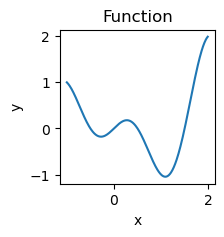

In [1]:
import torch 

import matplotlib.pyplot as plt 


x = torch.arange(-1, 2, 0.01, dtype=torch.float32, requires_grad=True)
y = x * torch.cos(torch.pi * x)


plt.figure(figsize=(2,2))
plt.plot(x.detach().cpu().numpy(), y.detach().cpu().numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function')

- 导函数图像

Text(0.5, 1.0, 'grad')

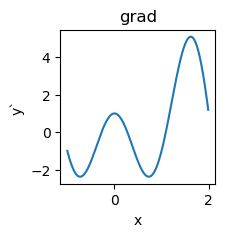

In [2]:
def y(x):
    y_hat = x * torch.cos(torch.pi * x)
    x_grad = torch.autograd.grad(outputs=y_hat, inputs=x)
    return x_grad[0].detach().cpu().numpy()

x_grads = [y(i) for i in x]

plt.figure(figsize=(2,2))
plt.plot(x.detach().cpu().numpy(), x_grads)
plt.xlabel('x')
plt.ylabel('y`')
plt.title('grad')

- 梯度下降

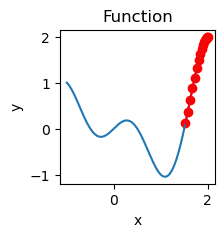

In [3]:
import torch

import matplotlib.pyplot as plt


def f(x):
    return x * torch.cos(torch.pi * x)

def gd(x, y=f, eta=0.01, iter:int=5):
    x_list = [x]    # 先存第一个数
    i = 1
    for _ in range(iter):
        x_tensor = torch.tensor(x, dtype=torch.float32, requires_grad=True)
        x_grad = torch.autograd.grad(outputs= f(x_tensor), inputs=x_tensor)
        x -= (eta * x_grad[0].item())
        x_list.append(x)
        i += 1
    return x_list

# 从x开始，迭代iter次
def demo(x, y, eta, iter, c):
    xx = gd(x=x, y=f, eta=eta, iter=iter )
    yy = f(torch.tensor(xx))
    return xx, yy.detach().cpu().numpy(), c

x = torch.arange(-1, 2, 0.01, dtype=torch.float32, requires_grad=True)
y = f(x)

plt.figure(figsize=(2, 2))
plt.plot(x.detach().cpu().numpy(), y.detach().cpu().numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function')

x, y, c = demo(x=2, y=f, eta=0.01, iter=15, c='red')    # lr很小就接近收敛
plt.scatter(x=x, y=y, c=c)
plt.plot(x, y, c=c)

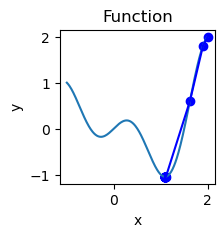

In [5]:
x = torch.arange(-1, 2, 0.01, dtype=torch.float32, requires_grad=True)
y = f(x)

plt.figure(figsize=(2, 2))
plt.plot(x.detach().cpu().numpy(), y.detach().cpu().numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function')

x, y, c = demo(x=2, y=f, eta=0.1, iter=30, c='blue')    # lr很大就很快收敛
plt.scatter(x=x, y=y, c=c)
plt.plot(x, y, c=c)

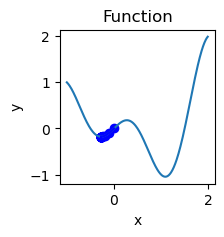

In [6]:
x = torch.arange(-1, 2, 0.01, dtype=torch.float32, requires_grad=True)
y = f(x)

plt.figure(figsize=(2, 2))
plt.plot(x.detach().cpu().numpy(), y.detach().cpu().numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function')

x, y, c = demo(x=0, y=f, eta=0.1, iter=30, c='blue')    # 陷入0左侧附近的局部最小值点
plt.scatter(x=x, y=y, c=c)
plt.plot(x, y, c=c)

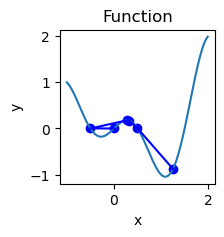

In [7]:
x = torch.arange(-1, 2, 0.01, dtype=torch.float32, requires_grad=True)
y = f(x)

plt.figure(figsize=(2, 2))
plt.plot(x.detach().cpu().numpy(), y.detach().cpu().numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function')

x, y, c = demo(x=0, y=f, eta=0.5, iter=5, c='blue')   # lr太大就乱跳
plt.scatter(x=x, y=y, c=c)
plt.plot(x, y, c=c)

### 8.6.1. <a id='toc8_6_1_'></a>[随机梯度下降（SGD）](#toc0_)
- 随机梯度下降法，利用单个样本进行估算所有样本的梯度，然后进行后续的优化。这是计算效率很低的方式，所有改成小批量的随机梯度下降，可以提高计算效率。  
- `小批量随机梯度下降法`是最常用的优化算法；
- batch_size是所有样本，就是`梯度下降`。
- `动量 (momentum)` 可以起到缓冲的作用，使得优化方向不会不停跳动，而是考虑之前几步的方向，具体考虑前多少步依赖于值的大小，一般取值为：0.5, 0.90, 0.99 等。

In [25]:
torch.optim.SGD(
    params=net.parameters(), 
    lr=0.01, 
    momentum=0.99, 
    # weight_decay=
)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.99
    nesterov: False
    weight_decay: 0
)

### 8.6.2. <a id='toc8_6_2_'></a>[adam](#toc0_)
- Adam其实就是非常平滑的SGD，只是其对lr不敏感；  
- Adam未必比SGD效果更好。

In [59]:
torch.optim.Adam(
    params=net.parameters(), 
    lr=0.01
)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

### 8.6.3. <a id='toc8_6_3_'></a>[RMSprop](#toc0_)

In [60]:
torch.optim.RMSprop(
    params=net.parameters(), 
    lr=0.01
)

RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    weight_decay: 0
)

### 8.6.4. <a id='toc8_6_4_'></a>[学习率调度器](#toc0_)

#### 8.6.4.1. <a id='toc8_6_4_1_'></a>[StepLR： 按照固定的步长调整学习率](#toc0_)

In [92]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

for epoch in range(100):
    train(...)
    validate(...)
    scheduler.step()

#### 8.6.4.2. <a id='toc8_6_4_2_'></a>[MultiStepLR： 在指定的里程碑（milestones）上调整学习率](#toc0_)

In [ ]:
from torch.optim.lr_scheduler import MultiStepLR

scheduler = MultiStepLR(optimizer, milestones=[30, 80], gamma=0.1)

#### 8.6.4.3. <a id='toc8_6_4_3_'></a>[ExponentialLR： 以指数衰减的方式调整学习率](#toc0_)

In [ ]:
from torch.optim.lr_scheduler import ExponentialLR

scheduler = ExponentialLR(optimizer, gamma=0.9)

#### 8.6.4.4. <a id='toc8_6_4_4_'></a>[CosineAnnealingLR： 余弦退火调整学习率](#toc0_)

In [ ]:
from torch.optim.lr_scheduler import CosineAnnealingLR

scheduler = CosineAnnealingLR(optimizer, T_max=50)

#### 8.6.4.5. <a id='toc8_6_4_5_'></a>[ReduceLROnPlateau： 当指标停止改善时，降低学习率](#toc0_)

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10)

for epoch in range(100):
    train(...)
    val_loss = validate(...)
    scheduler.step(val_loss)

#### 8.6.4.6. <a id='toc8_6_4_6_'></a>[LambdaLR： 使用自定义的函数来调整学习率](#toc0_)

In [ ]:
from torch.optim.lr_scheduler import LambdaLR

lambda1 = lambda epoch: 0.65 ** epoch
scheduler = LambdaLR(optimizer, lr_lambda=lambda1)

#### 8.6.4.7. <a id='toc8_6_4_7_'></a>[自定义](#toc0_)

In [2]:
import torch

# torch.optim.lr_scheduler._LRScheduler

In [3]:
help(torch.optim.lr_scheduler._LRScheduler)

Help on class _LRScheduler in module torch.optim.lr_scheduler:

class _LRScheduler(LRScheduler)
 |  _LRScheduler(optimizer: torch.optim.optimizer.Optimizer, last_epoch=-1, verbose='deprecated')
 |
 |  # Including _LRScheduler for backwards compatibility
 |  # Subclass instead of assign because we want __name__ of _LRScheduler to be _LRScheduler (assigning would make it LRScheduler).
 |
 |  Method resolution order:
 |      _LRScheduler
 |      LRScheduler
 |      builtins.object
 |
 |  Data and other attributes defined here:
 |
 |  __annotations__ = {}
 |
 |  ----------------------------------------------------------------------
 |  Methods inherited from LRScheduler:
 |
 |  __init__(self, optimizer: torch.optim.optimizer.Optimizer, last_epoch=-1, verbose='deprecated')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  get_last_lr(self) -> List[float]
 |      Return last computed learning rate by current scheduler.
 |
 |  get_lr(self) -> List[float]
 |
 |  loa

## 8.7. <a id='toc8_7_'></a>[专题-训练](#toc0_)

![Train step via pure PyTorch](./Pytorch_Pictures/PyTorch_graphacial_demo/Train_step_via_pure_PyTorch.jpg)

```shell
训练的模板代码
```
```sehll
net.train():
    启用 Batch Normalization 和 Dropout。
    如果模型中有BN层(Batch Normalization）和Dropout，需要在训练时添加model.train()
    model.train()作用： 
                        对BN层，保证BN层能够用到每一批数据的均值和方差，并进行计算更新；
                        对于Dropout，model.train()是随机取一部分网络连接来训练更新参数。

net.eval()
    不启用 Batch Normalization 和 Dropout。
    如果模型中有BN层(Batch Normalization）和Dropout，在测试时添加model.eval()。
    model.eval()是保证BN层直接利用之前训练阶段得到的均值和方差，即测试过程中要保证BN层的均值和方差不变；
                        对于Dropout，model.eval()是利用到了所有网络连接，即不进行随机舍弃神经元。
                        
with torch.no_grad():
    pass

    无论是train() 还是eval() 模式，各层的gradient计算和存储都在进行且完全一致，在forward的时候会保存中间结果和创建计算图以为后续的
    反向传播做准备。而with torch.no_grad()则主要是用于停止autograd模块的工作，在内存中不储存的forward计算结果和不构建计算图，以起到加速和节省显存的作用。它的作用是将该with语句包裹起来的部分停止梯度的更新，从而节省了GPU算力和显存，但是并不会影响dropout和BN层的行为。
    若想节约算力，可在test阶段带上torch.no_grad()，示例代码：
```

In [75]:
# 数据准备
import torch 
import torch.nn as nn 
# import torch.nn.functional as F 
import torch.utils.data as data

import torchvision

dbs = './Pytorch_datasets/'
train_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=True, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(), 
            #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

test_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=False, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(), 
            #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

# 迭代型数据方式
train_iter = data.DataLoader(
    dataset=train_dataset, 
    batch_size=128, 
    shuffle=True
)

# test_iter = data.DataLoader(dataset=test_dataset) # test不需要batch训练

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 3659860.80it/s]


Extracting ./Pytorch_datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./Pytorch_datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 119645.04it/s]


Extracting ./Pytorch_datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./Pytorch_datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 912416.46it/s] 


Extracting ./Pytorch_datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./Pytorch_datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 17224709.56it/s]

Extracting ./Pytorch_datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./Pytorch_datasets/MNIST/raw



In [79]:
# 网络结构
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256), 
            nn.ReLU(),
            nn.Linear(256, 10), 
            nn.Softmax()
        )
        
    def forward(self, X):
        return self.network(X)

In [80]:
# 训练过程封装
import time
import matplotlib.pyplot as plt 
import IPython.display as display
import os

def train_steps(
        epochs, 
        train_dataset, 
        train_iter, 
        test_dataset, 
        net, 
        loss_fn, 
        opt, 
        device, 
        train_figure = False, 
        resume = False, 
        PATH = 'Pytorch_params/weights'
    ):
    '''
    参数记录:
            epochs = epochs                         # epoch
            train_dataset = train_dataset           # 全部train数据集
            train_iter = train_iter                 # batch之后的train数据集
            test_dataset = test_dataset             # 全部test数据集
            net = net                               # 网络模型
            loss_fn = loss_fn                       # 损失函数
            opt = opt                               # 优化器
            device = device                         # device GPU/CPU
            train_figure = False                    # 可视化训练过程
            resume = False                          # 断点续训
    '''
    # 拷贝数据和模型到device上
    print('='*100)
    print(f"Runing on {device}")
    print('='*100)
    ## 数据
    train_all_data_gpu = train_dataset.data.to(device)                                      # .to(device)
    train_all_targets_gpu = train_dataset.targets.to(device)                                # .to(device)
    test_all_data_gpu = test_dataset.data.to(device)                                        # .to(device)
    test_all_targets_gpu = test_dataset.targets.to(device)                                  # .to(device)
    ## 模型
    net.to(device)                                                                          # .to(device)

    def dl_plot(epochs:int, epoch_list:list, train_loss_list:list, train_acc_list:list, test_acc_list:list):
        '''绘图'''
        plt.rcParams['font.sans-serif']=['Times new roman', 'Arial', 'KaiTi']
        plt.style.context(['ggplot', 'seaborn'])
        
        plt.close()
        fig = plt.figure(figsize=(3.0, 3.0))

        # for y, label in zip([train_loss_list, train_acc_list, test_acc_list], ['train_loss', 'train_acc', 'test_acc']):
        for y, label in zip([train_acc_list, test_acc_list], ['train_acc', 'test_acc']):
            plt.plot(epoch_list, y, label=label)
        plt.grid()
        plt.legend()
        plt.xlabel('Epoch')
        plt.xlim((1, epochs))
        plt.ylabel('Values')
        plt.ylim((0, 1))
        plt.yticks(torch.arange(0, 1, 0.05).numpy())
        # plt.tight_layout()

        display.display(fig)
        display.clear_output(wait=True)

    # 开始迭代
    start = time.time()
    epoch_list = []
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []
    best_test_acc = 0

    # 断点续训
    start_epoch = 0
    if resume:
        if os.path.isfile(PATH+'/last.pt'):
            check_point = torch.load(PATH+'/last.pt')
            start_epoch = check_point['epoch']
            net.load_state_dict(check_point['model_state_dict'])
            opt.load_state_dict(check_point['opt_state_dict'])
        else:
            print(f'没有训练记录。')
        
    print('start_epoch: ', start_epoch)
    for epoch in range(start_epoch, epochs, 1):
        net.train()                             # 训练模式
        epoch_list.append(epoch+1)
        for batch_record in train_iter:
            X, y = batch_record                 # 分配X, y
            X, y = X.to(device), y.to(device)   ## 复制到device（GPU/CPU）上                    # .to(device)
            # print(X[0])
            # print(X[0].dtype)
            # break
            y_hat = net(X)                      # 计算y_hat
            loss = loss_fn(y_hat, y)            # 计算loss
            opt.zero_grad()                     # 默认是累加，此处从新求导
            loss.backward()                     # 计算梯度
            opt.step()                          # 更新网络参数

        net.eval()                              # 切换至评估模式
                                                # 模型默认是net.train()
                                                # 但是net中含有BN、Dropout等，在test时必须固定train时学好的参数，不能被test又改变了
                                                # 但net中没有BN、Dropout等时，加不加net.eval()都无所谓

        with torch.no_grad():                   # with下内容不进行grad计算，可以节省运算和内存
            train_loss = loss_fn(net(train_all_data_gpu/256), train_all_targets_gpu)
            train_loss_list.append(train_loss.item())
            # print(train_loss)

            train_acc_cmp = net(train_all_data_gpu/256).argmax(axis=1) == train_all_targets_gpu
            train_acc = (train_acc_cmp.sum() / len(train_acc_cmp)) 
            train_acc_list.append(train_acc.item())
            # print(train_acc)

            test_acc_cmp = net(test_all_data_gpu/256).argmax(axis=1) == test_all_targets_gpu
            test_acc = (test_acc_cmp.sum() / len(test_acc_cmp))
            test_acc_list.append(test_acc.item())
            # print(test_acc)

            if train_figure:
                if epoch % 1 == 0:
                    dl_plot(epochs, epoch_list, train_loss_list, train_acc_list, test_acc_list)
            else:
                print(f"epoch {epoch+1}/{epochs}: train_loss={train_loss}, train_acc={train_acc}, test_acc={test_acc}")

        # 保存权重参数：last.pt和best.pt
        torch.save({'epoch':epoch, 'model_state_dict':net.state_dict(), 'opt_state_dict':opt.state_dict(), 'loss':test_acc}, PATH+'/last.pt') 
        if test_acc > best_test_acc:
            best_test_acc = test_acc
            torch.save({'epoch':epoch, 'model_state_dict':net.state_dict(), 'opt_state_dict':opt.state_dict(), 'loss':test_acc}, PATH+'/best.pt') 

    stop = time.time()
    print('='*100)
    print(f"耗时： {stop - start} seconds.")
    return (train_loss, train_acc, test_acc)
    # return (epoch_list, train_loss_list, train_acc_list, test_acc_list)

In [ ]:
# 训练过程封装
import time
import matplotlib.pyplot as plt 
import IPython.display as display
import os

def training_step(
        epochs, 
        train_dataset, 
        train_iter, 
        test_dataset, 
        net, 
        loss_fn, 
        opt, 
        device, 
        train_figure = False, 
        resume = False, 
        PATH = 'Pytorch_params/weights'):
    '''
    训练过程
    params:
            epochs = epochs                         # epoch
            train_dataset = train_dataset           # 全部train数据集
            train_iter = train_iter                 # batch之后的train数据集
            test_dataset = test_dataset             # 全部test数据集
            net = net                               # 网络模型
            loss_fn = loss_fn                       # 损失函数
            opt = opt                               # 优化器
            device = device                         # device GPU/CPU
            train_figure = False                    # 可视化训练过程
            resume = False                          # 断点续训
    return:
            tra_loss, val_loss, val_acc, test_loss, test_acc
    '''
    # 拷贝数据和模型到device上
    print('='*100)
    print(f"Runing on {device}")
    print('='*100)
    ## 数据
    train_all_data_gpu = train_dataset.data.to(device)                                      # .to(device)
    train_all_targets_gpu = train_dataset.targets.to(device)                                # .to(device)
    test_all_data_gpu = test_dataset.data.to(device)                                        # .to(device)
    test_all_targets_gpu = test_dataset.targets.to(device)                                  # .to(device)
    ## 模型
    net.to(device)                                                                          # .to(device)

    def dl_plot(epochs:int, epoch_list:list, train_loss_list:list, train_acc_list:list, test_acc_list:list):
        '''绘图'''
        plt.rcParams['font.sans-serif']=['Times new roman', 'Arial', 'KaiTi']
        plt.style.context(['ggplot', 'seaborn'])
        
        plt.close()
        fig = plt.figure(figsize=(3.0, 3.0))

        # for y, label in zip([train_loss_list, train_acc_list, test_acc_list], ['train_loss', 'train_acc', 'test_acc']):
        for y, label in zip([train_acc_list, test_acc_list], ['train_acc', 'test_acc']):
            plt.plot(epoch_list, y, label=label)
        plt.grid()
        plt.legend()
        plt.xlabel('Epoch')
        plt.xlim((1, epochs))
        plt.ylabel('Values')
        plt.ylim((0, 1))
        plt.yticks(torch.arange(0, 1, 0.05).numpy())
        # plt.tight_layout()

        display.display(fig)
        display.clear_output(wait=True)

    # 开始迭代
    start = time.time()
    epoch_list = []
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []
    best_test_acc = 0

    # 断点续训
    start_epoch = 0
    if resume:
        if os.path.isfile(PATH+'/last.pt'):
            check_point = torch.load(PATH+'/last.pt')
            start_epoch = check_point['epoch']
            net.load_state_dict(check_point['model_state_dict'])
            opt.load_state_dict(check_point['opt_state_dict'])
        else:
            print(f'没有训练记录。')
        
    print('start_epoch: ', start_epoch)
    for epoch in range(start_epoch, epochs, 1):
        net.train()                             # 训练模式
        epoch_list.append(epoch+1)
        for batch_record in train_iter:
            X, y = batch_record                 # 分配X, y
            X, y = X.to(device), y.to(device)   ## 复制到device（GPU/CPU）上                    # .to(device)
            # print(X[0])
            # print(X[0].dtype)
            # break
            y_hat = net(X)                      # 计算y_hat
            loss = loss_fn(y_hat, y)            # 计算loss
            opt.zero_grad()                     # 默认是累加，此处从新求导
            loss.backward()                     # 计算梯度
            opt.step()                          # 更新网络参数

        net.eval()                              # 切换至评估模式
                                                # 模型默认是net.train()
                                                # 但是net中含有BN、Dropout等，在test时必须固定train时学好的参数，不能被test又改变了
                                                # 但net中没有BN、Dropout等时，加不加net.eval()都无所谓

        with torch.no_grad():                   # with下内容不进行grad计算，可以节省运算和内存
            train_loss = loss_fn(net(train_all_data_gpu/256), train_all_targets_gpu)
            train_loss_list.append(train_loss.item())
            # print(train_loss)

            train_acc_cmp = net(train_all_data_gpu/256).argmax(axis=1) == train_all_targets_gpu
            train_acc = (train_acc_cmp.sum() / len(train_acc_cmp)) 
            train_acc_list.append(train_acc.item())
            # print(train_acc)

            test_acc_cmp = net(test_all_data_gpu/256).argmax(axis=1) == test_all_targets_gpu
            test_acc = (test_acc_cmp.sum() / len(test_acc_cmp))
            test_acc_list.append(test_acc.item())
            # print(test_acc)

            if train_figure:
                if epoch % 1 == 0:
                    dl_plot(epochs, epoch_list, train_loss_list, train_acc_list, test_acc_list)
            else:
                print(f"epoch {epoch+1}/{epochs}: train_loss={train_loss}, train_acc={train_acc}, test_acc={test_acc}")

        # 保存权重参数：last.pt和best.pt
        torch.save({'epoch':epoch, 'model_state_dict':net.state_dict(), 'opt_state_dict':opt.state_dict(), 'loss':test_acc}, PATH+'/last.pt') 
        if test_acc > best_test_acc:
            best_test_acc = test_acc
            torch.save({'epoch':epoch, 'model_state_dict':net.state_dict(), 'opt_state_dict':opt.state_dict(), 'loss':test_acc}, PATH+'/best.pt') 

    stop = time.time()
    print('='*100)
    print(f"耗时： {stop - start} seconds.")
    return (train_loss, train_acc, test_acc)
    # return (epoch_list, train_loss_list, train_acc_list, test_acc_list)

### 8.7.1. <a id='toc8_7_1_'></a>[开始训练](#toc0_)

耗时： 59.95664095878601 seconds.


(tensor(1.7594, device='cuda:0'),
 tensor(0.7902, device='cuda:0'),
 tensor(0.8000, device='cuda:0'))

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times new roman, Arial, KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times new roman, Arial, KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times new roman, Arial, KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times new roman, Arial, KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times new roman, Arial, KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times new roman, Arial, KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times new roman, Arial, KaiTi
findfont: Generic family 'sans-serif' not found because none of the following families were found

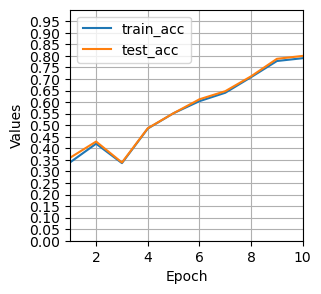

In [82]:
# 开始训练
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = Net()
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.01)

train_steps(
    epochs=10, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device, 
    train_figure=True, 
    resume = False, 
    PATH = './Pytorch_params/weights'
) 

In [83]:
best = torch.load('./Pytorch_params/weights/best.pt')
best['epoch'], best['loss'], best['model_state_dict']

/tmp/ipykernel_32820/198423743.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best = torch.load('./Pytorch_params/weights/best.pt')


(9,
 tensor(0.8000, device='cuda:0'),
 OrderedDict([('network.1.weight',
               tensor([[-0.0241, -0.0069,  0.0088,  ..., -0.0267, -0.0129, -0.0065],
                       [ 0.0302, -0.0323,  0.0237,  ..., -0.0168,  0.0240,  0.0341],
                       [-0.0151,  0.0176, -0.0027,  ...,  0.0083, -0.0131,  0.0065],
                       ...,
                       [ 0.0030,  0.0136, -0.0048,  ..., -0.0145, -0.0219, -0.0337],
                       [-0.0136, -0.0261,  0.0065,  ..., -0.0004,  0.0057,  0.0013],
                       [-0.0356, -0.0046, -0.0026,  ..., -0.0298,  0.0247,  0.0137]],
                      device='cuda:0')),
              ('network.1.bias',
               tensor([ 3.9702e-02,  3.4285e-02,  4.3656e-02, -7.5687e-04,  4.5628e-02,
                       -1.5764e-03,  9.1527e-03,  1.2884e-02,  5.1464e-02,  1.3203e-02,
                        3.2777e-02,  2.3281e-02, -7.0645e-07, -2.0750e-02,  1.0967e-02,
                        1.6538e-02, -3.8702e-02,  

耗时： 70.18707489967346 seconds.


(tensor(1.7867), tensor(0.7317), tensor(0.7402))

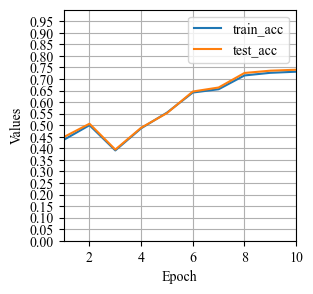

In [98]:
# 再试一次，会不会造成net的parameter的累加，结果表明不会
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = Net()   
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.01)  
    
train_steps(epochs=10, 
            train_dataset=train_dataset, 
            train_iter=train_iter, 
            test_dataset=test_dataset, 
            net=net,                        
            loss_fn=loss_fn, 
            opt=opt, 
            device=device, 
            train_figure=True, 
            resume = False
) 

### 8.7.2. <a id='toc8_7_2_'></a>[自己探索](#toc0_)
#### 8.7.2.1. <a id='toc8_7_2_1_'></a>[lr的影响](#toc0_)

耗时： 69.80070853233337 seconds.


(tensor(1.4991), tensor(0.9673), tensor(0.9614))

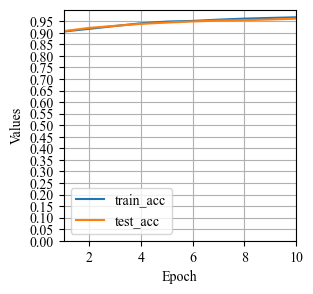

In [99]:
# lr 0.01 -> 0.5
# 结果表明还是会快一点收敛
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = Net()      
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.5)   
   
train_steps(
    epochs=10, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device, 
    train_figure=True
) 

#### 8.7.2.2. <a id='toc8_7_2_2_'></a>[不同模型的效率](#toc0_)

耗时： 87.9712917804718 seconds.


(tensor(1.4962), tensor(0.9704), tensor(0.9643))

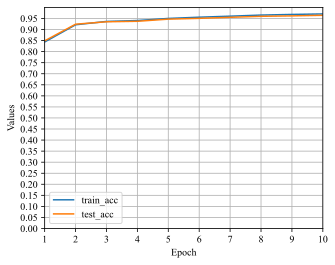

In [119]:
# test_acc一直在92%左右，如何才能提高？
# 使用CNN会好一点吗？
# 我们来试一试：

class Net1(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 1024), nn.ReLU(),
            nn.Linear(1024, 10), nn.Softmax()
        )

    def forward(self, X):
        return self.network(X)
    
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = Net1()  
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.5)   
   
train_steps(
    epochs=10, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device, 
    train_figure=True
) 

耗时： 210.56247329711914 seconds.


(tensor(1.4977), tensor(0.9650), tensor(0.9571))

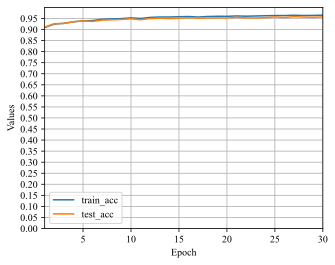

In [120]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 

# 开始训练
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 网络结构
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # self.network = nn.Sequential(nn.Flatten(),
        #                              nn.Linear(28*28, 2**5), nn.ReLU(),
        #                              nn.Linear(2**5, 10), nn.Softmax())
        self.num_hidden = 2**5
        self.layer1 = nn.Flatten()
        self.layer2 = nn.Linear(28*28, self.num_hidden)
        self.layer3 = nn.Linear(self.num_hidden, self.num_hidden)
        self.ac = nn.ReLU()
        # self.ac = nn.Tanh()
        self.dp = nn.Dropout()
        self.bn = nn.BatchNorm1d(self.num_hidden)
        self.layer4 = nn.Linear(self.num_hidden, 10)
        self.layer5 = nn.Softmax()


    def forward(self, X):
        y = self.layer1(X)
        y = self.layer2(y)
        
        for i in range(2):
            y = y + self.dp(self.ac(self.bn(self.layer3(y))))
                   
        y = self.layer4(y)
        y = self.layer5(y)
        return y

net = Net()
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.5)

train_steps(
    epochs=30, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device, 
    train_figure=True
) 

### 8.7.3. <a id='toc8_7_3_'></a>[K折交叉验证](#toc0_)
- 简述：把数据分成K份，分别只取1份做Test_data，（K-1）做Train_data，做K次，计算Test_acc的平均值

In [90]:
def get_k_fold_data(k, i, X, y):
    assert k > 1 # k必须大于1
    fold_size = X.shape[0] // k # 窗口大小：X一维数据长度除以k向下取整数
    print('fold_size: ', fold_size)
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size) # 切片范围 (窗口大小)
        print(idx)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat([X_train, X_part], 0)
            y_train = torch.cat([y_train, y_part], 0)
    return X_train, y_train, X_valid, y_valid

In [85]:
X = torch.arange(15).reshape(5, 3)
y = torch.negative(torch.arange(15).reshape(5, 3))
X, y

(tensor([[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11],
         [12, 13, 14]]),
 tensor([[  0,  -1,  -2],
         [ -3,  -4,  -5],
         [ -6,  -7,  -8],
         [ -9, -10, -11],
         [-12, -13, -14]]))

In [92]:
get_k_fold_data(2, 1, X, y)

fold_size:  2
slice(0, 2, None)
slice(2, 4, None)


(tensor([[0, 1, 2],
         [3, 4, 5]]),
 tensor([[ 0, -1, -2],
         [-3, -4, -5]]),
 tensor([[ 6,  7,  8],
         [ 9, 10, 11]]),
 tensor([[ -6,  -7,  -8],
         [ -9, -10, -11]]))

## 8.8. <a id='toc8_8_'></a>[可视化训练过程](#toc0_)
* 清理上一次
    * figure plt.clf() # 只是清理figure内容
    * figure `plt.colse()` # 关闭（释放）figure
    * axes plt.cla() # 只是清理axes内容
* 绘图plot
* 用jupyter的display来显示
* 保持yupyter上的display直至下一次展示再清理

打印图片耗时： 2.1650073528289795 seconds


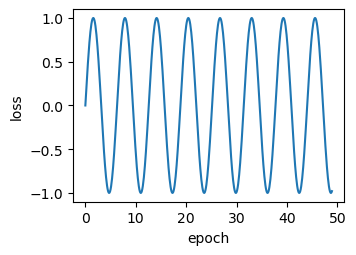

In [78]:
from IPython import display
from matplotlib import pyplot as plt
import torch
import time

def dl_plot(x, y):
    '''再jupyter中持续刷新展示图片'''
    plt.close()                                 # close figure （推荐）
    fig = plt.figure(figsize=(3.5, 2.5))

    plt.plot(x, y)
    plt.xlabel('epoch')
    plt.ylabel('loss')

    # plt.show()                                # 普通展示
    display.display(fig)                        # 在jupyter中展示 （推荐）
    display.clear_output(wait=True)             # 等待 （必须）

start = time.time()
for epoch in range(50):
    x = torch.arange(0, epoch+1, 0.1)
    y = torch.sin(x)
    if epoch % 2 == 0:
        dl_plot(x, y)
stop = time.time()
print(f"打印图片耗时： {stop - start} seconds")

In [87]:
start = time.time()
for epoch in range(10):
    x = torch.arange(0, epoch+1, 0.1)
    y = torch.sin(x)
    # dl_plot(x, y)
    print(f"{epoch+1}/{10}: \t train_loss={x[-1]} \t train_acc={y[-1]}")
    
stop = time.time()
print(f"打印数值耗时： {stop - start} seconds")

1/10: 	 train_loss=0.8999999761581421 	 train_acc=0.7833268642425537
2/10: 	 train_loss=1.899999976158142 	 train_acc=0.9463000893592834
3/10: 	 train_loss=2.9000000953674316 	 train_acc=0.23924924433231354
4/10: 	 train_loss=3.9000000953674316 	 train_acc=-0.6877662539482117
5/10: 	 train_loss=4.900000095367432 	 train_acc=-0.9824525713920593
6/10: 	 train_loss=5.900000095367432 	 train_acc=-0.37387657165527344
7/10: 	 train_loss=6.900000095367432 	 train_acc=0.5784398317337036
8/10: 	 train_loss=7.899999618530273 	 train_acc=0.9989413619041443
9/10: 	 train_loss=8.899999618530273 	 train_acc=0.5010212063789368
10/10: 	 train_loss=9.899999618530273 	 train_acc=-0.4575355648994446
打印数值耗时： 0.0011034011840820312 seconds


# 9. <a id='toc9_'></a>[在 GPU 上训练](#toc0_)
- 要实行运算的Tensor`必须`在同一张GPU卡上：

|操作|函数|
|:-|:-|
|1. 张量传到GPU上 |x_gpu = x`.to`('cuda:0')|
|2. 神经网络传到GPU上|net = net`.to`('cuda:0')|

- CPU和GPU之间数据传输总结：

|对象|方法一|方法二|
|:-|:-|:-|
|模型上GPU：|model.cuda()|model.`to(device)`|
|数据上GPU：|data.cuda()|data.`to(device)`|
|输出下GPU：|output=model(data)|output`.detach().cpu().numpy()`|
||解释：||
||output`.detach()`|将变量output从计算图中分离，使其不具有梯度，不进行反向传播|
||`.cpu()`|将GPU数据转CPU|
||.numpy()|将Tensor转numpy|
||`.item()`|将Tensor转为python数值|

## 9.1. <a id='toc9_1_'></a>[查看GPU配置](#toc0_)
都在`torch.cuda`模块中.

In [91]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [92]:
# 是否有可用的GPU
torch.cuda.is_available()           
# True, False

True

In [93]:
# 可用的GPU数量
torch.cuda.device_count()     
# 1

2

In [94]:
# 返回gpu名字，设备索引默认从0开始；
torch.cuda.get_device_name(0)
# "Tesla T4"

'NVIDIA A100-SXM4-40GB'

In [95]:
# 返回当前设备索引；
torch.cuda.current_device()
# 0, 1, 2

0

In [96]:
def check_device():
    '''判断是否有GPU，并列出GPU的代号/名称'''
    if torch.cuda.is_available(): # 判断是否支持cuda/GPU
        gpu_num = torch.cuda.device_count() # cuda/GPU计数
        if gpu_num == 1:
            print(f"单机单卡: {[torch.cuda.get_device_name(gpu_name) for gpu_name in range(gpu_num)]}")
        else:
            print(f"单机{gpu_num}卡: {[torch.cuda.get_device_name(gpu_name) for gpu_name in range(gpu_num)]}")
    else:
        print(f"只有CPU")
    return None 

check_device()

单机2卡: ['NVIDIA A100-SXM4-40GB', 'NVIDIA A100-SXM4-40GB']


In [97]:
# device = [ 'cpu' if not torch.cuda.is_available() else ]
device = [f'cuda:{i}' for i in range(torch.cuda.device_count())] if torch.cuda.is_available() else ['cpu']
device

['cuda:0', 'cuda:1']

## 9.2. <a id='toc9_2_'></a>[单机单卡（GPU）](#toc0_)
所有的张量必须存在于同一个设备上（同一个CPU或同一个GPU），才能正确计算，否则可能会出现异常错误。  
1. 模型上GPU：model.cuda() 或 model.to(device)   
2. 数据上GPU：data_gpu = data.cuda() 或 data_gpu = data.to(device)   
3. 输出下GPU：output = model(data)  output.detach().cpu().numpy()，

In [18]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [19]:
x = torch.ones((2, 1))
y = torch.ones((2, 1))
x, y, x.device, y.device

(tensor([[1.],
         [1.]]),
 tensor([[1.],
         [1.]]),
 device(type='cpu'),
 device(type='cpu'))

In [20]:
x1 = x.to(device)
y1 = y.to(device)
x1, y1, x1.device, y1.device

(tensor([[1.],
         [1.]], device='cuda:0'),
 tensor([[1.],
         [1.]], device='cuda:0'),
 device(type='cuda', index=0),
 device(type='cuda', index=0))

## 9.3. <a id='toc9_3_'></a>[单机多卡（GPU）](#toc0_)

目前PyTorch的单机多卡训练，主要有两种方式：

|方法|函数|注释|
|:-|:-|:-|
|第一种：|torch.nn.`DataParallel`(module=net, device_ids=[0, 1], output_device=[0])|# 单机两卡|
|第二种：|torch.nn.parallel.`DistributedDataParallel`()|# 单机多卡、多机多卡|


DataParallel (DP) 和 DistributedDataParallel (DDP) 都是用于在多GPU上进行训练的工具，但它们有一些关键的区别：

1. **目标环境：**
   - `DataParallel` 适用于单机多卡的情况，通过将模型复制到每个GPU上，每个GPU计算不同的批次，最后通过梯度累积或平均来更新模型参数。
   - `DistributedDataParallel` 适用于分布式环境，可以在单机或多台机器上的多个GPU上运行，每个GPU计算不同的批次，并通过分布式通信来同步梯度和更新模型参数。

2. **通信方式：**
   - `DataParallel` 使用单个进程内的多个GPU，通信相对较简单，仅涉及到进程内的数据传输。
   - `DistributedDataParallel` 通过分布式通信协议，如NCCL或Gloo，实现跨进程和可能跨机器的通信，因此需要更复杂的设置。

3. **启动方式：**
   - `DataParallel` 只需在模型实例上调用 `nn.DataParallel(model)` 即可。
   - `DistributedDataParallel` 需要在训练脚本中设置分布式环境变量，如`torch.distributed.launch` 或手动设置`os.environ`。

4. **维护性：**
   - `DataParallel` 更容易使用，因为它不涉及复杂的分布式设置。
   - `DistributedDataParallel` 适用于更复杂的分布式场景，但需要更多的设置和管理。

在单机多卡的情况下，如果简单性和易用性是首要考虑的因素，可以使用 DataParallel。在需要更高级的分布式设置时，或者在多机多卡的环境中，DistributedDataParallel 提供了更大的灵活性。

### 9.3.1. <a id='toc9_3_1_'></a>[DP](#toc0_)
- 单机多线程

- 参数详情
```shell
torch.nn.DataParallel(module, device_ids, output_device)  

Parameters
    module (Module) – module to be parallelized                                                 # 神经网络
    device_ids (list of int or torch.device) – CUDA devices (default: all devices)              # 默认使用所用GPU
    output_device (int or torch.device) – device location of output (default: device_ids[0])    # 在cuda:0上进行参数分配、计算、汇总、更新
Variables
    module (Module) – the module to be parallelized
```

- 前提
 
    1. 有一个前提: net模型被复制到cuda:[0, 1, 2等等]上，但是X, y必须提前在cuda:0上，而不能在cuda:1、cuda:2等等上；

    2. 那如果cuda:0有其他人占满了，怎么办？那就需要手动指定其他GPU为cuda:0了：

        - os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"      # 一定一定要放在所有访问显卡的代码之前，否则则无效，给我困扰了好一段时间才发现了。我之前看到有一个说法是放到import os之后并且在import torch之前。

        - os.environ["CUDA_VISIBLE_DEVICES"] = "2, 3"         # 只识别2、3而抛弃了其他GPU，把2当成pytorch逻辑上的cuda:0

In [103]:
import torch 
import torch.nn as nn 
import torch.utils.data as data
import torchvision
import time 

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 数据准备
dbs = './Pytorch_datasets/'
train_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=True, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [

            torchvision.transforms.ToTensor(), 
            #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

test_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=False, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(), 
            #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

# 迭代型数据方式
train_iter = data.DataLoader(dataset=train_dataset, batch_size=128,  shuffle=True)
# test_iter = data.DataLoader(dataset=test_dataset) # test不需要batch训练

# 网络结构
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(28*28, 1024), nn.ReLU(),
            nn.Linear(1024, 10), nn.Softmax()
        )

    def forward(self, X):
        return self.network(X)
    
# 训练过程封装
def train_steps(epochs, train_dataset, train_iter, test_dataset, net, loss_fn, opt, device):
    '''
    参数记录
    epochs = epochs                         # epoch
    train_dataset = train_dataset           # 全部train数据集
    train_iter = train_iter                 # batch之后的train数据集
    test_dataset = test_dataset             # 全部test数据集
    net = net                               # 网络模型
    loss_fn = loss_fn                       # 损失函数
    opt = opt                               # 优化器
    device = device                         # device GPU/CPU
    '''
    print('='*100, '\n', f"Runing on {device}", '\n','='*100)
    train_all_data_gpu = train_dataset.data.to(device)
    train_all_targets_gpu = train_dataset.targets.to(device)
    test_all_data_gpu = test_dataset.data.to(device)
    test_all_targets_gpu = test_dataset.targets.to(device)
    net = nn.DataParallel(module=net)
    # net = nn.DataParallel(module=net, device_ids=[0, 1], output_device=[0]) # 多GPU并行计算，等价于net = nn.DataParallel(module=net)
    net.to(device)

    # 开始迭代
    start = time.time()
    for epoch in range(epochs):
        for batch_record in train_iter:
            X, y = batch_record                 # 分配X, y
            X, y = X.to(device), y.to(device)   # 复制到device（GPU/CPU）上
            # print(X[0])
            # print(X[0].dtype)
            # break
            opt.zero_grad()                     # 默认是累加，此处从新求导
            y_hat = net(X)          # 计算y_hat
            loss = loss_fn(y_hat, y)# 计算loss
            loss.backward()         # 计算梯度
            opt.step()              # 更新网络参数

        net.eval()  # 切换至评估模式
                    # 模型默认是net.train()
                    # 但是net中含有BN、Dropout等，在test时必须固定train时学好的参数，不能被test又改变了
                    # 但net中没有BN、Dropout等时，加不加net.eval()都无所谓

        with torch.no_grad(): # with下内容不进行grad计算，可以节省运算和内存
            train_loss = loss_fn(net(train_all_data_gpu/256), train_all_targets_gpu)
            # print(train_loss)
            train_acc_cmp = net(train_all_data_gpu/256).argmax(axis=1) == train_all_targets_gpu
            train_acc = (train_acc_cmp.sum() / len(train_acc_cmp)) * 100
            # print(train_acc)
            test_acc_cmp = net(test_all_data_gpu/256).argmax(axis=1) == test_all_targets_gpu
            test_acc = (test_acc_cmp.sum() / len(test_acc_cmp)) * 100
            # print(test_acc)
            print(f"epoch {epoch+1}/{epochs}: train_loss={train_loss}, train_acc={train_acc}, test_acc={test_acc}")

    stop = time.time()
    seconds = stop - start
    def convert_seconds(seconds):
        days = seconds // (24 * 3600)
        hours = (seconds % (24 * 3600)) // 3600
        minutes = (seconds % 3600) // 60
        remaining_seconds = seconds % 60
        return days, hours, minutes, remaining_seconds
    days, hours, minutes, remaining_seconds = convert_seconds(seconds)
    print('='*100, '\n', f"Total：{days} d/ {hours} h/ {minutes} m/ {remaining_seconds} s")
    # return (train_loss, train_acc, test_acc)
    return None

# lr 0.01 -> 0.5
# 结果表明还是会快一点收敛
net = Net()  
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.5)   
train_steps(
    epochs=10, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device 
) 

 Runing on cuda:0 
epoch 1/10: train_loss=1.5717055797576904, train_acc=90.85833740234375, test_acc=90.91999816894531
epoch 2/10: train_loss=1.5450035333633423, train_acc=92.63500213623047, test_acc=92.77999877929688
epoch 3/10: train_loss=1.5318394899368286, train_acc=93.75666809082031, test_acc=93.83999633789062
epoch 4/10: train_loss=1.5233505964279175, train_acc=94.5, test_acc=94.18000030517578
epoch 5/10: train_loss=1.5167455673217773, train_acc=95.13500213623047, test_acc=94.83999633789062
epoch 6/10: train_loss=1.5123507976531982, train_acc=95.55833435058594, test_acc=95.25
epoch 7/10: train_loss=1.5058631896972656, train_acc=96.14500427246094, test_acc=95.44000244140625
epoch 8/10: train_loss=1.502568006515503, train_acc=96.41999816894531, test_acc=95.80000305175781
epoch 9/10: train_loss=1.4993404150009155, train_acc=96.69999694824219, test_acc=96.18000030517578
epoch 10/10: train_loss=1.4963492155075073, train_acc=97.02667236328125, test_acc=96.30000305175781
 Total：0.0 d/ 0.

### 9.3.2. <a id='toc9_3_2_'></a>[DDP](#toc0_)
```shell
1. 与 DataParallel 的单进程控制多 GPU 不同，在 distributed 的帮助下，我们只需要编写一份代码，torch 就会自动将其分配给 
 个进程，分别在 n 个 GPU 上运行。
2. 单机多进程
```
```python
详解
torch.nn.parallel.DistributedDataParallel(module, device_ids, output_device)
    
```

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.distributed as dist
import torch.multiprocessing as mp
import os 

def ddp_setup(rank, world_size):
    '''
    Args:
        rank: unique identifier of each process
        world_size: Total number of process
    '''
    os.environ["MASTER_ADDR"] = "localhost"
    os.environ["MASTER_PORT"] = "12357"
    dist.init_process_group(backend='nccl', rank=rank, world_size=world_size)
    torch.cuda.set_device(rank)

#### 9.3.2.1. <a id='toc9_3_2_1_'></a>[在colab上测试可用](#toc0_)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.distributed as dist
import torch.multiprocessing as mp
from torch.multiprocessing import Process
import os

# 定义卷积神经网络模型
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def train(local_rank, world_size):
  
  os.environ["MASTER_PORT"] = "12357"
  os.environ["MASTER_ADDR"] = "localhost"

  # 设置每个进程的GPU
  torch.cuda.set_device(local_rank)
  device = torch.device("cuda", local_rank)

  # 初始化进程组
  dist.init_process_group(backend='nccl', world_size=world_size, rank=local_rank)

  # 数据预处理和加载
  transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
  trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

  # 使用DistributedSampler来对数据进行分布式采样
  train_sampler = torch.utils.data.distributed.DistributedSampler(trainset)
  trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=False, sampler=train_sampler)

  # 创建CNN模型实例，并放入多个GPU上
  model = CNN().to(device)
  model = nn.parallel.DistributedDataParallel(model, device_ids=[local_rank])

  # 定义损失函数和优化器
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=0.001)

  # 训练模型
  num_epochs = 5

  for epoch in range(num_epochs):
      model.train()
      running_loss = 0.0

      for i, data in enumerate(trainloader, 0):
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)
          optimizer.zero_grad()

          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()

      print(f"Local Rank {local_rank}, Epoch {epoch + 1}/{num_epochs}, Training Loss: {running_loss / len(trainloader):.4f}")

  dist.destroy_process_group()

# Process格式：
if __name__ == "__main__":
  # size = torch.cuda.device_count()
  size = 10
  processes = []
  world_size = 1
  for rank in range(size):
      p = Process(target=train, args=(rank, world_size))
      p.start()
      processes.append(p)

  for p in processes:
      p.join()


## 9.4. <a id='toc9_4_'></a>[多机多卡（GPU）- 分布式训练](#toc0_)
```shell
目前PyTorch的多机多卡训练，主要有两种方式：   
    1. torch.nn.parallel.DistributedDataParallel()
```

# 10. <a id='toc10_'></a>[模型和参数的保存与加载](#toc0_)

* torch.save( 张量名, 位置 )

* 张量名称 = torch.load( 位置 )

## 10.1. <a id='toc10_1_'></a>[加载和保存-张量](#toc0_)

In [40]:
import torch 

x = torch.ones((3, 5))
x

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [41]:
# torch.save()
torch.save(x, './Pytorch_params/x-file')

In [42]:
# torch.load()
x1 = torch.load('./Pytorch_params/x-file')
x1

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

## 10.2. <a id='toc10_2_'></a>[加载和保存-模型参数](#toc0_)
保存单个权重向量（或其他张量）确实有用， 但是如果我们想保存整个模型，并在以后加载它们， 单独保存每个向量则会变得很麻烦。 毕竟，我们可能有数百个参数散布在各处。 因此，深度学习框架提供了内置函数来保存和加载整个网络。 需要注意的一个重要细节是，这将保存模型的参数而不是保存整个模型。 例如，如果我们有一个3层多层感知机，我们需要单独指定架构。 因为模型本身可以包含任意代码，所以模型本身难以序列化。 因此，为了恢复模型，我们需要用代码生成架构， 然后从磁盘加载参数。

1. save和load函数可用于张量对象的文件读写。
2. 我们可以通过参数字典保存和加载网络的全部参数。
3. 保存架构必须在代码中完成，而不是在参数中完成。

In [36]:
import torch 
import torch.nn.functional as F
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(20, 256)
        self.output = nn.Linear(256, 10)

    def forward(self, x):
        return self.output(F.relu(self.hidden(x)))

net = MLP()
X = torch.randn(size=(2, 20))
Y = net(X)

In [39]:
# torch.save()
# 接下来，我们将模型的参数存储在一个叫做“mlp.params”的文件中。
torch.save(net.state_dict(), './Pytorch_params/mlp.params')

In [40]:
# torch.load()
# 为了恢复模型，我们实例化了原始多层感知机模型的一个备份。 
# 这里我们不需要随机初始化模型参数，而是直接读取文件中存储的参数。
net_params = torch.load('./Pytorch_params/mlp.params')
clone = MLP()

clone.load_state_dict(net_params)
clone.eval()

MLP(
  (hidden): Linear(in_features=20, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

- 完整的代码

In [48]:
# 保存
torch.save(
    {
        'epoch': '10', 
        'model_state_dict': net.state_dict(), 
        # 'opt_state_dict': opt.state_dict(), 
        'loss': 'loss'
    }, 
    './Pytorch_params/test.pt'
)

# 重载
check_point = torch.load('./Pytorch_params/test.pt')

check_point['model_state_dict']
check_point['loss']
check_point['epoch']

'10'

# 11. <a id='toc11_'></a>[神经网络类型](#toc0_)

## 11.1. <a id='toc11_1_'></a>[CNN](#toc0_)

CBAPD: 卷积，批量归一化，激活，池化，丢弃

卷积层就是特征提取，随后将特征传入FC（全连接层）；

卷积本身是线性的，但是经过激活函数后可以编程非线性的。



### 11.1.1. <a id='toc11_1_1_'></a>[概述](#toc0_)

- 为什么要用CNN？
  - 利用MLP处理图片像素矩阵，太占内存
  - 解决办法，顶层设计一个新的算法具备如下特点：
    - 局部性
    - 平移不变性
  - 刚好来自“信号处理中的卷积”符合此类特征：
    - 局部性 （固定/通用的卷积核）
    - 平移不变性 （特征图在整个图片的位置不固定，可以平移）

### 11.1.2. <a id='toc11_1_2_'></a>[简单CNN](#toc0_)

#### 11.1.2.1. <a id='toc11_1_2_1_'></a>[从头实现](#toc0_)

##### 11.1.2.1.1. <a id='toc11_1_2_1_1_'></a>[卷积计算过程](#toc0_)

 <img src="./Pytorch_Pictures/convolution/conv.gif" width = "500" height = "300" alt="图片名称" align=center />

- 内积后求和

- 输出大小：(Xh - Kh + 1, Xw - Kw + 1)

In [24]:
import torch 

def cov2d(X, kernel)-> torch.Tensor:
    '''
    手写二维convolution计算过程 (二维互关运算)

    Args: 
        X (2d): 输入图片像素矩阵
        kernel (int): 卷积核

    Return: 
        Y: 卷积计算结果
    '''

    h, w = kernel.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))   # 输出形状，暂时用0填充
    # print(Y)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * kernel).sum()      # X取子集 * kernel 最后在求和
    return Y

In [14]:
X = torch.arange(9, dtype=torch.float32).reshape(3, 3)
X

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

In [15]:
kernel = torch.arange(4, dtype=torch.float32).reshape(2, 2)
kernel

tensor([[0., 1.],
        [2., 3.]])

In [25]:
cov2d(X=X, kernel=kernel)

tensor([[19., 25.],
        [37., 43.]])

##### 11.1.2.1.2. <a id='toc11_1_2_1_2_'></a>[从头卷积层](#toc0_)
- 卷积层对输入和卷积核进行互关运算，并添加偏置；
- 所以卷积层中两个被训练的参数是卷积核与偏置。

In [30]:
import torch.nn as nn

class Cov2d(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, X):
        return cov2d(X, self.weight) + self.bias                   # 将conv2d计算添加进来

In [33]:
cov2d1 = Cov2d(kernel_size=(2, 2))
cov2d1(X=X)

tensor([[ 3.9126,  5.9625],
        [10.0622, 12.1121]], grad_fn=<AddBackward0>)

#### 11.1.2.2. <a id='toc11_1_2_2_'></a>[简洁实现](#toc0_)

In [48]:
import torch 
import torch.nn as nn 

conv2d = nn.Conv2d(
    in_channels = 1, 
    out_channels = 1, 
    kernel_size = (2, 2), 
    bias = True
)

# nn.Conv2d的输入和输出都是：批量大小、通道数、高度和宽度
conv2d(X.reshape((1,1,3,3)))

tensor([[[[-0.0601,  0.0402],
          [ 0.2407,  0.3410]]]], grad_fn=<ConvolutionBackward0>)

#### 11.1.2.3. <a id='toc11_1_2_3_'></a>[填充和步幅](#toc0_)

- 填充 (padding)

  - 输出大小：(Xh - Kh + Ph + 1, Xw - Kw + Pw + 1)

  - 一般情况下Kh和Kw为奇数(1,3,5,7) 可得 (输入和输出形状一致)：

    - Ph设置为：Kh - 1

    - Pw设置为：Kw - 1

  - padding填写时写一半 (输入和输出形状一致)：
    - padding = (Ph/2, Pw/2)

In [71]:
import torch 
import torch.nn as nn 

conv2d1 = nn.Conv2d(
    in_channels = 1, 
    out_channels = 1, 
    kernel_size = (3, 3), 
    bias = True, 
    padding = (1, 1),           # ((3 - 1)/2, (3 - 1)/2)
    stride = 1
)

# nn.Conv2d的输入和输出都是：批量大小、通道数、高度和宽度
X = torch.arange(9, dtype=torch.float32).reshape(3, 3)
Y = conv2d1(X.reshape((1,1,3,3)))
X, X.reshape((1,1,3,3)).shape, Y, Y.shape

(tensor([[0., 1., 2.],
         [3., 4., 5.],
         [6., 7., 8.]]),
 torch.Size([1, 1, 3, 3]),
 tensor([[[[-0.3299, -0.8171,  0.1535],
           [-1.3427, -2.3634, -0.2771],
           [-1.2391, -2.3088, -2.5213]]]], grad_fn=<ConvolutionBackward0>),
 torch.Size([1, 1, 3, 3]))

- 步幅 (stride)

  - 输出大小为：( (Xh - Kh + Ph + Sh)/Sh, (Xw - Kw + Pw + Sw)/Sw)

In [77]:
import torch 
import torch.nn as nn 

conv2d1 = nn.Conv2d(
    in_channels = 1, 
    out_channels = 1, 
    kernel_size = (3, 3), 
    bias = True, 
    padding = (1, 1),           # ((3 - 1)/2, (3 - 1)/2)
    stride = 2                  # (8 - 3 + 1 + 2 )/2 = 4
)

# nn.Conv2d的输入和输出都是：批量大小、通道数、高度和宽度
X = torch.arange(64, dtype=torch.float32).reshape(8, 8)
Y = conv2d1(X.reshape((1,1,8,8)))
X, X.reshape((1,1,8,8)).shape, Y, Y.shape

(tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11., 12., 13., 14., 15.],
         [16., 17., 18., 19., 20., 21., 22., 23.],
         [24., 25., 26., 27., 28., 29., 30., 31.],
         [32., 33., 34., 35., 36., 37., 38., 39.],
         [40., 41., 42., 43., 44., 45., 46., 47.],
         [48., 49., 50., 51., 52., 53., 54., 55.],
         [56., 57., 58., 59., 60., 61., 62., 63.]]),
 torch.Size([1, 1, 8, 8]),
 tensor([[[[  0.4318,  -2.9064,  -3.9838,  -5.0611],
           [ -3.0204, -13.3529, -14.7837, -16.2145],
           [ -6.1843, -24.7991, -26.2299, -27.6607],
           [ -9.3481, -36.2454, -37.6762, -39.1069]]]],
        grad_fn=<ConvolutionBackward0>),
 torch.Size([1, 1, 4, 4]))

#### 11.1.2.4. <a id='toc11_1_2_4_'></a>[多输入和多输出通道](#toc0_)

In [78]:
import torch 
import torch.nn as nn 

conv2d1 = nn.Conv2d(
    in_channels = 1, 
    out_channels = 3, 
    kernel_size = (3, 3), 
    bias = True, 
    padding = (1, 1),           # ((3 - 1)/2, (3 - 1)/2)
    stride = 2                  # (8 - 3 + 1 + 2 )/2 = 4
)

# nn.Conv2d的输入和输出都是：批量大小、通道数、高度和宽度
X = torch.arange(64, dtype=torch.float32).reshape(8, 8)
Y = conv2d1(X.reshape((1,1,8,8)))
X, X.reshape((1,1,8,8)).shape, Y, Y.shape

(tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11., 12., 13., 14., 15.],
         [16., 17., 18., 19., 20., 21., 22., 23.],
         [24., 25., 26., 27., 28., 29., 30., 31.],
         [32., 33., 34., 35., 36., 37., 38., 39.],
         [40., 41., 42., 43., 44., 45., 46., 47.],
         [48., 49., 50., 51., 52., 53., 54., 55.],
         [56., 57., 58., 59., 60., 61., 62., 63.]]),
 torch.Size([1, 1, 8, 8]),
 tensor([[[[ -3.1349,  -3.0231,  -4.5567,  -6.0904],
           [-15.0264, -16.0034, -17.6924, -19.3814],
           [-26.5322, -29.5155, -31.2045, -32.8935],
           [-38.0381, -43.0276, -44.7166, -46.4056]],
 
          [[  1.8246,   4.3984,   5.4487,   6.4991],
           [  0.2586,  11.0692,  11.8181,  12.5670],
           [ -1.3924,  17.0604,  17.8093,  18.5582],
           [ -3.0434,  23.0516,  23.8005,  24.5494]],
 
          [[ -3.0677,  -2.4633,  -2.2421,  -2.0210],
           [-12.1480,  -5.0198,  -5.5860,  -6.1523],
           [-24.6482,  -9.5

#### 11.1.2.5. <a id='toc11_1_2_5_'></a>[Pooling (汇聚层)](#toc0_)

- pooling层不包含参数


##### 11.1.2.5.1. <a id='toc11_1_2_5_1_'></a>[平均Pooling](#toc0_)

In [82]:
import torch 
import torch.nn as nn 

nn.AvgPool2d(
    kernel_size = (2, 2), 
    padding = 0, 
    stride = 1
)

AvgPool2d(kernel_size=(2, 2), stride=1, padding=0)

##### 11.1.2.5.2. <a id='toc11_1_2_5_2_'></a>[最大Pooling](#toc0_)

In [81]:
import torch 
import torch.nn as nn 

nn.MaxPool2d(
    kernel_size = (2, 2), 
    padding = 0, 
    stride = 1
)

MaxPool2d(kernel_size=(2, 2), stride=1, padding=0, dilation=1, ceil_mode=False)

### 11.1.3. <a id='toc11_1_3_'></a>[LeNet](#toc0_)

- 最早被Yann LeCun用来识别手写数字的算法

<img src="./Pytorch_Pictures/convolution/LeNet.jpg" width = "700" height = "300" alt="图片名称" align=center >

In [98]:
import torch 
import torch.nn as nn 

class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2), 
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5), 
            nn.Sigmoid(), 
            nn.AvgPool2d(kernel_size=2, stride=2), 
            nn.Flatten(), 
            nn.Linear(16 * 5 * 5, 120), 
            nn.Sigmoid(), 
            nn.Linear(120, 84), 
            nn.Sigmoid(), 
            nn.Linear(84, 10)
        )
    
    def forward(self, X):
        return self.net(X)

lenet = LeNet()

X = torch.arange(28*28, dtype=torch.float32).reshape((1, 1, 28, 28))
# X = torch.rand(size=(1,1,28,28), dtype=torch.float32)
# X.shape
lenet(X)

tensor([[-0.1736, -0.2433,  0.1071,  0.7213, -0.1392,  0.1065,  0.1411,  0.4583,
          0.1942,  0.0054]], grad_fn=<AddmmBackward0>)

### 11.1.4. <a id='toc11_1_4_'></a>[AlexNet](#toc0_)

- 第一个在大规模视觉比赛 (ImageNet) 中战胜传统给算法 (如支持向量机 supportvectormachines) 的**大型神经网络**

- 证明算法学习的特征可以超越手动设计的特征

<img src="./Pytorch_Pictures/convolution/AlexNet.jpg" width = "500" height = "700" alt="图片名称" align=center >  

- LeNet VS AlexNet：

<img src="./Pytorch_Pictures/convolution/LeNetVSAlexNet.jpg" width = "1000" height = "300" alt="图片名称" align=center >

In [102]:
from torchvision.models import AlexNet

alexnet = AlexNet()
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### 11.1.5. <a id='toc11_1_5_'></a>[VGG](#toc0_)

- 利用重复的神经网络块

  - 卷积层，如Conv2d()
  - 非线性激活，如nn.Relu()
  - 汇聚层，如nn.MaxPooling()

<img src="./Pytorch_Pictures/convolution/VGG.jpg" width = "500" height = "500" alt="图片名称" align=center >  

- 模块设计

In [121]:
def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

conv_arch = (
    (1, 64), 
    (1, 128), 
    (2, 256), 
    (2, 512), 
    (2, 512)
)

def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    # 卷积部分
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels
        
    return nn.Sequential(
        *conv_blks, 
        nn.Flatten(), 
        # 全连接部分
        nn.Linear(out_channels*7*7, 4096), 
        nn.ReLU(), 
        nn.Dropout(p=0.5), 
        nn.Linear(4096, 4096), 
        nn.ReLU(), 
        nn.Dropout(p=0.5), 
        nn.Linear(4096, 10)
    )

net = vgg(conv_arch)
net

Sequential(
  (0): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (3): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (4):

- vgg11

In [113]:
from torchvision.models import vgg11

vgg = vgg11()
vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

### 11.1.6. <a id='toc11_1_6_'></a>[NiN](#toc0_)

- 使用1 x 1卷积层来替代全连接层

### 11.1.7. <a id='toc11_1_7_'></a>[GoogLeNet](#toc0_)

- 2014年的ImageNet挑战赛中，GoogLeNet大放异彩；

- 解决了到底选多大的卷积核的问题？结论是：使用不同大小的卷积核组合更加有利。

### 11.1.8. <a id='toc11_1_8_'></a>[批量规范化](#toc0_)

- batch normalization

In [ ]:
nn.BatchNorm2d()

### 11.1.9. <a id='toc11_1_9_'></a>[ResNet](#toc0_)
```shell
如果，CNN只需要弄懂一个神经网络模型的话，那就是ResNet。
```

#### 11.1.9.1. <a id='toc11_1_9_1_'></a>[从头实现](#toc0_)

In [99]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 

class MyResNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(), 
            nn.LSTM(), 
            nn.ReLU()
        )

    def forward(self, X):
        return self.net(X)

In [124]:
from torchvision.models import resnet34 

resnet = resnet34()
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## 11.2. <a id='toc11_2_'></a>[序列数据](#toc0_)
### 11.2.1. <a id='toc11_2_1_'></a>[什么是序列](#toc0_)

在深度学习中，**序列**是一段具有连续关系的数据，通常带有时间先后顺序。例如，文本、语音、股票价格、气温、DNA序列等都可以被视为序列数据。为了处理不定长的数据，我们常常使用循环神经网络（RNN）来处理序列信息。总之，序列数据在许多领域中都有广泛的应用，包括自然语言处理、时间序列分析、音频处理和图像处理等。

### 11.2.2. <a id='toc11_2_2_'></a>[语言模型](#toc0_)

语言模型 (language model) 是定义在单词序列上的概率模型，可以用来计算一个句子或一段文字的概率。

### 11.2.3. <a id='toc11_2_3_'></a>[文本预处理](#toc0_)
* token：最小单位（字符/单词/词组）
* vocab：（token：indice）对照（查询）列表
* cropus：token转化为indice后的文本

#### 11.2.3.1. <a id='toc11_2_3_1_'></a>[下载《Time machine》并读取数据](#toc0_)
首先，我们从H.G.Well的[时光机器](https://www.gutenberg.org/ebooks/35)中加载文本。
这是一个相当小的语料库，只有30000多个单词，但足够我们小试牛刀，
而现实中的文档集合可能会包含数十亿个单词。
下面的函数 (**将数据集读取到由多条文本行组成的列表中**)，其中每条文本行都是一个字符串。
为简单起见，我们在这里忽略了标点符号和字母大写。

In [2]:
import collections
import re
from d2l import torch as d2l

#@save
# 下载到../data/timemachine.txt
d2l.DATA_HUB['time_machine'] = (d2l.DATA_URL + 'timemachine.txt', '090b5e7e70c295757f55df93cb0a180b9691891a')

def read_time_machine():  #@save
    """将时间机器数据集加载到文本行的列表中"""
    with open(d2l.download('time_machine'), 'r') as f:
        lines = f.readlines()
    return [re.sub('[^A-Za-z]+', ' ', line).strip().lower() for line in lines]

lines = read_time_machine()
print(f'# 文本总行数: {len(lines)}')
print(lines[0])
print(lines[1]) # 空的
print(lines[10])

# 文本总行数: 3221
the time machine by h g wells

twinkled and his usually pale face was flushed and animated the


#### 11.2.3.2. <a id='toc11_2_3_2_'></a>[词元化（Token）](#toc0_)
* 按照char/word等拆分成列表格式

In [3]:
# 按照word
def tokenize(lines, token='word'):  #@save
    """将文本行拆分为单词或字符词元"""
    if token == 'word':
        return [line.split() for line in lines]
    elif token == 'char':
        return [list(line) for line in lines]
    else:
        print('错误：未知词元类型：' + token)

tokens = tokenize(lines)
for i in range(11):
    print(tokens[i])

['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
[]
[]
[]
[]
['i']
[]
[]
['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him']
['was', 'expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'grey', 'eyes', 'shone', 'and']
['twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the']


#### 11.2.3.3. <a id='toc11_2_3_3_'></a>[词表（vocab）](#toc0_)
* 构建(token：索引)查询元组
* 并将文本的token替换成索引

In [4]:
class Vocab:  #@save
    """文本词表"""
    def __init__(self, tokens=None, min_freq=0, reserved_tokens=None):
        if tokens is None:
            tokens = []
        if reserved_tokens is None:
            reserved_tokens = []
        # 按出现频率排序
        counter = count_corpus(tokens)
        self._token_freqs = sorted(counter.items(), key=lambda x: x[1],
                                   reverse=True)
        # 未知词元的索引为0
        self.idx_to_token = ['<unk>'] + reserved_tokens
        self.token_to_idx = {token: idx
                             for idx, token in enumerate(self.idx_to_token)}
        for token, freq in self._token_freqs:
            if freq < min_freq:
                break
            if token not in self.token_to_idx:
                self.idx_to_token.append(token)
                self.token_to_idx[token] = len(self.idx_to_token) - 1

    def __len__(self):
        return len(self.idx_to_token)

    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]

    def to_tokens(self, indices):
        if not isinstance(indices, (list, tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[index] for index in indices]

    @property
    def unk(self):  # 未知词元的索引为0
        return 0

    @property
    def token_freqs(self):
        return self._token_freqs

def count_corpus(tokens):  #@save
    """统计词元的频率"""
    # 这里的tokens是1D列表或2D列表
    if len(tokens) == 0 or isinstance(tokens[0], list):
        # 将词元列表展平成一个列表
        tokens = [token for line in tokens for token in line]
    return collections.Counter(tokens)

vocab = Vocab(tokens)
print('vocab:\t', list(vocab.token_to_idx.items())[:10])

for i in [0, 10]:
    print('文本:', tokens[i])
    print('索引:', vocab[tokens[i]])

vocab:	 [('<unk>', 0), ('the', 1), ('i', 2), ('and', 3), ('of', 4), ('a', 5), ('to', 6), ('was', 7), ('in', 8), ('that', 9)]
文本: ['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
索引: [1, 19, 50, 40, 2183, 2184, 400]
文本: ['twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the']
索引: [2186, 3, 25, 1044, 362, 113, 7, 1421, 3, 1045, 1]


#### 11.2.3.4. <a id='toc11_2_3_4_'></a>[整合所有功能](#toc0_)
* 读取数据
* 分割成token
* 并构建(token, indice)查询表并替换token成indice

In [5]:
# 按照char进行词元化 

def load_corpus_time_machine(max_tokens=-1):  #@save
    """返回时光机器数据集的词元索引列表和词表"""
    lines = read_time_machine()
    tokens = tokenize(lines, 'char')
    vocab = Vocab(tokens)
    # 因为时光机器数据集中的每个文本行不一定是一个句子或一个段落，
    # 所以将所有文本行展平到一个列表中
    corpus = [vocab[token] for line in tokens for token in line]
    if max_tokens > 0:
        corpus = corpus[:max_tokens]
    return corpus, vocab

corpus, vocab = load_corpus_time_machine()
len(corpus), len(vocab)

(170580, 28)

### 11.2.4. <a id='toc11_2_4_'></a>[语言模型数据集](#toc0_)
#### 11.2.4.1. <a id='toc11_2_4_1_'></a>[顺序采样](#toc0_)

- 顺序采样的

In [6]:
def seq_data_iter_sequential(corpus, batch_size, num_steps):  #@save
    """使用顺序分区生成一个小批量子序列"""
    # 从随机偏移量开始划分序列
    offset = random.randint(0, num_steps)
    num_tokens = ((len(corpus) - offset - 1) // batch_size) * batch_size
    Xs = torch.tensor(corpus[offset: offset + num_tokens])
    Ys = torch.tensor(corpus[offset + 1: offset + 1 + num_tokens])
    Xs, Ys = Xs.reshape(batch_size, -1), Ys.reshape(batch_size, -1)
    num_batches = Xs.shape[1] // num_steps
    
    for i in range(0, num_steps * num_batches, num_steps):
        X = Xs[:, i: i + num_steps]
        Y = Ys[:, i: i + num_steps]
        yield X, Y

In [34]:
# for X, Y in seq_data_iter_sequential(my_seq, batch_size=2, num_steps=5):
#     print('X: ', X, '\nY:', Y)

#### 11.2.4.2. <a id='toc11_2_4_2_'></a>[随机采样](#toc0_)

- 随机采样

In [7]:
import random

def seq_data_iter_random(corpus, batch_size, num_steps):  #@save
    """使用随机抽样生成一个小批量子序列"""
    # 从随机偏移量开始对序列进行分区，随机范围包括num_steps-1
    corpus = corpus[random.randint(0, num_steps - 1):]
    # 减去1，是因为我们需要考虑标签
    num_subseqs = (len(corpus) - 1) // num_steps
    # 长度为num_steps的子序列的起始索引
    initial_indices = list(range(0, num_subseqs * num_steps, num_steps))
    # 在随机抽样的迭代过程中，
    # 来自两个相邻的、随机的、小批量中的子序列不一定在原始序列上相邻
    random.shuffle(initial_indices)

    def data(pos):
        # 返回从pos位置开始的长度为num_steps的序列
        return corpus[pos: pos + num_steps]

    num_batches = num_subseqs // batch_size
    for i in range(0, batch_size * num_batches, batch_size):
        # 在这里，initial_indices包含子序列的随机起始索引
        initial_indices_per_batch = initial_indices[i: i + batch_size]
        X = [data(j) for j in initial_indices_per_batch]
        Y = [data(j + 1) for j in initial_indices_per_batch]
        yield torch.tensor(X), torch.tensor(Y)

In [36]:
# my_seq = list(range(35))
# for X, Y in seq_data_iter_random(my_seq, batch_size=2, num_steps=5):
#     print('X: ', X, '\nY:', Y)

#### 11.2.4.3. <a id='toc11_2_4_3_'></a>[包装](#toc0_)

In [9]:
class SeqDataLoader:  #@save
    """加载序列数据的迭代器"""
    def __init__(self, batch_size, num_steps, use_random_iter, max_tokens):
        if use_random_iter:
            # self.data_iter_fn = d2l.seq_data_iter_random
            self.data_iter_fn = seq_data_iter_random
        else:
            # self.data_iter_fn = d2l.seq_data_iter_sequential
            self.data_iter_fn = seq_data_iter_sequential
        # self.corpus, self.vocab = d2l.load_corpus_time_machine(max_tokens)
        self.corpus, self.vocab = load_corpus_time_machine(max_tokens)
        self.batch_size, self.num_steps = batch_size, num_steps

    def __iter__(self):
        return self.data_iter_fn(self.corpus, self.batch_size, self.num_steps)

In [10]:
def load_data_time_machine(
        batch_size, num_steps, 
        use_random_iter=False, 
        max_tokens=10000
    ):
    """
    返回时光机器数据集的迭代器和词表
    """
    data_iter = SeqDataLoader(
        batch_size, num_steps, use_random_iter, max_tokens
    )
    
    return data_iter, data_iter.vocab

## 11.3. <a id='toc11_3_'></a>[RNN](#toc0_)
* 可以处理有顺序的数据

### 11.3.1. <a id='toc11_3_1_'></a>[RNN-循环神经网络原理](#toc0_)
* 结构：
    * 有一层（或多层）隐藏结构；
    * 当前隐藏结构由上一侧隐藏结构和当前输入决定
    * 依次类推

<img src="./Pytorch_Pictures/RNN//RNN.jpg" width = "500" height = "300" alt="图片名称" align=center />

更新隐藏状态：      
$\mathbf{h}_t=\phi(\mathbf{W}_{hh}\mathbf{h}_{t-1}+\mathbf{W}_{hx}\mathbf{x}_{t-1}+\mathbf{b}_h)$  
输出：             
$\mathbf{o}_t=\phi(\mathbf{W}_\textit{ho}\mathbf{h}_t+\mathbf{b}_o)$

#### 11.3.1.1. <a id='toc11_3_1_1_'></a>[从头实现网络](#toc0_)

In [11]:
# 网络结构
import torch 
import torch.nn as nn
import torch.nn.functional as F

# 初始化模型
def get_params(vocab_size, num_hiddens, device):
    num_inputs = num_outputs = vocab_size

    def normal(shape):
        return torch.randn(size=shape, device=device) * 0.01

    # 隐藏层参数
    W_xh = normal((num_inputs, num_hiddens))
    W_hh = normal((num_hiddens, num_hiddens))
    b_h = torch.zeros(num_hiddens, device=device)
    # 输出层参数
    W_hq = normal((num_hiddens, num_outputs))
    b_q = torch.zeros(num_outputs, device=device)
    # 附加梯度
    params = [W_xh, W_hh, b_h, W_hq, b_q]
    for param in params:
        param.requires_grad_(True)
    return params

def init_rnn_state(batch_size, num_hiddens, device):                        # 初始化第一个隐变量的值
    return (torch.zeros((batch_size, num_hiddens), device=device), )

def rnn(inputs, state, params):
    # inputs的形状：(时间步数量，批量大小，词表大小)
    W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []
    # X的形状：(批量大小，词表大小)
    for X in inputs:
        H = torch.tanh(torch.mm(X, W_xh) + torch.mm(H, W_hh) + b_h)         # 隐藏变量
        Y = torch.mm(H, W_hq) + b_q                                         # 输出
        outputs.append(Y)
    return torch.cat(outputs, dim=0), (H,)

class RNNModelScratch: #@save
    """从零开始实现的循环神经网络模型"""
    def __init__(self, vocab_size, num_hiddens, device,
                 get_params, init_state, forward_fn):
        self.vocab_size, self.num_hiddens = vocab_size, num_hiddens
        self.params = get_params(vocab_size, num_hiddens, device)
        self.init_state, self.forward_fn = init_state, forward_fn

    def __call__(self, X, state):
        X = F.one_hot(X.T, self.vocab_size).type(torch.float32)
        return self.forward_fn(X, state, self.params)

    def begin_state(self, batch_size, device):
        return self.init_state(batch_size, self.num_hiddens, device)
    
# 测试一下
X = torch.arange(10).reshape((2, 5))
F.one_hot(X.T, 28).shape

num_hiddens = 512
net = RNNModelScratch(
    len(vocab), 
    num_hiddens, 
    d2l.try_gpu(), 
    get_params,
    init_rnn_state, 
    rnn
)

state = net.begin_state(X.shape[0], d2l.try_gpu())
Y, new_state = net(X.to(d2l.try_gpu()), state)
Y.shape, len(new_state), new_state[0].shape

(torch.Size([10, 28]), 1, torch.Size([2, 512]))

#### 11.3.1.2. <a id='toc11_3_1_2_'></a>[简洁实现](#toc0_)

In [12]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 

class RNNModel(nn.Module):
    """循环神经网络模型"""
    def __init__(self, rnn_layer, vocab_size, **kwargs):
        super(RNNModel, self).__init__(**kwargs)
        self.rnn = rnn_layer
        self.vocab_size = vocab_size
        self.num_hiddens = self.rnn.hidden_size
        # 如果RNN是双向的（之后将介绍），num_directions应该是2，否则应该是1
        if not self.rnn.bidirectional:
            self.num_directions = 1
            self.linear = nn.Linear(self.num_hiddens, self.vocab_size)
        else:
            self.num_directions = 2
            self.linear = nn.Linear(self.num_hiddens * 2, self.vocab_size)

    def forward(self, inputs, state):
        X = F.one_hot(inputs.T.long(), self.vocab_size)
        X = X.to(torch.float32)
        Y, state = self.rnn(X, state)
        # 全连接层首先将Y的形状改为(时间步数*批量大小,隐藏单元数)
        # 它的输出形状是(时间步数*批量大小,词表大小)。
        output = self.linear(Y.reshape((-1, Y.shape[-1])))
        return output, state

    def begin_state(self, device, batch_size=1):
        if not isinstance(self.rnn, nn.LSTM):
            # nn.GRU以张量作为隐状态
            return  torch.zeros((self.num_directions * self.rnn.num_layers,
                                 batch_size, self.num_hiddens),
                                device=device)
        else:
            # nn.LSTM以元组作为隐状态
            return (torch.zeros((
                self.num_directions * self.rnn.num_layers,
                batch_size, self.num_hiddens), device=device),
                    torch.zeros((
                        self.num_directions * self.rnn.num_layers,
                        batch_size, self.num_hiddens), 
                        device=device))

batch_size, num_steps, num_hiddens = 32, 35, 512
rnn_layer = nn.RNN(len(vocab), num_hiddens)
# 我们(**使用张量来初始化隐状态**)，它的形状是（隐藏层数，批量大小，隐藏单元数）。
state = torch.zeros((1, batch_size, num_hiddens))
state.shape
# [**通过一个隐状态和一个输入，我们就可以用更新后的隐状态计算输出。**]
# 需要强调的是，`rnn_layer`的“输出”（`Y`）不涉及输出层的计算：
# 它是指每个时间步的隐状态，这些隐状态可以用作后续输出层的输入。
X = torch.rand(size=(num_steps, batch_size, len(vocab)))
Y, state_new = rnn_layer(X, state)
Y.shape, state_new.shape

device = d2l.try_gpu()
net = RNNModel(rnn_layer, vocab_size=len(vocab))
net = net.to(device)
net

RNNModel(
  (rnn): RNN(28, 512)
  (linear): Linear(in_features=512, out_features=28, bias=True)
)

#### 11.3.1.3. <a id='toc11_3_1_3_'></a>[训练和预测](#toc0_)

In [21]:
# 预测
def predict_ch8(prefix, num_preds, net, vocab, device):  #@save
    """在prefix后面生成新字符"""
    state = net.begin_state(batch_size=1, device=device)
    outputs = [vocab[prefix[0]]]
    get_input = lambda: torch.tensor([outputs[-1]], device=device).reshape((1, 1))
    for y in prefix[1:]:  # 预热期
        _, state = net(get_input(), state)
        outputs.append(vocab[y])
    for _ in range(num_preds):  # 预测num_preds步
        y, state = net(get_input(), state)
        outputs.append(int(y.argmax(dim=1).reshape(1)))
    return ''.join([vocab.idx_to_token[i] for i in outputs])

# 测试以下
predict_ch8('time traveller ', 10, net, vocab, d2l.try_gpu())

'time traveller lcjt cjt c'

In [22]:
# 梯度剪裁
def grad_clipping(net, theta):  #@save
    """裁剪梯度"""
    if isinstance(net, nn.Module):
        params = [p for p in net.parameters() if p.requires_grad]
    else:
        params = net.params
    norm = torch.sqrt(sum(torch.sum((p.grad ** 2)) for p in params))
    if norm > theta:
        for param in params:
            param.grad[:] *= theta / norm

困惑度 1.0, 36068.3 词元/秒 cpu
time travelleryou can show black is white by argument said filby
travellerywi can anowhs astoun thives sat ancarauina soroun


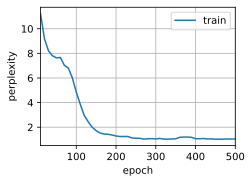

In [23]:
# 训练
import math 

def train_epoch_ch8(net, train_iter, loss, updater, device, use_random_iter):
    """训练网络一个迭代周期（定义见第8章）"""
    state, timer = None, d2l.Timer()
    metric = d2l.Accumulator(2)  # 训练损失之和,词元数量
    for X, Y in train_iter:
        if state is None or use_random_iter:
            # 在第一次迭代或使用随机抽样时初始化state
            state = net.begin_state(batch_size=X.shape[0], device=device)
        else:
            if isinstance(net, nn.Module) and not isinstance(state, tuple):
                # state对于nn.GRU是个张量
                state.detach_()
            else:
                # state对于nn.LSTM或对于我们从零开始实现的模型是个张量
                for s in state:
                    s.detach_()
        y = Y.T.reshape(-1)
        X, y = X.to(device), y.to(device)
        y_hat, state = net(X, state)
        l = loss(y_hat, y.long()).mean()
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            grad_clipping(net, 1)
            updater.step()
        else:
            l.backward()
            grad_clipping(net, 1)
            # 因为已经调用了mean函数
            updater(batch_size=1)
        metric.add(l * y.numel(), y.numel())
    return math.exp(metric[0] / metric[1]), metric[1] / timer.stop()

#@save
def train_ch8(net, train_iter, vocab, lr, num_epochs, device,
              use_random_iter=False):
    """训练模型（定义见第8章）"""
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', ylabel='perplexity',
                            legend=['train'], xlim=[10, num_epochs])
    # 初始化
    if isinstance(net, nn.Module):
        updater = torch.optim.SGD(net.parameters(), lr)
    else:
        updater = lambda batch_size: d2l.sgd(net.params, lr, batch_size)
    predict = lambda prefix: predict_ch8(prefix, 50, net, vocab, device)
    # 训练和预测
    for epoch in range(num_epochs):
        ppl, speed = train_epoch_ch8(
            net, train_iter, loss, updater, device, use_random_iter)
        if (epoch + 1) % 10 == 0:
            print(predict('time traveller'))
            animator.add(epoch + 1, [ppl])
    print(f'困惑度 {ppl:.1f}, {speed:.1f} 词元/秒 {str(device)}')
    print(predict('time traveller'))
    print(predict('traveller'))

# 加载数据
batch_size, num_steps = 32, 35
# train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)
train_iter, vocab = load_data_time_machine(batch_size, num_steps)

num_epochs, lr = 500, 1
train_ch8(net, train_iter, vocab, lr, num_epochs, d2l.try_gpu())

#### 11.3.1.4. <a id='toc11_3_1_4_'></a>[深层RNN](#toc0_)
* 有多个隐藏层

In [24]:
import torch.nn as nn 

rnn_layer = nn.RNN(
    input_size=3,            # 输入大小
    hidden_size=3,           # 隐藏层大小
    bidirectional=False,     # 双向神经网络，默认是单向
    num_layers=1             # 深层神经网络，默认是1层
)
# dir(rnn_layer)      # 查看属性
# help(rnn_layer)   # 查看方法

#### 11.3.1.5. <a id='toc11_3_1_5_'></a>[双向RNN](#toc0_)
* 双向（其实就是将输入倒过来再输入）
* 不能用双向循环神经网络来预测未来，因为从一开始就透露未来的信息。
* 那实际引用场景是什么？
    * 翻译
    * 文本句子分类

In [25]:
import torch.nn as nn 

rnn_layer = nn.RNN(
    input_size=3,            # 输入大小
    hidden_size=3,           # 隐藏层大小
    bidirectional=False,     # 双向神经网络，默认是单向
    num_layers=1             # 深层神经网络，默认是1层
)
# dir(rnn_layer)      # 查看属性
# help(rnn_layer)   # 查看方法

### 11.3.2. <a id='toc11_3_2_'></a>[GRU](#toc0_)
* GRU实际晚于LSTM，但是作用效果相当而更容易理解

#### 11.3.2.1. <a id='toc11_3_2_1_'></a>[从头实现](#toc0_)

#### 11.3.2.2. <a id='toc11_3_2_2_'></a>[简洁实现](#toc0_)

In [26]:
import torch.nn as nn 

gru_layer = nn.GRU(
    input_size=3, 
    hidden_size=3, 
    num_layers=2, 
    bidirectional=False
)

### 11.3.3. <a id='toc11_3_3_'></a>[LSTM](#toc0_)

#### 11.3.3.1. <a id='toc11_3_3_1_'></a>[从头实现](#toc0_)

#### 11.3.3.2. <a id='toc11_3_3_2_'></a>[简洁实现](#toc0_)

In [27]:
import torch.nn as nn 

lstm_layer = nn.LSTM(
    input_size=3, 
    hidden_size=3, 
    num_layers=2, 
    bidirectional=False
)

### 11.3.4. <a id='toc11_3_4_'></a>[Encoder-Decoder框架](#toc0_)
```shell
输入-Encoder-中间状态-Decoder-输出
                       输入
```

#### 11.3.4.1. <a id='toc11_3_4_1_'></a>[Encoder部分](#toc0_)
```shell
可变长度的输入，固定长度的输出中间状态
```

In [28]:
import torch.nn as nn

#@save
class Encoder(nn.Module):
    """编码器-解码器架构的基本编码器接口"""
    def __init__(self, **kwargs):
        super(Encoder, self).__init__(**kwargs)

    def forward(self, X, *args):
        raise NotImplementedError

#### 11.3.4.2. <a id='toc11_3_4_2_'></a>[Decoder部分](#toc0_)
```shell
固定长度中间状态
```

In [29]:
#@save
class Decoder(nn.Module):
    """编码器-解码器架构的基本解码器接口"""
    def __init__(self, **kwargs):
        super(Decoder, self).__init__(**kwargs)

    def init_state(self, enc_outputs, *args):
        raise NotImplementedError

    def forward(self, X, state):
        raise NotImplementedError

#### 11.3.4.3. <a id='toc11_3_4_3_'></a>[Encoder-Decoder（合并编码器和解码器）](#toc0_)
```shell
Encoder-Decoder
```

In [30]:
class EncoderDecoder(nn.Module):
    """编码器-解码器架构的基类"""
    def __init__(self, encoder, decoder, **kwargs):
        super(EncoderDecoder, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, enc_X, dec_X, *args):
        enc_outputs = self.encoder(enc_X, *args)
        dec_state = self.decoder.init_state(enc_outputs, *args)
        return self.decoder(dec_X, dec_state)

### 11.3.5. <a id='toc11_3_5_'></a>[seq2seq (Sequence to sequence learning)](#toc0_)
```shell
基于RNN的编码器-解码器框架(Encoder-Decoder)
```


#### 11.3.5.1. <a id='toc11_3_5_1_'></a>[简洁实现](#toc0_)

In [51]:
# Loading datas

In [31]:
# Network
import torch 
import torch.nn as nn 

class Seq2Seq(nn.Module):
    def __init__(self):
        pass
    def forward(self, X):
        return 

## 11.4. <a id='toc11_4_'></a>[Attention](#toc0_)

- 不是一个新的概念，很早之前就已经出现，只是在Google发表论文Attention is all you need后，越来越知名； 
- 如果非要找一个依据，从心理学上讲： 
 
    1. 之前学习的神经网络（CNN、RNN等）都是提取特征->全连接网络，属于“非随意识注意力”-即非主观，如一排黑色咖啡杯中有一个红色的就会很吸引人；  
    2. Attention提出的是“随意识注意力”即主观的去注意那个物体，如喝完咖啡后想去找一本关于Attention方面的书去看。

        Query:人主动去查询（注意）  
        Key:  物体的属性  
        Value:  物体的属性  

- `说白了，注意力就是加权平均数，首先计算query与key的相似度，越相似就给越高的权重，最后用权重乘以value再求和，即得注意力值`

<img src="./Pytorch_Pictures/Attention//Attention_principle.jpg" width = "700" height = "300" alt="图片名称" align=center />

### 11.4.1. <a id='toc11_4_1_'></a>[非参数注意力汇聚（Attention Pooling）-计算q和k相似度](#toc0_)
在以前，统计学家计算机用的不是很溜。用统计模型进行预测，而不是利用计算机的计算资源进行迭代优化逼近真实分布。所得的结果就是只是利用统计模型进行预测的曲线会比较平滑但是准确性不高，可能随着数据量的增高可以提高准确性，但是，现实中能有那么多够用的数据吗？而利用计算迭代优化逼近的方法可以很准确的拟合现有的数据，虽然不是很平滑，优点是数据虽少但可以被充分利用。

In [53]:
# f(x) = 

### 11.4.2. <a id='toc11_4_2_'></a>[参数注意力汇聚（Attention Pooling）-计算q和k相似度](#toc0_)
```shell
加入可学习的参数w。
```

### 11.4.3. <a id='toc11_4_3_'></a>[注意力分数函数-计算q和k相似度](#toc0_)

<img src="./Pytorch_Pictures/Attention/Attention_score.jpg" width = "500" height = "300" alt="图片名称" align=center />

- 本质上`Attention机制是Source中元素的Value值进行加权求和，而Query和Key用来计算对应Value的权重系数`；
- 首先利用`注意力分数函数`计算`Query`和`Key`的`相似度 (注意力分数)`；
- 利用`softmax`计算相似度 (注意力分数)后，得到`加权数值` (`注意力权重`，query和key越相似该权重越大，即获取的注意力越大)；
- 利用注意力权重对value进行`加权求和`，即最终的`注意力值`。

- 解释：

    |注释|公式|
    |:-|:-|
    |注意力评分函数|$a(q, k)$|
    |注意力权重|$softmax( a(q, k) )$|
    |注意力|$softmax( a(q, k) ) * v$|

#### 11.4.3.1. <a id='toc11_4_3_1_'></a>[加性注意力](#toc0_)

- 当`查询`和`键`是`不同长度`的`矢量`时，可以使用`加性注意力作为评分函数`。
- 注意力评分函数：$a(\mathbf{q},\mathbf{k})=\mathbf{w}_v^\top\tanh(\mathbf{W}_q\mathbf{q}+\mathbf{W}_k\mathbf{k})\in\mathbb{R}$
- $\mathbf{q}\in\mathbb{R}^q\text{和 键}\mathbf{k}\in\mathbb{R}^k,$
- $\mathbf{W}_q\in\mathbb{R}^{h\times q}\mathrm{、}\mathbf{W}_k\in\mathbb{R}^{h\times k}\text{和 }\mathbf{w}_v\in\mathbb{R}^h$, `投影`到`相同维度h`上
- `有可学习的参数`，效果会好一些。


<img src="./Pytorch_Pictures/Attention/Additive_attention.jpg" />


- 使用:
```python
# summary 
    # Input:
            # queries:                  (batch_size, num_query, query_size)
            # keys:                     (batch_size, k_v_pair_num,  key_size)
            # values:                   (batch_size, k_v_pair_num, value_size)
    # Output:                           (batch_size, num_query, value_size)
```

---

- 参考案例-李沐
  - 带有掩码和Dropout

In [ ]:
import torch
from torch import nn

#@save
def masked_softmax(X, valid_lens):
    """通过在最后一个轴上掩蔽元素来执行softmax操作"""
    # X:3D张量，valid_lens:1D或2D张量
    if valid_lens is None:
        return nn.functional.softmax(X, dim=-1)
    else:
        shape = X.shape
        if valid_lens.dim() == 1:
            valid_lens = torch.repeat_interleave(valid_lens, shape[1])
        else:
            valid_lens = valid_lens.reshape(-1)
        # 最后一轴上被掩蔽的元素使用一个非常大的负值替换，从而其softmax输出为0
        X = d2l.sequence_mask(X.reshape(-1, shape[-1]), valid_lens,
                              value=-1e6)
        return nn.functional.softmax(X.reshape(shape), dim=-1)

#@save
class AdditiveAttention(nn.Module):
    """加性注意力"""
    def __init__(self, key_size, query_size, num_hiddens, dropout, **kwargs):
        super(AdditiveAttention, self).__init__(**kwargs)
        self.W_k = nn.Linear(key_size, num_hiddens, bias=False)
        self.W_q = nn.Linear(query_size, num_hiddens, bias=False)
        self.w_v = nn.Linear(num_hiddens, 1, bias=False)
        self.dropout = nn.Dropout(dropout)

    def forward(self, queries, keys, values, valid_lens):
        queries, keys = self.W_q(queries), self.W_k(keys)
        # 在维度扩展后，
        # queries的形状：(batch_size，查询的个数，1，num_hidden)
        # key的形状：(batch_size，1，“键－值”对的个数，num_hiddens)
        # 使用广播方式进行求和
        features = queries.unsqueeze(2) + keys.unsqueeze(1)
        features = torch.tanh(features)
        # self.w_v仅有一个输出，因此从形状中移除最后那个维度。
        # scores的形状：(batch_size，查询的个数，“键-值”对的个数)
        scores = self.w_v(features).squeeze(-1)
        self.attention_weights = masked_softmax(scores, valid_lens)
        # values的形状：(batch_size，“键－值”对的个数，值的维度)
        return torch.bmm(self.dropout(self.attention_weights), values)
    
queries, keys = torch.normal(0, 1, (2, 1, 20)), torch.ones((2, 10, 2))
# values的小批量，两个值矩阵是相同的
values = torch.arange(40, dtype=torch.float32).reshape(1, 10, 4).repeat(
    2, 1, 1)
valid_lens = torch.tensor([2, 6])

attention = AdditiveAttention(key_size=2, query_size=20, num_hiddens=8,
                              dropout=0.1)
attention.eval()
attention(queries, keys, values, valid_lens)

- 参考案例-ChatGPT生成
  - 带有掩码和Dropout

In [147]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AdditiveAttention(nn.Module):
    def __init__(self, key_size, query_size, num_hiddens, dropout=0.0):
        super(AdditiveAttention, self).__init__()
        self.W_k = nn.Linear(key_size, num_hiddens, bias=False)
        self.W_q = nn.Linear(query_size, num_hiddens, bias=False)
        self.w_v = nn.Linear(num_hiddens, 1, bias=False)
        self.dropout = nn.Dropout(dropout)

    def forward(self, queries, keys, values, valid_lens=None):
        queries, keys = self.W_q(queries), self.W_k(keys)
        # Additive attention mechanism
        features = queries.unsqueeze(2) + keys.unsqueeze(1)
        features = torch.tanh(features)
        scores = self.w_v(features).squeeze(-1)
        
        # Masked softmax, ensuring the attention only considers valid lengths
        if valid_lens is not None:
            mask = torch.arange(keys.shape[1])[None, :] < valid_lens[:, None]
            mask = mask.unsqueeze(1).to(scores.device)  # Shape: (batch_size, 1, key_size)
            scores.masked_fill_(~mask, -1e9)
        
        attention_weights = F.softmax(scores, dim=-1)
        attention_weights = self.dropout(attention_weights)
        
        # Weighted sum of values
        output = torch.bmm(attention_weights, values)
        return output, attention_weights

# 测试该加性注意力机制
# batch_size, num_queries, num_kv_pairs, key_dim, query_dim, value_dim, num_hiddens = 2, 3, 4, 5, 6, 7, 8
batch_size, num_queries, num_kv_pairs, key_dim, query_dim, value_dim, num_hiddens = 2, 1, 10, 2, 10, 4, 4

queries = torch.randn(batch_size, num_queries, query_dim)
keys = torch.randn(batch_size, num_kv_pairs, key_dim)
values = torch.randn(batch_size, num_kv_pairs, value_dim)
valid_lens = torch.tensor([3, 2])

attention = AdditiveAttention(key_dim, query_dim, num_hiddens, dropout=0.1)
output, attention_weights = attention(queries, keys, values, valid_lens)

print("Output shape:", output.shape)  
# (batch_size, num_queries, value_dim)
print("Attention weights shape:", attention_weights.shape)  
# (batch_size, num_queries, num_kv_pairs)


Output shape: torch.Size([2, 1, 4])
Attention weights shape: torch.Size([2, 1, 10])


- (详细) 从头手写-逐步分析“加性注意力机制代码”
  - 无掩码和Dropout

In [154]:
import torch 

########################################################
# 测试数据
########################################################
batch_size = 2
num_query = 1
query_size = 20             # 一个query的向量长度

num_key = 10                # “键－值”对的个数
key_size = 2                # 一个key的向量长度

num_value = num_key         # “键－值”对的个数
value_size = 4              # 一个value的向量长度

queries = torch.randn(size=(batch_size, num_query, query_size))
print('queries size: ', queries.size())
# batch_size, num_query, query_size
# 2, 1, 20

keys = torch.randn(size=(batch_size, num_key, key_size))
print('keys size: ', keys.size())
# batch_size, kv_pair_num, key_size
# 2, 10, 2

values = torch.randn(size=(batch_size, num_value, value_size))
print('values size: ', values.size())
# batch_size, kv_pair_num, value_size
# 2, 10, 4

########################################################
# 投影 (可学习的参数W)
########################################################

## 全部投影到value_size一致的维度，便于计算
num_hiddens = value_size
bias = False
W_q = nn.Linear(query_size, num_hiddens, bias=bias)
W_k = nn.Linear(key_size, num_hiddens, bias=bias)
w_v = nn.Linear(num_hiddens, 1, bias=bias)

Q = W_q(queries)                    # (batch_size，查询的个数，num_hidden) 3维
# 2, 1, 4
Q = Q.unsqueeze(2)                  # (batch_size，查询的个数，1，num_hidden) 插入一个维度  (重要) 4维
# 2, 1, 1, 4                        # 为什么要插入一个维度？便于后续做广播
print('Q size: ', Q.size())

K = W_k(keys)                       # (batch_size，“键－值”对的个数，num_hiddens)   3维
# 2, 10, 4
K = K.unsqueeze(1)                  # (batch_size，1，“键－值”对的个数，num_hiddens) 插入一个维度 (重要) 4维度
# 2, 1, 10, 4                       # 为什么要插入一个维度？便于后续做广播
print('K size: ', K.size())


features = Q + K                    # 自动做广播后做加法    (重要)                                  (2,1,1,4) + (2,1,10,4) = (2,1,10,4)
# 2, 1, 10, 4                       # (batch_size，查询个数，“键－值”对的个数，num_hiddens) 广播后   (2,1,10,4)+ (2,1,10,4) = (2,1,10,4)
print('features size: ', features.size())
features = torch.tanh(features)
# 2, 1, 10, 4
print('features size (tanh): ', features.size())

scores = w_v(features)              # 自动做广播后做乘法    (2,1,10,4) @ (    4,1) = (2,1,10,1)
                                    #                      (2,1,10,4) @ (2,1,4,1) = (2,1,10,1)
# 2, 1, 10, 1
print('scores size: ', scores.size())

# w_v仅有一个输出，因此从形状中移除最后那个维度
# scores的形状：(batch_size，查询的个数，“键-值”对的个数)
scores = scores.squeeze(-1)
# 2, 1, 10
print('scores size squeeze: ', scores.size())

attention_weights = torch.softmax(scores, dim=-1)
# 2, 1, 10
print('attention_weights: ', attention_weights.size())
# attention_weights

attention = torch.bmm(attention_weights, values)    # (2,1,10) @ (  10,4) = (2,1,4)
                                                    # (2,1,10) @ (2,10,4) = (2,1,4) 广播后
print('attention: ', attention.size())
# batch_size, num_query, value_size
# 2, 1, 4

# summary 
    # Input:
            # queries:                  (batch_size, num_query, query_size)
            # keys:                     (batch_size, k_v_pair_num,  key_size)
            # values:                   (batch_size, k_v_pair_num, value_size)
    # Output:                           (batch_size, num_query, value_size)

queries size:  torch.Size([2, 1, 20])
keys size:  torch.Size([2, 10, 2])
values size:  torch.Size([2, 10, 4])
Q size:  torch.Size([2, 1, 1, 4])
K size:  torch.Size([2, 1, 10, 4])
features size:  torch.Size([2, 1, 10, 4])
features size (tanh):  torch.Size([2, 1, 10, 4])
scores size:  torch.Size([2, 1, 10, 1])
scores size squeeze:  torch.Size([2, 1, 10])
attention_weights:  torch.Size([2, 1, 10])
attention:  torch.Size([2, 1, 4])


- 从头写“加性注意力机制”
  - 无掩码和Dropout

In [155]:
from torch import nn 

class AddiAttention(nn.Module):
    def __init__(self, 
                 query_size, 
                 key_size, 
                 value_size,
                 exitBias=False):
        super().__init__()
        self.W_q = nn.Linear(query_size, value_size, bias=exitBias)
        self.W_k = nn.Linear(key_size, value_size, bias=exitBias)
        self.w_v = nn.Linear(value_size, 1, bias=exitBias)

    def forward(self, queries, keys, values):
        Q = self.W_q(queries)
        K = self.W_k(keys)
        features = Q.unsqueeze(2) + K.unsqueeze(1)
        features = torch.tanh(features)
        scores = self.w_v(features)
        scores = scores.squeeze(-1)
        attention_weights = torch.softmax(scores, dim=-1)
        self.attention_weights_numpy = attention_weights.detach().cpu().numpy()   # 存起来，后面可视化看看
        batch_attention = torch.bmm(attention_weights, values)
        return batch_attention
    
    def addAttention_weights(self):
        return self.attention_weights_numpy


# 示例数据  
batch_size = 2
num_query = 1
query_size = 20             # 一个query的向量长度

num_key = 10                    # “键－值”对的个数
key_size = 2                # 一个key的向量长度

num_value = num_key             # “键－值”对的个数
value_size = 4              # 一个value的向量长度

queries = torch.randn(size=(batch_size, num_query, query_size))
print('queries size: ', queries.size())
# (2, 1, 20)

keys = torch.randn(size=(batch_size, num_key, key_size))
print('keys size: ', keys.size())
# (2, 10, 2)

values = torch.randn(size=(batch_size, num_value, value_size))
print('values size: ', values.size())
# (2, 10, 4)

# 实例化
addAttention = AddiAttention(
    query_size = query_size,
    key_size = key_size,
    value_size = value_size,
    exitBias=False)
attention_values = addAttention(queries, keys, values)
print('result size: ', attention_values.size())
# (2, 10, 4)

queries size:  torch.Size([2, 1, 20])
keys size:  torch.Size([2, 10, 2])
values size:  torch.Size([2, 10, 4])
result size:  torch.Size([2, 1, 4])


addAttention.attention_weights_numpy: 
 [[[0.09647817 0.15244135 0.09336501 0.1083491  0.09707744 0.0848025
   0.08933608 0.0865904  0.08653206 0.10502791]]

 [[0.11488204 0.09333597 0.08784864 0.09357826 0.10593394 0.08723343
   0.1140158  0.09077008 0.12360674 0.08879507]]]


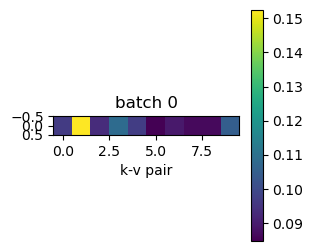

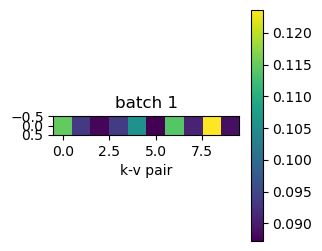

In [156]:
import matplotlib.pyplot as plt 

print("addAttention.attention_weights_numpy: \n", addAttention.attention_weights_numpy)


plt.figure(figsize=(3, 3))
plt.imshow(addAttention.attention_weights_numpy[0,:])
plt.title('batch 0')
plt.xlabel('k-v pair')
plt.colorbar()

plt.figure(figsize=(3, 3))
plt.imshow(addAttention.attention_weights_numpy[1,:])
plt.title('batch 1')
plt.xlabel('k-v pair')
plt.colorbar()

# 权重越高，越吸引注意力

#### 11.4.3.2. <a id='toc11_4_3_2_'></a>[缩放点积注意力](#toc0_)

- q和k的长度`一致`，为`d`
- 注意力评分函数：$a(\mathbf{q},\mathbf{k})=\mathbf{q}^\top\mathbf{k}/\sqrt{d}$
- 向量版本注意力权重：$\mathrm{softmax}\left(\frac{\mathrm{QK}^\top}{\sqrt{d}}\right)\mathbf{V}\in\mathbb{R}^{n\times v}$
- $\text{查询}\mathbf{Q}\in\mathbb{R}^{n\times d}\text{、键}\mathbf{K}\in\mathbb{R}^{m\times d}\text{和 值}\mathbf{V}\in\mathbb{R}^{m\times v}$
- `无可学习`参数



<img src="./Pytorch_Pictures/Attention/scale-dot-product.png" width = "300" height = "300" alt="图片名称" align=center />

- 使用：
```python
# summary 
    # Input:
            # queries:                  (batch_size, num_query, query_size)
            # keys:                     (batch_size, k_v_pair_num,  key_size)
            # values:                   (batch_size, k_v_pair_num, value_size)
    # Output:                           (batch_size, num_query, value_size)
```

---

- 案例-李沐
  - 掩码和Dropout

In [ ]:
#@save
class DotProductAttention(nn.Module):
    """缩放点积注意力"""
    def __init__(self, dropout, **kwargs):
        super(DotProductAttention, self).__init__(**kwargs)
        self.dropout = nn.Dropout(dropout)

    # queries的形状：(batch_size，查询的个数，d)
    # keys的形状：(batch_size，“键－值”对的个数，d)
    # values的形状：(batch_size，“键－值”对的个数，值的维度)
    # valid_lens的形状:(batch_size，)或者(batch_size，查询的个数)
    def forward(self, queries, keys, values, valid_lens=None):
        d = queries.shape[-1]
        # 设置transpose_b=True为了交换keys的最后两个维度
        scores = torch.bmm(queries, keys.transpose(1,2)) / math.sqrt(d)
        self.attention_weights = masked_softmax(scores, valid_lens)
        return torch.bmm(self.dropout(self.attention_weights), values)
    
queries = torch.normal(0, 1, (2, 1, 2))
attention = DotProductAttention(dropout=0.5)
attention.eval()
attention(queries, keys, values, valid_lens)

- (详细) 从头手写
  - 无掩码和Dropout

In [166]:
from torch import nn 


# 示例数据  
batch_size = 2
num_query = 1
query_size = 20             # 一个query的向量长度，d

num_key = 10                    # “键－值”对的个数，m
key_size = 20                # 一个key的向量长度，d

num_value = num_key             # “键－值”对的个数，m
value_size = 4              # 一个value的向量长度，v

queries = torch.randn(size=(batch_size, num_query, query_size))
print('queries size: ', queries.size())
# (batch_size, num_query, query_size)
# (2, 1, 20)

keys = torch.randn(size=(batch_size, num_key, key_size))
print('keys size: ', keys.size())
# (batch_size, num_key, key_size)
# (2, 10, 20)

values = torch.randn(size=(batch_size, num_value, value_size))
print('values size: ', values.size())
# (batch_size, num_value, value_size)
# (2, 10, 4)

features = (queries @ keys.transpose(1, 2)) 
# features = torch.bmm(queries, keys.transpose(1, 2))               # 同上，都可以
# (2, 1, 20) @ (2, 20, 10) = (2, 1, 10)
print(f'features size: {features.shape}')

scores = features / torch.sqrt(torch.tensor(queries.shape[2]))
# (2, 1, 10)
print(f'scores size: {scores.shape}')

attention_weights = torch.softmax(scores, dim=-1)
# (2, 1, 10) / 标量 = (2, 1, 10)
print(f'attention_weights size: {attention_weights.shape}')

attention = torch.bmm(attention_weights, values)
# (2, 1, 4)
print(f'attention size: {attention.shape}')

# summary 
    # Input:
            # queries:                  (batch_size, num_query, query_size)
            # keys:                     (batch_size, k_v_pair_num,  key_size)
            # values:                   (batch_size, k_v_pair_num, value_size)
    # Output:                           (batch_size, num_query, value_size)

queries size:  torch.Size([2, 1, 20])
keys size:  torch.Size([2, 10, 20])
values size:  torch.Size([2, 10, 4])
features size: torch.Size([2, 1, 10])
scores size: torch.Size([2, 1, 10])
attention_weights size: torch.Size([2, 1, 10])
attention size: torch.Size([2, 1, 4])


In [ ]:
from torch import nn 

class DotAttention(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, queries, keys, values):
        # features = (queries @ keys.transpose(1, 2)) 
        featrues = torch.bmm(queries, keys.transpose(1, 2))
        scores = features / torch.sqrt(torch.tensor(queries.shape[2]))
        attention_weights = torch.softmax(scores, dim=-1)
        self.attention_weights_numpy = attention_weights.detach().cpu().numpy()
        attention = torch.bmm(attention_weights, values)
        return attention
    
    def dotAttention_weights(self):
        return self.attention_weights_numpy
    

# 示例数据  
batch_size = 2
num_query = 1
query_size = 20             # 一个query的向量长度，d

num_key = 10                    # “键－值”对的个数，m
key_size = 20                # 一个key的向量长度，d

num_value = num_key             # “键－值”对的个数，m
value_size = 4              # 一个value的向量长度，v

queries = torch.randn(size=(batch_size, num_query, query_size))
print('queries size: ', queries.size())
# (2, 1, 20)

keys = torch.randn(size=(batch_size, num_key, key_size))
print('keys size: ', keys.size())
# (2, 10, 20)

values = torch.randn(size=(batch_size, num_value, value_size))
print('values size: ', values.size())
# (2, 10, 4)

dotAttention = DotAttention()
attention_values = dotAttention(queries=queries, keys=keys, values=values)
attention_values.shape

In [64]:
dotAttention.dotAttention_weights()

array([[[0.04985159, 0.05334752, 0.09109451, 0.05134343, 0.28254676,
         0.03270705, 0.06674033, 0.11863098, 0.1836128 , 0.07012501]],

       [[0.13796079, 0.06152954, 0.14528   , 0.08120591, 0.04767546,
         0.04191732, 0.12780628, 0.02460011, 0.11363557, 0.21838896]]],
      dtype=float32)

dotAttention.dotAttention_weights(): 
 [[[0.04985159 0.05334752 0.09109451 0.05134343 0.28254676 0.03270705
   0.06674033 0.11863098 0.1836128  0.07012501]]

 [[0.13796079 0.06152954 0.14528    0.08120591 0.04767546 0.04191732
   0.12780628 0.02460011 0.11363557 0.21838896]]]


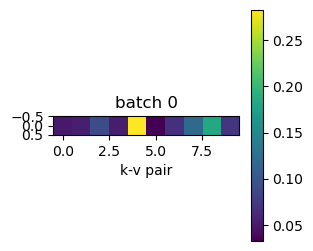

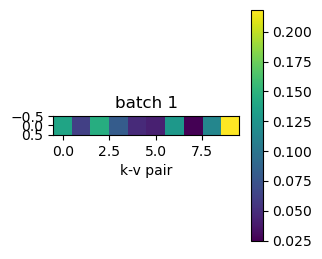

In [65]:
import matplotlib.pyplot as plt 

print("dotAttention.dotAttention_weights(): \n", dotAttention.dotAttention_weights())


plt.figure(figsize=(3, 3))
plt.imshow(dotAttention.dotAttention_weights()[0,:])
plt.title('batch 0')
plt.xlabel('k-v pair')
plt.colorbar()

plt.figure(figsize=(3, 3))
plt.imshow(dotAttention.dotAttention_weights()[1,:])
plt.title('batch 1')
plt.xlabel('k-v pair')
plt.colorbar()

# 权重越高，越吸引注意力

### 11.4.4. <a id='toc11_4_4_'></a>[自注意力机制](#toc0_)

自注意力机制：就是用同一个`X`分别于`W_q`、`W_k`和`W_v`矩阵相乘得到`Q`、`K`和`V` `向量/矩阵`。因为用的是同一个X同时作为q、k和v，所以得名为 `自注意力` 。

- 使用：
```python
# self-attention:                       queries = keys = values
    # Input:
            # queries:                  (batch_size, num_query, query_size)
            # keys:                     (batch_size, k_v_pair_num,  key_size)
            # values:                   (batch_size, k_v_pair_num, value_size)
    # Output:                           (batch_size, num_query, value_size)
```

In [15]:
import torch 
import torch.nn as nn 
import torch.utils.data as data
import torchvision
import time 

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 数据准备
dbs = './Pytorch_datasets/'
train_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=True, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [

            torchvision.transforms.ToTensor(), 
            #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

test_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=False, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(), 
            #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

# 迭代型数据方式
train_iter = data.DataLoader(dataset=train_dataset, batch_size=128,  shuffle=True)
# test_iter = data.DataLoader(dataset=test_dataset) # test不需要batch训练

# 网络结构1:CNN
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(28*28, 1024), nn.ReLU(),
            nn.Linear(1024, 10), nn.Softmax()
        )

    def forward(self, X):
        return self.network(X)
    
# 构建模型2:Additive attention
class AddAttentionMNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(28 * 28, 128), 
            nn.ReLU()
        )
        self.attention = AddiAttention(
            query_size=128, 
            key_size=128,
            value_size=128, 
            exitBias=False
        )
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.input(x)
        x = x.unsqueeze(1)  # dim=1增加一个维度
        x = self.attention(queries=x, keys=x, values=x).squeeze(1) # dim=1的维度取消
        x = self.fc2(x)
        return x
    
# 构建模型3:DotAttention
class SelfDotAttention(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim
        self.W_q = nn.Linear(self.dim, self.dim)
        self.W_k = nn.Linear(self.dim, self.dim)
        self.W_v = nn.Linear(self.dim, self.dim)

    def forward(self, X):
        # 准备Q K V
        queries = self.W_q(X)
        keys = self.W_k(X)
        values = self.W_v(X)
        # print(X.shape)
        # 计算权重
        features = torch.bmm(queries, keys.transpose(1, 2))        # 点积
        scores = features / torch.sqrt(torch.tensor(self.dim))    # 缩放
        attention_weights = torch.softmax(scores, dim=-1)
        attention = torch.bmm(attention_weights, values)
        return attention

class DotAttentionMNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(28 * 28, 128),
            nn.ReLU()
        )
        self.adjust = nn.Linear(128, 128)
        self.attention = SelfDotAttention(dim=128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, X):
        x = self.input(X)
        # print('raw X size: ', x.shape)
        x = x.unsqueeze(1)      # 增加dim=1维度
        # print('x.unsqueeze(1) size: ', x.shape)
        x = self.attention(x)
        x = x.squeeze(1)        # 去除dim=1维度
        # print('x.squeeze(1) size: ', x.shape)
        x = self.fc2(x)
        return x
    
# 训练过程封装
def train_steps(epochs, train_dataset, train_iter, test_dataset, net, loss_fn, opt, device):
    '''
    参数记录
    epochs = epochs                         # epoch
    train_dataset = train_dataset           # 全部train数据集
    train_iter = train_iter                 # batch之后的train数据集
    test_dataset = test_dataset             # 全部test数据集
    net = net                               # 网络模型
    loss_fn = loss_fn                       # 损失函数
    opt = opt                               # 优化器
    device = device                         # device GPU/CPU
    '''
    print('='*100, '\n', f"Runing on {device}", '\n','='*100)
    train_all_data_gpu = train_dataset.data.to(device)
    train_all_targets_gpu = train_dataset.targets.to(device)
    test_all_data_gpu = test_dataset.data.to(device)
    test_all_targets_gpu = test_dataset.targets.to(device)
    net = nn.DataParallel(module=net)
    # net = nn.DataParallel(module=net, device_ids=[0, 1], output_device=[0]) # 多GPU并行计算，等价于net = nn.DataParallel(module=net)
    net.to(device)

    # 开始迭代
    start = time.time()
    for epoch in range(epochs):
        for batch_record in train_iter:
            X, y = batch_record                 # 分配X, y
            X, y = X.to(device), y.to(device)   # 复制到device（GPU/CPU）上
            # print(X[0])
            # print(X[0].dtype)
            # break
            opt.zero_grad()                     # 默认是累加，此处从新求导
            y_hat = net(X)          # 计算y_hat
            loss = loss_fn(y_hat, y)# 计算loss
            loss.backward()         # 计算梯度
            opt.step()              # 更新网络参数

        net.eval()  # 切换至评估模式
                    # 模型默认是net.train()
                    # 但是net中含有BN、Dropout等，在test时必须固定train时学好的参数，不能被test又改变了
                    # 但net中没有BN、Dropout等时，加不加net.eval()都无所谓

        with torch.no_grad(): # with下内容不进行grad计算，可以节省运算和内存
            train_loss = loss_fn(net(train_all_data_gpu/256), train_all_targets_gpu)
            # print(train_loss)
            train_acc_cmp = net(train_all_data_gpu/256).argmax(axis=1) == train_all_targets_gpu
            train_acc = (train_acc_cmp.sum() / len(train_acc_cmp)) * 100
            # print(train_acc)
            test_acc_cmp = net(test_all_data_gpu/256).argmax(axis=1) == test_all_targets_gpu
            test_acc = (test_acc_cmp.sum() / len(test_acc_cmp)) * 100
            # print(test_acc)
            print(f"epoch {epoch+1}/{epochs}: train_loss={train_loss}, train_acc={train_acc}, test_acc={test_acc}")

    stop = time.time()
    seconds = stop - start
    def convert_seconds(seconds):
        days = seconds // (24 * 3600)
        hours = (seconds % (24 * 3600)) // 3600
        minutes = (seconds % 3600) // 60
        remaining_seconds = seconds % 60
        return days, hours, minutes, remaining_seconds
    days, hours, minutes, remaining_seconds = convert_seconds(seconds)
    print('='*100, '\n', f"Total：{days} d/ {hours} h/ {minutes} m/ {remaining_seconds} s")
    # return (train_loss, train_acc, test_acc)
    return None

# lr 0.01 -> 0.5
# 结果表明还是会快一点收敛
# net = Net()  
# net = AddAttentionMNISTModel()
net = DotAttentionMNISTModel()
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.5)   
train_steps(
    epochs=10, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device 
) 

 Runing on cuda:0 
epoch 1/10: train_loss=0.12752601504325867, train_acc=96.22000122070312, test_acc=96.16999816894531
epoch 2/10: train_loss=0.0828862413764, train_acc=97.41999816894531, test_acc=96.8499984741211
epoch 3/10: train_loss=0.0710381269454956, train_acc=97.73333740234375, test_acc=97.33000183105469
epoch 4/10: train_loss=0.04808149114251137, train_acc=98.47666931152344, test_acc=97.38999938964844
epoch 5/10: train_loss=0.0647362694144249, train_acc=97.86833190917969, test_acc=96.59000396728516
epoch 6/10: train_loss=0.03491692245006561, train_acc=98.86500549316406, test_acc=97.62999725341797
epoch 7/10: train_loss=0.039316173642873764, train_acc=98.66166687011719, test_acc=97.2699966430664
epoch 8/10: train_loss=0.027984920889139175, train_acc=99.07833099365234, test_acc=97.63999938964844
epoch 9/10: train_loss=0.0323726050555706, train_acc=98.86666870117188, test_acc=97.23999786376953
epoch 10/10: train_loss=0.02307908982038498, train_acc=99.22000122070312, test_acc=97.78

### 11.4.5. <a id='toc11_4_5_'></a>[多头注意力机制](#toc0_)
上述只求一次注意力的过程可以叫做单头注意力。多头注意力就是对同样的Q, K, V求多次注意力，并行计算h个得到h个不同的attention，再把这些不同的h个attention连接起来得到最终的attentions，每一个attention都是一个head（头），总共有h个head（头）。  

<img src="./Pytorch_Pictures/Attention/multi_head.jpg" width = "300" height = "350" alt="多头注意力机制" align=center />

在实现过程中通常选择`缩放点积注意力`作为每一个注意力头，除以根号d可以使计算数值减小。

```python
# summary 
    # Input:
            # queries:                  (batch_size, num_query, query_size)
            # keys:                     (batch_size, k_v_pair_num,  key_size)
            # values:                   (batch_size, k_v_pair_num, value_size)
    # Output:                           (batch_size, num_query, value_size)

# 先 transpose_input()
# 后 transpose_output()
# 终 self.W_o = nn.Linear(num_hiddens, num_hiddens, bias=exitBias)   # 最后concat所有head的结果 (其实就是投影)
```


---

- 案例-李沐 (修改)
  - 去除掩码和Dropout

In [196]:
import torch 
import torch.nn as nn 


# DotAttention
class DotAttention(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, queries, keys, values):
        # features = (queries @ keys.transpose(1, 2)) 
        features = torch.bmm(queries, keys.transpose(1, 2))
        scores = features / torch.sqrt(torch.tensor(queries.shape[-1]))
        attention_weights = torch.softmax(scores, dim=-1)
        self.attention_weights_numpy = attention_weights.detach().cpu().numpy()
        attention = torch.bmm(attention_weights, values)
        return attention
    
    def dotAttention_weights(self):
        return self.attention_weights_numpy

# 多头注意力机制
class MultiHeadAttention(nn.Module):
    def __init__(self, 
                 num_heads, 
                 query_size, 
                 num_hiddens, 
                 key_size, 
                 value_size, 
                 exitBias=False):
        super().__init__()
        self.num_heads = num_heads
        self.attention = DotAttention()
        self.W_q = nn.Linear(query_size, num_hiddens, bias=exitBias)
        self.W_k = nn.Linear(key_size, num_hiddens, bias=exitBias)
        self.W_v = nn.Linear(value_size, num_hiddens, bias=exitBias)

        self.W_o = nn.Linear(num_hiddens, num_hiddens, bias=exitBias)   # 最后concat所有head的结果 (其实就是投影)

    def transpose_input(self, X, num_heads):
        """为了多注意力头的并行计算而变换形状"""
        # 输入X的形状:(batch_size，查询或者“键－值”对的个数，num_hiddens)
        # 输出X的形状:(batch_size，查询或者“键－值”对的个数，`num_heads`，num_hiddens/num_heads)
        X = X.reshape(X.shape[0], X.shape[1], num_heads, -1)

        # 输出X的形状:(batch_size，`num_heads`，查询或者“键－值”对的个数，num_hiddens/num_heads)
        X = X.permute(0, 2, 1, 3)                                                                   # 调整顺序以便做广播 (向量化并行计算multi heads)

        # 最终输出的形状:(batch_size*`num_heads`,查询或者“键－值”对的个数，num_hiddens/num_heads)
        return X.reshape(-1, X.shape[2], X.shape[3])

    def transpose_output(self, X, num_heads):
        """逆转transpose_qkv函数的操作"""
        # 输入X的形状:(batch_size*`num_heads`,查询或者“键－值”对的个数，num_hiddens/num_heads)
        # 输出X的形状:(batch_size,`num_heads``,查询或者“键－值”对的个数，num_hiddens/num_heads)
        X = X.reshape(-1, num_heads, X.shape[1], X.shape[2])

        # 输出X的形状:(batch_size查询或者“键－值”对的个数，`num_heads``,num_hiddens/num_heads)                                        # 不改变顺序
        X = X.permute(0, 2, 1, 3)

        # 最终输出X的形状:(batch_size,`num_heads`,查询或者“键－值”对的个数，num_hiddens/num_heads)
        return X.reshape(X.shape[0], X.shape[1], -1)

    def forward(self, queries, keys, values):
        # queries，keys，values的形状:
            # (batch_size，查询或者“键－值”对的个数，num_hiddens)
            # (batch_size，)或(batch_size，查询的个数)
        # 经过变换后，输出的queries，keys，values　的形状:
            # (batch_size*num_heads，查询或者“键－值”对的个数，num_hiddens/num_heads) ##############
        queries = self.W_q(queries)
        print(f'Q size: {queries.shape}')
        queries = self.transpose_input(queries, self.num_heads)
        print(f'Q transpose_input size: {queries.shape}')

        keys = self.W_k(keys)
        print(f'K size: {keys.shape}')
        keys = self.transpose_input(keys, self.num_heads)
        print(f'K transpose_input size: {keys.shape}')

        values = self.W_v(values)
        print(f'V size: {values.shape}')
        values = self.transpose_input(values, self.num_heads)
        print(f'V transpose_input size: {values.shape}')

        # output的形状:(batch_size*num_heads，查询的个数，num_hiddens/num_heads) ##############
        output = self.attention(queries=queries, keys=keys, values=values)
        print(f'output size: {output.shape}')

        # output_concat的形状:(batch_size，查询的个数，num_hiddens) ##############
        output_concat = self.transpose_output(output, self.num_heads)
        return self.W_o(output_concat)

# 实例化
num_hiddens, num_heads = 100, 5
multiHeadAttention = MultiHeadAttention(
    num_heads = num_heads, 
    query_size = num_hiddens, 
    num_hiddens = num_hiddens, 
    key_size = num_hiddens, 
    value_size = num_hiddens, 
    exitBias=False
)

# 传参
batch_size, num_queries = 2, 4
num_kvpairs =  6
X = torch.ones((batch_size, num_queries, num_hiddens)); print('raw queries size: ', X.shape)
# (batch_size, num_queries, num_hiddens)
# 2, 4, 100

Y = torch.ones((batch_size, num_kvpairs, num_hiddens)); print('raw keys/values size :', Y.shape)
# (batch_size, num_kvpairs, num_hiddens)
# 2, 6, 100

attention_values = multiHeadAttention(X, Y, Y); print('attention_values size: ', attention_values.shape)
# (batch_size, num_queries, num_hiddens)
# 2, 4, 100

raw queries size:  torch.Size([2, 4, 100])
raw keys/values size : torch.Size([2, 6, 100])
Q size: torch.Size([2, 4, 100])
Q transpose_input size: torch.Size([10, 4, 20])
K size: torch.Size([2, 6, 100])
K transpose_input size: torch.Size([10, 6, 20])
V size: torch.Size([2, 6, 100])
V transpose_input size: torch.Size([10, 6, 20])
output size: torch.Size([10, 4, 20])
attention_values size:  torch.Size([2, 4, 100])


- 从头手写
  - 无掩码和Dropout

In [168]:
import torch 
import torch.nn as nn 
import torch.utils.data as data
import torchvision
import time 

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 数据准备
dbs = './Pytorch_datasets/'
train_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=True, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [

            torchvision.transforms.ToTensor(), 
            #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

test_dataset = torchvision.datasets.MNIST(
    root=dbs, 
    train=False, 
    download=True, 
    transform=torchvision.transforms.Compose(
        [
            torchvision.transforms.ToTensor(), 
            #  torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ]
    )
)

# 迭代型数据方式
train_iter = data.DataLoader(dataset=train_dataset, batch_size=128,  shuffle=True)
# test_iter = data.DataLoader(dataset=test_dataset) # test不需要batch训练

# 网络结构1:CNN
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(28*28, 1024), nn.ReLU(),
            nn.Linear(1024, 10), nn.Softmax()
        )

    def forward(self, X):
        return self.network(X)
    
# 构建模型2:Additive attention
class AddAttentionMNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(28 * 28, 128), 
            nn.ReLU()
        )
        self.attention = AddiAttention(
            query_size=128, 
            key_size=128,
            value_size=128, 
            exitBias=False
        )
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.input(x)
        x = x.unsqueeze(1)  # dim=1增加一个维度
        x = self.attention(queries=x, keys=x, values=x).squeeze(1) # dim=1的维度取消
        x = self.fc2(x)
        return x
    
# 构建模型3:DotAttention
class SelfDotAttention(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim
        self.W_q = nn.Linear(self.dim, self.dim)
        self.W_k = nn.Linear(self.dim, self.dim)
        self.W_v = nn.Linear(self.dim, self.dim)

    def forward(self, X):
        # 准备Q K V
        queries = self.W_q(X)
        keys = self.W_k(X)
        values = self.W_v(X)
        # print(X.shape)
        # 计算权重
        features = torch.bmm(queries, keys.transpose(1, 2))        # 点积
        scores = features / torch.sqrt(torch.tensor(self.dim))    # 缩放
        attention_weights = torch.softmax(scores, dim=-1)
        attention = torch.bmm(attention_weights, values)
        return attention

class DotAttentionMNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(28 * 28, 128),
            nn.ReLU()
        )
        self.adjust = nn.Linear(128, 128)
        self.attention = SelfDotAttention(dim=128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, X):
        x = self.input(X)
        # print('raw X size: ', x.shape)
        x = x.unsqueeze(1)      # 增加dim=1维度
        # print('x.unsqueeze(1) size: ', x.shape)
        x = self.attention(x)
        x = x.squeeze(1)        # 去除dim=1维度
        # print('x.squeeze(1) size: ', x.shape)
        x = self.fc2(x)
        return x

# 4
class MultiHeadAttentionMNISTModel(nn.Module):
    def __init__(self, num_heads):
        super().__init__()
        self.input = nn.Sequential(
                nn.Flatten(), 
                nn.Linear(28 * 28, 128),
                nn.ReLU()
            )
        num_hiddens = 128
        self.attention = multiHeadAttention = MultiHeadAttention(
            num_heads = num_heads, 
            query_size = num_hiddens, 
            num_hiddens = num_hiddens, 
            key_size = num_hiddens, 
            value_size = num_hiddens, 
            exitBias=False
        )
        self.fc2 = nn.Linear(128, 10)

    def forward(self, X):
        x = self.input(X)
        x = x.unsqueeze(1)
        x = self.attention(queries=x, keys=x, values=x)
        x = x.squeeze(1)
        x = self.fc2(x)
        return x

# 训练过程封装
def train_steps(epochs, train_dataset, train_iter, test_dataset, net, loss_fn, opt, device):
    '''
    参数记录
    epochs = epochs                         # epoch
    train_dataset = train_dataset           # 全部train数据集
    train_iter = train_iter                 # batch之后的train数据集
    test_dataset = test_dataset             # 全部test数据集
    net = net                               # 网络模型
    loss_fn = loss_fn                       # 损失函数
    opt = opt                               # 优化器
    device = device                         # device GPU/CPU
    '''
    print('='*100, '\n', f"Runing on {device}", '\n','='*100)
    train_all_data_gpu = train_dataset.data.to(device)
    train_all_targets_gpu = train_dataset.targets.to(device)
    test_all_data_gpu = test_dataset.data.to(device)
    test_all_targets_gpu = test_dataset.targets.to(device)
    net = nn.DataParallel(module=net)
    net.to(device)

    # 开始迭代
    start = time.time()
    for epoch in range(epochs):
        for batch_record in train_iter:
            X, y = batch_record                 # 分配X, y
            X, y = X.to(device), y.to(device)   # 复制到device（GPU/CPU）上
            # print(X[0])
            # print(X[0].dtype)
            # break
            opt.zero_grad()                     # 默认是累加，此处从新求导
            y_hat = net(X)          # 计算y_hat
            loss = loss_fn(y_hat, y)# 计算loss
            loss.backward()         # 计算梯度
            opt.step()              # 更新网络参数

        net.eval()  # 切换至评估模式
                    # 模型默认是net.train()
                    # 但是net中含有BN、Dropout等，在test时必须固定train时学好的参数，不能被test又改变了
                    # 但net中没有BN、Dropout等时，加不加net.eval()都无所谓

        with torch.no_grad(): # with下内容不进行grad计算，可以节省运算和内存
            train_loss = loss_fn(net(train_all_data_gpu/256), train_all_targets_gpu)
            # print(train_loss)
            train_acc_cmp = net(train_all_data_gpu/256).argmax(axis=1) == train_all_targets_gpu
            train_acc = (train_acc_cmp.sum() / len(train_acc_cmp)) * 100
            # print(train_acc)
            test_acc_cmp = net(test_all_data_gpu/256).argmax(axis=1) == test_all_targets_gpu
            test_acc = (test_acc_cmp.sum() / len(test_acc_cmp)) * 100
            # print(test_acc)
            print(f"epoch {epoch+1}/{epochs}: train_loss={train_loss}, train_acc={train_acc}, test_acc={test_acc}")

    stop = time.time()
    seconds = stop - start
    def convert_seconds(seconds):
        days = seconds // (24 * 3600)
        hours = (seconds % (24 * 3600)) // 3600
        minutes = (seconds % 3600) // 60
        remaining_seconds = seconds % 60
        return days, hours, minutes, remaining_seconds
    days, hours, minutes, remaining_seconds = convert_seconds(seconds)
    print('='*100, '\n', f"Total：{days} d/ {hours} h/ {minutes} m/ {remaining_seconds} s")
    # return (train_loss, train_acc, test_acc)
    return None

# lr 0.01 -> 0.5
# 结果表明还是会快一点收敛
# net = Net()  
# net = AddAttentionMNISTModel()
# net = DotAttentionMNISTModel()
net = MultiHeadAttentionMNISTModel(num_heads=4)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(params=net.parameters(), lr=0.5)   
train_steps(
    epochs=10, 
    train_dataset=train_dataset, 
    train_iter=train_iter, 
    test_dataset=test_dataset, 
    net=net,                        
    loss_fn=loss_fn, 
    opt=opt, 
    device=device 
)

 Runing on cuda:0 


/bmp/backup/zhaosy/miniconda3/envs/pytorch/lib/python3.12/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):


epoch 1/10: train_loss=0.2031008005142212, train_acc=93.56666564941406, test_acc=93.64999389648438
epoch 2/10: train_loss=0.08679258823394775, train_acc=97.34833526611328, test_acc=96.33000183105469
epoch 3/10: train_loss=0.07397859543561935, train_acc=97.67333221435547, test_acc=96.94999694824219
epoch 4/10: train_loss=0.06289227306842804, train_acc=97.98500061035156, test_acc=96.94000244140625
epoch 5/10: train_loss=0.04933113232254982, train_acc=98.45999908447266, test_acc=97.1199951171875
epoch 6/10: train_loss=0.04422649368643761, train_acc=98.58833312988281, test_acc=97.23999786376953
epoch 7/10: train_loss=0.04513872414827347, train_acc=98.55333709716797, test_acc=96.97000122070312
epoch 8/10: train_loss=0.06883847713470459, train_acc=97.73999786376953, test_acc=96.20999908447266
epoch 9/10: train_loss=0.03226908668875694, train_acc=98.91000366210938, test_acc=97.2699966430664
epoch 10/10: train_loss=0.06508824974298477, train_acc=97.91333770751953, test_acc=96.27999877929688
 T

### 11.4.6. <a id='toc11_4_6_'></a>[attention-seq2seq](#toc0_)

- 加入attention机制的Seq2Seq；

- 基于Attention的Seq2Seq。

2048.0

## 11.5. <a id='toc11_5_'></a>[Transformer](#toc0_)
```shell
完全基于注意力机制的Encoder-Decoder架构。
1.多头自注意力机制；
2.掩码；
3.Encoder-Decoder框架。
```

### 11.5.1. <a id='toc11_5_1_'></a>[位置编码](#toc0_)
```shell
由于Transformer并行运算，没有顺序信息；
Google一帮人发明了利用sin和cos函数编码位置信息并添加到输入X中；
```

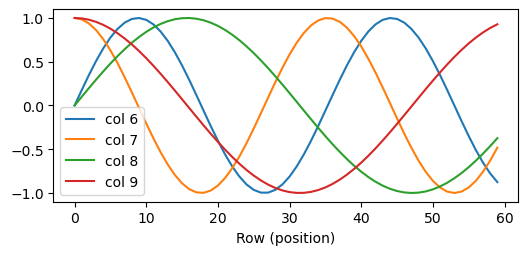

In [187]:
from torch import nn

import matplotlib.pyplot as plt

#@save
class PositionalEncoding(nn.Module):
    """位置编码"""
    def __init__(self, num_hiddens, dropout, max_len=1000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(dropout)
        # 创建一个足够长的P
        self.P = torch.zeros((1, max_len, num_hiddens))
        X = torch.arange(max_len, dtype=torch.float32).reshape(
            -1, 1) / torch.pow(10000, torch.arange(
            0, num_hiddens, 2, dtype=torch.float32) / num_hiddens)
        self.P[:, :, 0::2] = torch.sin(X)
        self.P[:, :, 1::2] = torch.cos(X)

    def forward(self, X):
        X = X + self.P[:, :X.shape[1], :].to(X.device)
        return self.dropout(X)

encoding_dim, num_steps = 32, 60
pos_encoding = PositionalEncoding(encoding_dim, 0)
pos_encoding.eval()
X = pos_encoding(torch.zeros((1, num_steps, encoding_dim)))
P = pos_encoding.P[:, :X.shape[1], :]

# Draw a plot picture
plt.figure(figsize=(6, 2.5))
plt.plot(torch.arange(num_steps), P[0, :, 6:10].T[0], label='col 6')
plt.plot(torch.arange(num_steps), P[0, :, 6:10].T[1], label='col 7')
plt.plot(torch.arange(num_steps), P[0, :, 6:10].T[2], label='col 8')
plt.plot(torch.arange(num_steps), P[0, :, 6:10].T[3], label='col 9')
plt.xlabel('Row (position)')
plt.legend()

### 11.5.2. <a id='toc11_5_2_'></a>[基于位置的前馈网络](#toc0_)

In [190]:
from torch import nn

#@save
class PositionWiseFFN(nn.Module):
    """基于位置的前馈网络"""
    def __init__(self, ffn_num_input, ffn_num_hiddens, ffn_num_outputs,
                 **kwargs):
        super(PositionWiseFFN, self).__init__(**kwargs)
        self.dense1 = nn.Linear(ffn_num_input, ffn_num_hiddens)
        self.relu = nn.ReLU()
        self.dense2 = nn.Linear(ffn_num_hiddens, ffn_num_outputs)

    def forward(self, X):
        return self.dense2(self.relu(self.dense1(X)))

ffn = PositionWiseFFN(4, 4, 8)
ffn.eval()
ffn(torch.ones((2, 3, 4)))[0]

tensor([[-0.0985, -0.0769,  0.4326, -0.7424,  0.5790, -0.0797, -0.2331, -0.1805],
        [-0.0985, -0.0769,  0.4326, -0.7424,  0.5790, -0.0797, -0.2331, -0.1805],
        [-0.0985, -0.0769,  0.4326, -0.7424,  0.5790, -0.0797, -0.2331, -0.1805]],
       grad_fn=<SelectBackward0>)

### 11.5.3. <a id='toc11_5_3_'></a>[残差连接和层规范化](#toc0_)

In [192]:
ln = nn.LayerNorm(2)
bn = nn.BatchNorm1d(2)

X = torch.tensor([[1, 2], [2, 3]], dtype=torch.float32)
# 在训练模式下计算X的均值和方差
print('layer norm:', ln(X), '\nbatch norm:', bn(X))

layer norm: tensor([[-1.0000,  1.0000],
        [-1.0000,  1.0000]], grad_fn=<NativeLayerNormBackward0>) 
batch norm: tensor([[-1.0000, -1.0000],
        [ 1.0000,  1.0000]], grad_fn=<NativeBatchNormBackward0>)


In [200]:
#@save
class AddNorm(nn.Module):
    """残差连接后进行层规范化"""
    def __init__(self, normalized_shape, dropout, **kwargs):
        super(AddNorm, self).__init__(**kwargs)
        self.dropout = nn.Dropout(dropout)
        self.ln = nn.LayerNorm(normalized_shape)

    def forward(self, X, Y):
        return self.ln(self.dropout(Y) + X)

add_norm = AddNorm([3, 4], 0.5)
add_norm.eval()
add_norm(torch.ones((2, 3, 4)), torch.ones((2, 3, 4))).shape

torch.Size([2, 3, 4])

### 11.5.4. <a id='toc11_5_4_'></a>[编码器](#toc0_)

In [201]:
import torch 
import torch.nn as nn 


# DotAttention
class DotAttention(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, queries, keys, values):
        # features = (queries @ keys.transpose(1, 2)) 
        features = torch.bmm(queries, keys.transpose(1, 2))
        scores = features / torch.sqrt(torch.tensor(queries.shape[-1]))
        attention_weights = torch.softmax(scores, dim=-1)
        self.attention_weights_numpy = attention_weights.detach().cpu().numpy()
        attention = torch.bmm(attention_weights, values)
        return attention
    
    def dotAttention_weights(self):
        return self.attention_weights_numpy

# 多头注意力机制
class MultiHeadAttention(nn.Module):
    def __init__(self, 
                 num_heads, 
                 query_size, 
                 num_hiddens, 
                 key_size, 
                 value_size, 
                 exitBias=False):
        super().__init__()
        self.num_heads = num_heads
        self.attention = DotAttention()
        self.W_q = nn.Linear(query_size, num_hiddens, bias=exitBias)
        self.W_k = nn.Linear(key_size, num_hiddens, bias=exitBias)
        self.W_v = nn.Linear(value_size, num_hiddens, bias=exitBias)

        self.W_o = nn.Linear(num_hiddens, num_hiddens, bias=exitBias)   # 最后concat所有head的结果 (其实就是投影)

    def transpose_input(self, X, num_heads):
        """为了多注意力头的并行计算而变换形状"""
        # 输入X的形状:(batch_size，查询或者“键－值”对的个数，num_hiddens)
        # 输出X的形状:(batch_size，查询或者“键－值”对的个数，`num_heads`，num_hiddens/num_heads)
        X = X.reshape(X.shape[0], X.shape[1], num_heads, -1)

        # 输出X的形状:(batch_size，`num_heads`，查询或者“键－值”对的个数，num_hiddens/num_heads)
        X = X.permute(0, 2, 1, 3)                                                                   # 调整顺序以便做广播 (向量化并行计算multi heads)

        # 最终输出的形状:(batch_size*`num_heads`,查询或者“键－值”对的个数，num_hiddens/num_heads)
        return X.reshape(-1, X.shape[2], X.shape[3])

    def transpose_output(self, X, num_heads):
        """逆转transpose_qkv函数的操作"""
        # 输入X的形状:(batch_size*`num_heads`,查询或者“键－值”对的个数，num_hiddens/num_heads)
        # 输出X的形状:(batch_size,`num_heads``,查询或者“键－值”对的个数，num_hiddens/num_heads)
        X = X.reshape(-1, num_heads, X.shape[1], X.shape[2])

        # 输出X的形状:(batch_size查询或者“键－值”对的个数，`num_heads``,num_hiddens/num_heads)                                        # 不改变顺序
        X = X.permute(0, 2, 1, 3)

        # 最终输出X的形状:(batch_size,`num_heads`,查询或者“键－值”对的个数，num_hiddens/num_heads)
        return X.reshape(X.shape[0], X.shape[1], -1)

    def forward(self, queries, keys, values):
        # queries，keys，values的形状:
            # (batch_size，查询或者“键－值”对的个数，num_hiddens)
            # (batch_size，)或(batch_size，查询的个数)
        # 经过变换后，输出的queries，keys，values　的形状:
            # (batch_size*num_heads，查询或者“键－值”对的个数，num_hiddens/num_heads) ##############
        queries = self.W_q(queries)
        print(f'Q size: {queries.shape}')
        queries = self.transpose_input(queries, self.num_heads)
        print(f'Q transpose_input size: {queries.shape}')

        keys = self.W_k(keys)
        print(f'K size: {keys.shape}')
        keys = self.transpose_input(keys, self.num_heads)
        print(f'K transpose_input size: {keys.shape}')

        values = self.W_v(values)
        print(f'V size: {values.shape}')
        values = self.transpose_input(values, self.num_heads)
        print(f'V transpose_input size: {values.shape}')

        # output的形状:(batch_size*num_heads，查询的个数，num_hiddens/num_heads) ##############
        output = self.attention(queries=queries, keys=keys, values=values)
        print(f'output size: {output.shape}')

        # output_concat的形状:(batch_size，查询的个数，num_hiddens) ##############
        output_concat = self.transpose_output(output, self.num_heads)
        return self.W_o(output_concat)

In [208]:
from torch import nn

#@save
class EncoderBlock(nn.Module):
    """Transformer编码器块"""
    def __init__(self, key_size, query_size, value_size, num_hiddens,
                 norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
                 dropout, use_bias=False, **kwargs):
        super(EncoderBlock, self).__init__(**kwargs)
        # self.attention = d2l.MultiHeadAttention(
        #     key_size, query_size, value_size, num_hiddens, num_heads, dropout,
        #     use_bias)
        self.attention = MultiHeadAttention(
            num_heads, 
            query_size, 
            num_hiddens, 
            key_size, 
            value_size, 
            exitBias=False)
        self.addnorm1 = AddNorm(norm_shape, dropout)
        self.ffn = PositionWiseFFN(
            ffn_num_input, ffn_num_hiddens, num_hiddens)
        self.addnorm2 = AddNorm(norm_shape, dropout)

    def forward(self, X):
        Y = self.addnorm1(X, self.attention(X, X, X))
        return self.addnorm2(Y, self.ffn(Y))

X = torch.ones((2, 100, 24))
encoder_blk = EncoderBlock(24, 24, 24, 24, [100, 24], 24, 48, 8, 0.5)
encoder_blk.eval()
encoder_blk(X).shape

Q size: torch.Size([2, 100, 24])
Q transpose_input size: torch.Size([16, 100, 3])
K size: torch.Size([2, 100, 24])
K transpose_input size: torch.Size([16, 100, 3])
V size: torch.Size([2, 100, 24])
V transpose_input size: torch.Size([16, 100, 3])
output size: torch.Size([16, 100, 3])


torch.Size([2, 100, 24])

In [217]:
#@save
class TransformerEncoder(nn.Module):
    """Transformer编码器"""
    def __init__(self, vocab_size, key_size, query_size, value_size,
                 num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens,
                 num_heads, num_layers, dropout, use_bias=False, **kwargs):
        super(TransformerEncoder, self).__init__(**kwargs)
        self.num_hiddens = num_hiddens
        self.embedding = nn.Embedding(vocab_size, num_hiddens)
        self.pos_encoding = PositionalEncoding(num_hiddens, dropout)
        self.blks = nn.Sequential()
        for i in range(num_layers):
            self.blks.add_module("block"+str(i),
                EncoderBlock(key_size, query_size, value_size, num_hiddens,
                             norm_shape, ffn_num_input, ffn_num_hiddens,
                             num_heads, dropout, use_bias))

    def forward(self, X, *args):
        # 因为位置编码值在-1和1之间，
        # 因此嵌入值乘以嵌入维度的平方根进行缩放，
        # 然后再与位置编码相加。
        # X = self.pos_encoding(self.embedding(X) * math.sqrt(self.num_hiddens))
        X = self.pos_encoding(self.embedding(X) * torch.sqrt(torch.tensor(self.num_hiddens)))
        self.attention_weights = [None] * len(self.blks)
        for i, blk in enumerate(self.blks):
            X = blk(X)
            self.attention_weights[
                i] = blk.attention.attention.attention_weights_numpy
        return X

encoder = TransformerEncoder(
    200, 24, 24, 24, 24, [100, 24], 24, 48, 8, 2, 0.5)
encoder.eval()
encoder(torch.ones((2, 100), dtype=torch.long)).shape

Q size: torch.Size([2, 100, 24])
Q transpose_input size: torch.Size([16, 100, 3])
K size: torch.Size([2, 100, 24])
K transpose_input size: torch.Size([16, 100, 3])
V size: torch.Size([2, 100, 24])
V transpose_input size: torch.Size([16, 100, 3])
output size: torch.Size([16, 100, 3])
Q size: torch.Size([2, 100, 24])
Q transpose_input size: torch.Size([16, 100, 3])
K size: torch.Size([2, 100, 24])
K transpose_input size: torch.Size([16, 100, 3])
V size: torch.Size([2, 100, 24])
V transpose_input size: torch.Size([16, 100, 3])
output size: torch.Size([16, 100, 3])


torch.Size([2, 100, 24])

### 11.5.5. <a id='toc11_5_5_'></a>[解码器](#toc0_)

In [221]:
class DecoderBlock(nn.Module):
    """解码器中第i个块"""
    def __init__(self, key_size, query_size, value_size, num_hiddens,
                 norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
                 dropout, i, **kwargs):
        super(DecoderBlock, self).__init__(**kwargs)
        self.i = i
        self.attention1 = MultiHeadAttention(
            key_size, query_size, value_size, num_hiddens, num_heads, dropout)
        self.addnorm1 = AddNorm(norm_shape, dropout)
        self.attention2 = MultiHeadAttention(
            key_size, query_size, value_size, num_hiddens, num_heads, dropout)
        self.addnorm2 = AddNorm(norm_shape, dropout)
        self.ffn = PositionWiseFFN(ffn_num_input, ffn_num_hiddens,
                                   num_hiddens)
        self.addnorm3 = AddNorm(norm_shape, dropout)

    def forward(self, X, state):
        enc_outputs, enc_valid_lens = state[0], state[1]
        # 训练阶段，输出序列的所有词元都在同一时间处理，
        # 因此state[2][self.i]初始化为None。
        # 预测阶段，输出序列是通过词元一个接着一个解码的，
        # 因此state[2][self.i]包含着直到当前时间步第i个块解码的输出表示
        if state[2][self.i] is None:
            key_values = X
        else:
            key_values = torch.cat((state[2][self.i], X), axis=1)
        state[2][self.i] = key_values
        if self.training:
            batch_size, num_steps, _ = X.shape
            # dec_valid_lens的开头:(batch_size,num_steps),
            # 其中每一行是[1,2,...,num_steps]
            dec_valid_lens = torch.arange(
                1, num_steps + 1, device=X.device).repeat(batch_size, 1)
        else:
            dec_valid_lens = None

        # 自注意力
        X2 = self.attention1(X, key_values, key_values, dec_valid_lens)
        Y = self.addnorm1(X, X2)
        # 编码器－解码器注意力。
        # enc_outputs的开头:(batch_size,num_steps,num_hiddens)
        Y2 = self.attention2(Y, enc_outputs, enc_outputs, enc_valid_lens)
        Z = self.addnorm2(Y, Y2)
        return self.addnorm3(Z, self.ffn(Z)), state

decoder_blk = DecoderBlock(24, 24, 24, 24, [100, 24], 24, 48, 8, 0.5, 0)
decoder_blk.eval()
X = torch.ones((2, 100, 24))
state = [encoder_blk(X), [None]]
decoder_blk(X, state)[0].shape

Q size: torch.Size([2, 100, 24])
Q transpose_input size: torch.Size([16, 100, 3])
K size: torch.Size([2, 100, 24])
K transpose_input size: torch.Size([16, 100, 3])
V size: torch.Size([2, 100, 24])
V transpose_input size: torch.Size([16, 100, 3])
output size: torch.Size([16, 100, 3])


IndexError: list index out of range

### 11.5.6. <a id='toc11_5_6_'></a>[基于Attention的Seq2Seq网络](#toc0_)
```shell
基于Attention的Seq2Seq神经网络框架。
```

In [ ]:
import torch 
import torch.nn as nn 

class Encoder(nn.Module):
    def __init__(self):
        pass
    def forward(self, X):
        return 
    
class Decoder(nn.Module):
    def __init__(self):
        pass
    def forward(self, X):
        return 

class MySeq2Seq(nn.Module):
    def __init__(self):
        pass

    def forward(self, X):
        return 

### 11.5.7. <a id='toc11_5_7_'></a>[BERT](#toc0_)
```shell
就是Encoder部分
```

### 11.5.8. <a id='toc11_5_8_'></a>[GPT](#toc0_)
```shell
就是Transformer的Decoder部分。
```

# 12. <a id='toc12_'></a>[炼丹心得](#toc0_)

## 12.1. <a id='toc12_1_'></a>[关于改变形状](#toc0_)

- .reshape((1, 1, 28, 28))

- .view()

- .transpose()

- .permute((0, 1, 2, 3))

- .unsqueeze()

- .squeeze()

In [108]:
X = torch.rand(size=(1, 1,28, 28))
X.shape

torch.Size([1, 1, 28, 28])

In [109]:
X.reshape((1, 28, 28, 1)).shape     # 重塑

torch.Size([1, 28, 28, 1])

In [110]:
X.permute((3, 0, 1, 2)).shape       # 迁移

torch.Size([28, 1, 1, 28])

## 12.2. <a id='toc12_2_'></a>[关于调参](#toc0_)
1. Pytorch没有变量、常量之分，不需要定义说明什么是变量，全部都是张量；

2. 因为变量定义后需要初始化，就相当于常量；

In [88]:
import torch 
import torch.nn as nn
import torch.nn.functional as F 

class MyLayer(nn.Module):
    '''带参数的，自定义层'''
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(2, requires_grad=True))  # 变量，立即初始化，相当于常量
        self.bias = nn.Parameter(torch.zeros(1, requires_grad=True))    # 同上
    
    def forward(self, X):
        y_hat = self.weight.data@X + self.bias.data
        # y_hat = torch.matmul(self.weight.data, X) + self.bias.data    # 同上
        return F.relu(y_hat)

myLayer = MyLayer()
X = torch.ones(2)
myLayer(X)

tensor([0.3751])

In [ ]:
myLayer.state_dict() # 访问神经网络参数

OrderedDict([('weight', tensor([-1.2126,  0.9969])), ('bias', tensor([0.]))])

## 12.3. <a id='toc12_3_'></a>[模型选择](#toc0_)
```shell
模型的复杂度应该合适，不能太大，也不能太小。
```

## 12.4. <a id='toc12_4_'></a>[one-hot](#toc0_)
```shell
有向量无偏差表示；
简单，但可能占空间
```

In [107]:
import torch 

# 先做广播，后比较即可
raw = [0, 1, 2, 3, 4]
raw = torch.tensor(raw); raw
col_raw = raw.reshape(5, 1); col_raw
col_raw == raw # （5， 1） 和 （1， 5）先广播后比较
torch.tensor(col_raw == raw) # 只是bool
one_hot = torch.tensor(col_raw == raw, dtype=torch.float32) # bool -> torch.float32
col_raw, one_hot

/tmp/ipykernel_32820/3359500813.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(col_raw == raw) # 只是bool
/tmp/ipykernel_32820/3359500813.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  one_hot = torch.tensor(col_raw == raw, dtype=torch.float32) # bool -> torch.float32


(tensor([[0],
         [1],
         [2],
         [3],
         [4]]),
 tensor([[1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1.]]))

In [ ]:
import torch 
import torch.nn.functional as F 

# 先做广播，后比较即可
raw = [0, 1, 2, 3, 4]
raw = torch.tensor(raw); raw

# help(F.one_hot)
F.one_hot(raw)

tensor([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]])

## 12.5. <a id='toc12_5_'></a>[embedding](#toc0_)

In [ ]:
import torch 
import torch.nn as nn
import torch.nn.functional as F 

# 先做广播，后比较即可
raw = [0, 1, 2, 3, 4]
raw = torch.tensor(raw); raw
# 第一种
# help(F.embedding)
# F.embedding(raw)

# 第二种
# help(nn.Embedding)

tensor([0, 1, 2, 3, 4])

## 12.6. <a id='toc12_6_'></a>[BN和LN](#toc0_)
Batch norm和Layer norm之间的区别  

* BatchNorm：在同一特征（同一列），不同样品之间（不同行）之间做的normalization？ standerlization？

* LayerNorm：在同一样品（同一行），不同特征（不同列）之间做的normalization？ standerlization？

In [ ]:
import torch 

torch.nn.BatchNorm1d()
torch.nn.LayerNorm()

## 12.7. <a id='toc12_7_'></a>[MLP、FC、FNN、CNN、RNN](#toc0_)
Linear()：线性网络，即没有非线性激活函数  
MLP()：多层感知机，有非线性激活函数  
FNN()：前馈神经网络，同MLP（）  
CNN()：卷积神经网络    
RNN()：循环神经网络

## 12.8. <a id='toc12_8_'></a>[机器学习](#toc0_)
```shell
1. 监督学习  
    自监督学习  
    
2. 半监督学习  
3. 无监督学习  
4. 强化学习  
```


# 13. <a id='toc13_'></a>[PyTorch做迁移学习](#toc0_)
- 在今后的很长时间，深度学习的模型创新上会有很大的难度，基于已有的模型的微调（Fine-tuning）应用于新的可解决的问题是趋势。

- Fine-tuning in CV：

    - 1.用Pre-trained的参数初始化特征提取器如Encoder的参数，而不是随机初始化；

    - 2.用小的lerning-rate和小的epochs；

    - 3.固定模型层的（其实就是learning-rate为0）。

- 如何找到Pre-trained model？

    - TIMM（pytorch）-一个叫Ross的小哥自己维护的；

    - HugginFace - 一个早期只是东抄抄西抄抄的公司，逐渐发展为比较好的社区公司。

- Fine-tuning in NLP：

    - 1.Self-supervised pre-training;

## 13.1. <a id='toc13_1_'></a>[Fine-tuning](#toc0_)
- 目前已知两种方式进行Fine-tuning:
    - 设置非常小的lr
    - param.requires_grad = False

### 13.1.1. <a id='toc13_1_1_'></a>[小的lr](#toc0_)

In [56]:
from torch import optim 
from torch import nn 

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(2, 1)
        self.hidden = nn.Linear(1, 128)
        self.output = nn.Linear(128, 10)
        self.fc = nn.Linear(10, 2)

    def forward(self, X):
        y = self.input(X)
        y = self.hidden(y)
        y = self.output(y)
        y = self.fc(y)
        return y

net = Net()

param_1x = [param for name, param in net.named_parameters() if name not in ['fc.weight', 'fc.bias']]    # 提取出fc以外的所有参数

learning_rate = 0.01

opt = optim.SGD(
    params=[
        {'params': param_1x},                                           # lr不变
        {'params': net.fc.parameters(), 'lr': learning_rate * 0.001}    # lr缩小
    ], 
    lr=learning_rate, 
    weight_decay=0.001
)

### 13.1.2. <a id='toc13_1_2_'></a>[停止计算梯度](#toc0_)

In [67]:
from torch import optim 
from torch import nn 

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(2, 1)
        self.hidden = nn.Linear(1, 128)
        self.output = nn.Linear(128, 10)
        self.fc = nn.Linear(10, 2)

    def forward(self, X):
        y = self.input(X)
        y = self.hidden(y)
        y = self.output(y)
        y = self.fc(y)
        return y

net = Net()

print('默认参数信息：')
for name, param in net.named_parameters():
    print(name, '>>>', param.requires_grad)

print('='*10, '\n', '修改后参数信息：')
for name, param in net.named_parameters():
    if name not in ['fc.weight', 'fc.bias']:
        param.requires_grad = False
    print(name, '>>>', param.requires_grad)

默认参数信息：
input.weight >>> True
input.bias >>> True
hidden.weight >>> True
hidden.bias >>> True
output.weight >>> True
output.bias >>> True
fc.weight >>> True
fc.bias >>> True
 修改后参数信息：
input.weight >>> False
input.bias >>> False
hidden.weight >>> False
hidden.bias >>> False
output.weight >>> False
output.bias >>> False
fc.weight >>> True
fc.bias >>> True


## 13.2. <a id='toc13_2_'></a>[torchvision的应用案例](#toc0_)

## 13.3. <a id='toc13_3_'></a>[迁移学习案例](#toc0_)

- 加载数据

In [3]:
import torch
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

class MyDataset(Dataset):
    '''重载torch.utils.data.Dataset类'''
    def __init__(self, dirname, transform=None):
        super(MyDataset, self).__init__() # 要不要都行
        self.classes = os.listdir(dirname)
        self.images = []
        self.transform = transform
        for i, classes in enumerate(self.classes):
            classes_path = os.path.join(dirname, classes)
            for image_name in os.listdir(classes_path):
                self.images.append((os.path.join(classes_path, image_name), i))

    def __len__(self):
        '''改写__len__()方法'''
        return len(self.images)
    
    def __getitem__(self, idx):
        '''改写__getitem__()方法'''
        image_name, classes = self.images[idx]
        image = Image.open(image_name)
        if self.transform:
            image = self.transform(image)
        return image, classes
    
    def get_claesses(self):
        return self.classes
    
# 分布实现训练和预测的transform
train_transform = transforms.Compose(
    [
        transforms.Grayscale(3),
        transforms.RandomResizedCrop(224), #随机裁剪一个area然后再resize
        transforms.RandomHorizontalFlip(), #随机水平翻转
        transforms.Resize(size=(256, 256)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]
)

val_transform = transforms.Compose(
    [
        transforms.Grayscale(3),
        transforms.Resize(size=(256, 256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]
)

# 分别实现loader
# ws = 'Pytorch_datasets/hymenoptera_data/'
train_dataset = MyDataset('Pytorch_datasets/hymenoptera_data/train/', train_transform)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=128)

val_dataset = MyDataset('Pytorch_datasets/hymenoptera_data/val/', val_transform)
val_loader = DataLoader(val_dataset, shuffle=True, batch_size=128)

- 选择预训练的模型

In [7]:
# 加载预训练的模型
model = models.resnet18(pretrained=True)

/bmp/backup/zhaosy/miniconda3/envs/pytorch/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(


In [8]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [29]:
# 停止权重更新，并将model最后一层替换掉
only_train_fc = True
if only_train_fc:
    for param in model.parameters():
        param.requires_grad_(False)
        
fc_in_features = model.fc.in_features
model.fc = torch.nn.Linear(fc_in_features, 2, bias=True)

# 查看
for i in model.parameters():
    if i.requires_grad:
        print(i)

Parameter containing:
tensor([[ 0.0026, -0.0350, -0.0355,  ...,  0.0068,  0.0349,  0.0407],
        [-0.0257,  0.0340, -0.0237,  ..., -0.0052, -0.0351,  0.0249]],
       requires_grad=True)
Parameter containing:
tensor([-0.0364,  0.0310], requires_grad=True)


- 训练主体

In [33]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = 'cpu'
device = 'cuda:0'

epochs = 2
model.to(device)
loss_fn = torch.nn.CrossEntropyLoss()
opt = torch.optim.SGD(lr=0.01, params=model.parameters())
opt_step = torch.optim.lr_scheduler.StepLR(opt, step_size=20, gamma=0.1)
max_acc = 0
epoch_acc = []
epoch_loss = []
for epoch in range(epochs):
    for type_id, loader in enumerate([train_loader, val_loader]):
        # print('type_id:',type_id)
        mean_loss = []
        mean_acc = []
        for images, labels in loader:
            if type_id == 0:
                # opt_step.step()
                model.train()
            else:
                model.eval()
            images = images.to(device)
            labels = labels.to(device).long()
            opt.zero_grad()
            with torch.set_grad_enabled(type_id==0):
                outputs = model(images)
                _, pre_labels = torch.max(outputs, 1)
                loss = loss_fn(outputs, labels)
            if type_id == 0:
                loss.backward()
                opt.step()
            acc = torch.sum(pre_labels==labels) / torch.tensor(labels.shape[0], dtype=torch.float32)        
            mean_loss.append(loss.detach().cpu().numpy())
            mean_acc.append(acc.detach().cpu().numpy())
        if type_id == 1:
            epoch_acc.append(np.mean(mean_acc))
            epoch_loss.append(np.mean(mean_loss))
            if max_acc < np.mean(mean_acc):
                max_acc = np.mean(mean_acc)
        print(type_id, np.mean(mean_loss),np.mean(mean_acc))
print(max_acc)

0 0.31711972 0.88244045
1 0.30389076 0.85200006
0 0.33484977 0.858817
1 0.4615616 0.80550003
0.85200006


# 14. <a id='toc14_'></a>[PyTorch lightning训练框架](#toc0_)

## 14.1. <a id='toc14_1_'></a>[训练逻辑](#toc0_)
- PyTorch lightning官方给的`PyTorch lightning`教程：[https://lightning.ai/docs/pytorch/stable/expertise_levels.html](https://lightning.ai/docs/pytorch/stable/expertise_levels.html)
- PyTorch lightning给的`PyTorch`教程：[https://lightning.ai/docs/pytorch/stable/tutorials.html](https://lightning.ai/docs/pytorch/stable/tutorials.html)
- PuTorch lightning给的`PyTorch code to PyTorchLightning`：[https://lightning.ai/docs/pytorch/stable/starter/converting.html](https://lightning.ai/docs/pytorch/stable/starter/converting.html)


![Frame](./Pytorch_Pictures/PyTorch_lightning/Frame1.jpg)
![Frame2](./Pytorch_Pictures/PyTorch_lightning/Frame2.jpg)
![Frame3](./Pytorch_Pictures/PyTorch_lightning/Frame3.jpg)
![Frame4](./Pytorch_Pictures/PyTorch_lightning/Frame4.jpg)
![Frame5](./Pytorch_Pictures/PyTorch_lightning/Frame5.jpg)
<!-- <img src="./Pytorch_Pictures/PyTorch_lightning/Frame1.jpg" width = 600 height = 600 /> -->

In [111]:
import lightning as L

print(f'Pytorch lightning version: {L.__version__}')

Pytorch lightning version: 2.4.0


## 14.2. <a id='toc14_2_'></a>[Data.py](#toc0_)
数据部分应该单独处理，便于以后管理和维护。

In [1]:
# 虚拟出一些数据
# 仅供参考

import torch 

def syn_datas(
    w = torch.tensor([2.0, -3.0]),
    b = torch.tensor([3.4]), 
    nums = 10000):
    X = torch.normal(mean=0, std=0.1, size=(nums, w.shape[0]), dtype=torch.float32)
    y = X @ w + b
    y += torch.normal(mean=0, std=0.1, size=y.shape, dtype=torch.float)
    return X, y 

# 预设参数，注意 形状/维度
preset_weight = torch.tensor([2.0, -3.0], dtype=torch.float32).reshape(2, 1)
preset_bias = torch.tensor([3.4], dtype=torch.float32)

# 虚拟数据
features, labels = syn_datas(w=preset_weight, b=preset_bias, nums=10000)

# 初步查看
features.shape, labels.shape, features[0], labels[0]

(torch.Size([10000, 2]),
 torch.Size([10000, 1]),
 tensor([ 0.1441, -0.0539]),
 tensor([3.7984]))

In [10]:
from torch.utils import data 

datasets = data.TensorDataset(features, labels)

train_iter = data.DataLoader(dataset=datasets, shuffle=True, batch_size=128, num_workers=10)

## 14.3. <a id='toc14_3_'></a>[Model.py](#toc0_)
模型部分应该用纯PyTorch编写以便于理解和后续的维护。

In [59]:
# 用纯PyTorch构建模型的网络结构

from torch import nn

class AlphaFold2(nn.Module):
    def __init__(self, in_features=2, out_features=1):
        super().__init__()
        self.hidden = nn.Sequential(nn.Linear(in_features, out_features))

    def forward(self, X):
        return self.hidden(X)

## 14.4. <a id='toc14_4_'></a>[ModelWrapper.py](#toc0_)
利用PyTorch lightning训练框架进行训练只是方便调用，最后进行模型`魔改`后最好还是用纯PyTorch进行学习。  
都是固定框架（API信息如下）
- [L.LightningModule API](https://lightning.ai/docs/pytorch/stable/common/lightning_module.html#backward)
- [Trainer API](https://lightning.ai/docs/pytorch/stable/common/trainer.html)
    - Automatically enabling/disabling grads
    - Running the training, validation and test dataloaders
    - Calling the Callbacks at the appropriate times
    - Putting batches and computations on the correct devices
    
![Trainer_API](./Pytorch_Pictures/PyTorch_lightning/Trainer_API.jpg)

In [120]:
# 用PyTorch lightning构建训练步骤

from torch import nn 
from torch import optim

import lightning as L

class AlphaFold2Wrapper(L.LightningModule):
    def __init__(self, learning_rate=0.001):
        super().__init__()
        ## save hyperparameters
        self.save_hyperparameters()                                 # 超参数保存
        self.learning_rate = learning_rate                          # 超参数
        ## model initiate from model constructed by pure PyTorch
        self.demo_model = AlphaFold2(in_features=2, out_features=1)      ## 模型
        ## loss_fn
        self.loss_fn = torch.nn.MSELoss()                           ## 损失函数

    def forward(self, X):
        return self.demo_model(X)

    def configure_optimizers(self):                                 ## 优化函数
        opt = optim.SGD(self.parameters(), lr=self.learning_rate)
        return opt

    def training_step(self, batch, batch_idx):
        '''训练步骤'''
        X, y = batch 
        y_hat = self.forward(X)
        loss = self.loss_fn(y_hat, y)
        self.log('train_loss', loss, prog_bar=True)                 # 在进度条上显示出来

        self.training_step_outputs.append(loss)                     # 保存结果，以备后续使用 (on_train_epoch_end(self))
        return loss
    
    # def on_train_batch_start(self, batch, batch_idx):
    #     '''
    #     Called in the training loop before anything happens for that batch.
    #     If you return -1 here, you will skip training for the rest of the current epoch.
    #     '''
    #     pass

    # def on_train_batch_end(self, outputs, batch, batch_idx):
    #     '''
    #     Called in the training loop after the batch.
    #     Parameters:
    #             outputs (Union[Tensor, Mapping[str, Any], None]) – The outputs of training_step(x)
    #             batch (Any) – The batched data as it is returned by the training DataLoader.
    #             batch_idx (int) – the index of the batch
    #     '''
    #     pass

    # def on_train_epoch_start(self):
    #     '''Called in the training loop at the very beginning of the epoch.'''
    #     pass

    def on_train_epoch_end(self):
        '''
        Called in the training loop at the very end of the epoch.
        To access all batch outputs at the end of the epoch, 
        you can cache step outputs as an attribute of the LightningModule and access them in this hook:
        '''
        # do something with all training_step outputs, for example:
        epoch_mean = torch.stack(self.training_step_outputs).mean() # 来自于training_step()计算结果
        self.log("training_epoch_mean", epoch_mean)
        # free up the memory
        self.training_step_outputs.clear()

    def validation_step(self, batch, batch_idx):
        '''验证步骤'''
        X, y = batch 
        y_hat = self.forward(X) 
        loss = self.loss_fn(y_hat, y)
        self.log('val_loss', loss, prog_bar=True)
        return loss
    
    # def on_validation_batch_start(self, batch, batch_idx, dataloader_idx=0):
    #     '''Called in the validation loop before anything happens for that batch.'''
    #     pass 

    # def on_validation_batch_end(self, outputs, batch, batch_idx, dataloader_idx=0):
    #     '''Called in the validation loop after the batch.
    #     Parameters:
    #             outputs (Union[Tensor, Mapping[str, Any], None]) – The outputs of validation_step(x)
    #             batch (Any) – The batched data as it is returned by the validation DataLoader.
    #             batch_idx (int) – the index of the batch
    #             dataloader_idx (int) – the index of the dataloader
    #     '''
    #     pass

    # def on_validation_epoch_start(self):
    #     '''Called in the validation loop at the very beginning of the epoch.'''
    #     pass

    def on_validation_epoch_end(self):
        '''Called in the validation loop at the very end of the epoch.'''


    def test_step(self, batch, batch_idx):
        '''测试步骤'''
        X, y = batch 
        y_hat = self.forward(X) 
        loss = self.loss_fn(y_hat, y)
        self.log('test_loss', loss)
        return loss

    def prediction_step(self, batch, batch_idx):
        '''预测步骤'''
        X, y = batch 
        y_hat = self.forward(X) 
        self.log('y_hat', y_hat)
        return y_hat

## 实例化一个对象
alphafold2 = AlphaFold2Wrapper(learning_rate=0.01)

trainer = L.Trainer(
    accelerator="gpu",              # cpu, gpu, tpu, auto
    devices=1, 
    # strategy="ddp",
    # num_nodes=1,                    # Number of GPU nodes for distributed training.

    # precision="32-true",            # There are two different techniques to set the mixed precision. “True” precision and “Mixed” precision.

    # callbacks = ,
    
    # min_epochs=1,
    max_epochs=10, 
    # min_steps=None,                 # Force training for at least this number of global steps. Trainer will train model for at least min_steps or min_epochs (latest).
    max_steps=-1,                   # Stop training after this number of global steps. Training will stop if max_steps or max_epochs have reached (earliest).
    log_every_n_steps=50,           ## How often to add logging rows (does not write to disk)
    check_val_every_n_epoch=1,      # default used by the Trainer

    # default_root_dir=os.getcwd(),   # os.getcwd()
    # enable_progress_bar=True,       # Whether to enable or disable the progress bar. Defaults to True.
    # enable_model_summary=True,      # Whether to enable or disable the model summarization. Defaults to True.

    profiler=None,                  # simple, advanced, None: To profile individual steps during training and assist in identifying bottlenecks.
)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


### 14.4.1. <a id='toc14_4_1_'></a>[Training and vlidation](#toc0_)

In [98]:
trainer.fit(
    model=alphafold2, 
    train_dataloaders=train_iter, 
    val_dataloaders=train_iter
)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name       | Type       | Params | Mode 
--------------------------------------------------
0 | demo_model | AlphaFold2 | 3      | train
1 | loss_fn    | MSELoss    | 0      | train
--------------------------------------------------
3         Trainable params
0         Non-trainable params
3         Total params
0.000     Total estimated model params size (MB)
4         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/bmp/backup/zhaosy/miniconda3/envs/pytorch/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:475: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Epoch 9: 100%|██████████| 79/79 [00:01<00:00, 75.30it/s, v_num=0, train_loss=0.217, val_loss=0.133] 

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 79/79 [00:01<00:00, 74.95it/s, v_num=0, train_loss=0.217, val_loss=0.133]


### 14.4.2. <a id='toc14_4_2_'></a>[Validation](#toc0_)

In [99]:
trainer.validate(model=alphafold2, dataloaders=train_iter)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Validation DataLoader 0: 100%|██████████| 79/79 [00:00<00:00, 359.93it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.13269878923892975
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'val_loss': 0.13269878923892975}]

### 14.4.3. <a id='toc14_4_3_'></a>[Test](#toc0_)

In [100]:
trainer.test(model=alphafold2, dataloaders=train_iter)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/bmp/backup/zhaosy/miniconda3/envs/pytorch/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:475: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Testing DataLoader 0: 100%|██████████| 79/79 [00:00<00:00, 404.56it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss           0.13269877433776855
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.13269877433776855}]

### 14.4.4. <a id='toc14_4_4_'></a>[Prediction](#toc0_)

![Prediction summary](./Pytorch_Pictures/PyTorch_lightning/Frame4.jpg)

#### 14.4.4.1. <a id='toc14_4_4_1_'></a>[PyTorch lightning自身Trainer直接predict](#toc0_)
调用PyTorch lightning自身Trainer的predict，程序会自动使用：  
- model.eval()
- with torch.no_grad():
- 或 torch.set_grad_enable(True/False)

In [101]:
trainer.predict(model=alphafold2, dataloaders=features)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Predicting DataLoader 0: 100%|██████████| 10000/10000 [00:08<00:00, 1224.36it/s]


[tensor([3.4124]),
 tensor([3.3868]),
 tensor([3.3909]),
 tensor([3.3817]),
 tensor([3.4208]),
 tensor([3.3964]),
 tensor([3.3973]),
 tensor([3.3862]),
 tensor([3.3966]),
 tensor([3.4032]),
 tensor([3.4066]),
 tensor([3.3905]),
 tensor([3.3932]),
 tensor([3.3774]),
 tensor([3.3949]),
 tensor([3.3956]),
 tensor([3.3845]),
 tensor([3.3931]),
 tensor([3.3935]),
 tensor([3.3898]),
 tensor([3.4090]),
 tensor([3.4059]),
 tensor([3.3987]),
 tensor([3.3881]),
 tensor([3.3913]),
 tensor([3.4166]),
 tensor([3.3755]),
 tensor([3.4028]),
 tensor([3.4021]),
 tensor([3.4224]),
 tensor([3.3956]),
 tensor([3.3914]),
 tensor([3.3979]),
 tensor([3.3889]),
 tensor([3.3950]),
 tensor([3.3908]),
 tensor([3.4049]),
 tensor([3.4014]),
 tensor([3.3925]),
 tensor([3.3970]),
 tensor([3.4043]),
 tensor([3.4050]),
 tensor([3.4055]),
 tensor([3.4033]),
 tensor([3.3873]),
 tensor([3.3934]),
 tensor([3.4031]),
 tensor([3.4101]),
 tensor([3.3942]),
 tensor([3.3713]),
 tensor([3.3908]),
 tensor([3.3955]),
 tensor([3.3

#### 14.4.4.2. <a id='toc14_4_4_2_'></a>[PyTorch lightning加载权重后预测](#toc0_)
需要手动：
- model.eval()
- with torch.no_grad():

In [102]:
pretrained_alphafold2 = AlphaFold2Wrapper.load_from_checkpoint('./lightning_logs/version_0/checkpoints/epoch=9-step=790.ckpt')

# 进行预测/推理
pretrained_alphafold2.eval()
with torch.no_grad():
    y_hat = pretrained_alphafold2(features.to('cuda:0'))
y_hat

tensor([[3.4124],
        [3.3868],
        [3.3909],
        ...,
        [3.4022],
        [3.3898],
        [3.3934]], device='cuda:0')

#### 14.4.4.3. <a id='toc14_4_4_3_'></a>[提取权重后加载至纯PyTorch模型](#toc0_)
从checkpoint中`提取模型的权重参数`，`修改相关格式`后再加载到纯PyTorch的模型中，就是普通又熟悉的PyTorch的预测方式了。

In [103]:
checkpoint_path = './lightning_logs/version_0/checkpoints/epoch=9-step=790.ckpt'
checkpoint = torch.load(checkpoint_path)
checkpoint  # checkpoint的贮存格式，其中 'state_dict'就是模型权重信息

/tmp/ipykernel_268120/3329860571.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


{'epoch': 9,
 'global_step': 790,
 'pytorch-lightning_version': '2.4.0',
 'state_dict': OrderedDict([('demo_model.hidden.0.weight',
               tensor([[ 0.0967, -0.0567]], device='cuda:0')),
              ('demo_model.hidden.0.bias',
               tensor([3.3954], device='cuda:0'))]),
 'loops': {'fit_loop': {'state_dict': {},
   'epoch_loop.state_dict': {'_batches_that_stepped': 790},
   'epoch_loop.batch_progress': {'total': {'ready': 790,
     'completed': 790,
     'started': 790,
     'processed': 790},
    'current': {'ready': 79, 'completed': 79, 'started': 79, 'processed': 79},
    'is_last_batch': True},
   'epoch_loop.scheduler_progress': {'total': {'ready': 0, 'completed': 0},
    'current': {'ready': 0, 'completed': 0}},
   'epoch_loop.automatic_optimization.state_dict': {},
   'epoch_loop.automatic_optimization.optim_progress': {'optimizer': {'step': {'total': {'ready': 790,
       'completed': 790},
      'current': {'ready': 79, 'completed': 79}},
     'zero_grad': {

In [104]:
alphafold2, checkpoint['state_dict']    # with AlphaFold2Wrapper, 多了demo_model.

(AlphaFold2Wrapper(
   (demo_model): AlphaFold2(
     (hidden): Sequential(
       (0): Linear(in_features=2, out_features=1, bias=True)
     )
   )
   (loss_fn): MSELoss()
 ),
 OrderedDict([('demo_model.hidden.0.weight',
               tensor([[ 0.0967, -0.0567]], device='cuda:0')),
              ('demo_model.hidden.0.bias',
               tensor([3.3954], device='cuda:0'))]))

In [106]:
for param in checkpoint['state_dict']:
    print(param)

demo_model.hidden.0.weight
demo_model.hidden.0.bias


- `纯PyTorch的state_dict`如下，`如上的checkpoint`中的state_dict`不符合`相应格式，需要进行更改：

In [108]:
alphafold_with_pure_pytorch = AlphaFold2()
alphafold_with_pure_pytorch, alphafold_with_pure_pytorch.state_dict()

(AlphaFold2(
   (hidden): Sequential(
     (0): Linear(in_features=2, out_features=1, bias=True)
   )
 ),
 OrderedDict([('hidden.0.weight', tensor([[-0.5207,  0.0861]])),
              ('hidden.0.bias', tensor([0.0467]))]))

- 更改操作如下：

In [ ]:
model_weights = checkpoint['state_dict']

# 把demo_model.删除即可
for key in model_weights:
    model_weights[key.replace("demo_model.", "")] = model_weights.pop(key)

In [117]:
checkpoint['state_dict'], model_weights # 都更改了，什么鬼

(OrderedDict([('hidden.0.weight',
               tensor([[ 0.0967, -0.0567]], device='cuda:0')),
              ('hidden.0.bias', tensor([3.3954], device='cuda:0'))]),
 OrderedDict([('hidden.0.weight',
               tensor([[ 0.0967, -0.0567]], device='cuda:0')),
              ('hidden.0.bias', tensor([3.3954], device='cuda:0'))]))

In [118]:
# 重新实例化一个新的对象
alphafold_with_pure_pytorch = AlphaFold2()

# 加载修改后的权重
alphafold_with_pure_pytorch.load_state_dict(model_weights)  # 加载修改后的model_weights

# 进行预测/推理
alphafold_with_pure_pytorch.eval()
with torch.no_grad():
    y_hat = alphafold_with_pure_pytorch(features)
y_hat

tensor([[3.4124],
        [3.3868],
        [3.3909],
        ...,
        [3.4022],
        [3.3898],
        [3.3934]])

# 15. <a id='toc15_'></a>[L做迁移学习](#toc0_)

## 15.1. <a id='toc15_1_'></a>[项目一：](#toc0_)

# 16. <a id='toc16_'></a>[Torchvision教程](#toc0_)
Torchvision Docs: [https://pytorch.org/vision/stable/models.html](https://pytorch.org/vision/stable/models.html)

In [88]:
import torchvision 
print('torchvision version:', torchvision.__version__)

torchvision version: 0.19.0


## 16.1. <a id='toc16_1_'></a>[Models](#toc0_)

### 16.1.1. <a id='toc16_1_1_'></a>[可用模型](#toc0_)
可用`模型`见：[https://pytorch.org/vision/stable/models.html](https://pytorch.org/vision/stable/models.html)

In [26]:
from torchvision import models 

models.list_models()    # List all models

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcn_resnet101',
 'fcn_resnet50',
 'fcos_resnet50_fpn',
 'googlenet',
 'inception_v3',
 'keypointrcnn_resnet50_fpn',
 'lraspp_mobilenet_v3_large',
 'maskrcnn_resnet50_fpn',
 'maskrcnn_resnet50_fpn_v2',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'quantized_googlenet',
 '

### 16.1.2. <a id='toc16_1_2_'></a>[下载模型和权重](#toc0_)
可用`权重`见：[https://pytorch.org/vision/stable/models.html](https://pytorch.org/vision/stable/models.html)

In [74]:
# Get model
alexnet = models.get_model(name='alexnet')

# 1. Get weight
weights = models.get_weight('AlexNet_Weights.IMAGENET1K_V1')
# weights = models.get_weight('ResNet50_Weights.IMAGENET1K_V1')
# weights = models.get_weight('ResNet50_Weights.IMAGENET1K_V2')

# 2. (Recommendation) Get weight with model name
weights = models.get_model_weights(name='alexnet')

# Get the state_dict parameters from loaded weights wrapper
state_dict = weights.IMAGENET1K_V1.get_state_dict()

### 16.1.3. <a id='toc16_1_3_'></a>[模型加载权重](#toc0_)

In [82]:
import torch

alexnet.load_state_dict(state_dict=state_dict)
alexnet.eval()
with torch.no_grad():
    pass

### 16.1.4. <a id='toc16_1_4_'></a>[总结](#toc0_)

In [90]:
# wrapper to the following:
def get_pretrained_model(model_name:str)-> torch.nn.Module:
    '''Default to get: IMAGENET1K_V1'''
    model = models.get_model(name=model_name)
    weight_wrapper = models.get_model_weights(name=model_name)
    state_dict = weight_wrapper.IMAGENET1K_V1.get_state_dict()
    model.load_state_dict(state_dict=state_dict)
    return model

# pretrained_model = get_pretrained_model(model_name='resnet50')
pretrained_model = get_pretrained_model(model_name='alexnet')
pretrained_model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## 16.2. <a id='toc16_2_'></a>[Dataset](#toc0_)
torchvision Docs: [https://pytorch.org/vision/stable/datasets.html](https://pytorch.org/vision/stable/datasets.html)  

1. torchvision的datasets有很多，如：
  
    - Image classification
        - FashionMNIST(root[, train, transform, ...])
        - MNIST(root[, train, transform, ...])
    - Image detection or segmentation
        - CocoDetection(root, annFile[, transform, ...])
    - Video classification
        - HMDB51(root, annotation_path, frames_per_clip)
    - Video prediction
        - MovingMNIST(root[, split, split_ratio, ...])

2. 另外，还可以自定义数据集，函数如下：

    - Base classes for custom datasets
        - `DatasetFolder`(root, loader[, extensions, ...])    # A generic data loader.
        - `ImageFolder`(root, transform, ...)                 # A generic data loader where the images are arranged in this way by default: .
        - `VisionDataset`([root, transforms, transform, ...]) # Base Class For making datasets which are compatible with torchvision.

In [94]:
import torchvision

dbs = './Pytorch_datasets/'

trans = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),                  # PIL转换为tensor格式
        torchvision.transforms.Normalize((0.5,), (1.0,))    # 标准化
    ]
)

train_dataset = torchvision.datasets.FashionMNIST(
    root=dbs, 
    train=True, 
    download=True,
    transform=trans, 
#   target_transform=False
)

test_dataset = torchvision.datasets.FashionMNIST(
    root=dbs, 
    train=False, 
    download=True, 
    transform=trans, 
#   target_transform=False
)
type(train_dataset), type(test_dataset)

(torchvision.datasets.mnist.FashionMNIST,
 torchvision.datasets.mnist.FashionMNIST)

# 17. <a id='toc17_'></a>[Degub pdb](#toc0_)

In [20]:
import pdb